In [1]:
df = read.csv("../Walmart_sales.csv")

In [2]:
#Conferir se já não foi alterado e converter coluna 'Date pata formato Date
if ( class(df$Date) != "Date" ) {
    df$Date = as.Date(df$Date, format = "%d-%m-%Y")
    }


In [3]:
summary(df)

     Store         Date             Weekly_Sales      Holiday_Flag    
 Min.   : 1   Min.   :2010-02-05   Min.   : 209986   Min.   :0.00000  
 1st Qu.:12   1st Qu.:2010-10-08   1st Qu.: 553350   1st Qu.:0.00000  
 Median :23   Median :2011-06-17   Median : 960746   Median :0.00000  
 Mean   :23   Mean   :2011-06-17   Mean   :1046965   Mean   :0.06993  
 3rd Qu.:34   3rd Qu.:2012-02-24   3rd Qu.:1420159   3rd Qu.:0.00000  
 Max.   :45   Max.   :2012-10-26   Max.   :3818686   Max.   :1.00000  
  Temperature       Fuel_Price         CPI         Unemployment   
 Min.   : -2.06   Min.   :2.472   Min.   :126.1   Min.   : 3.879  
 1st Qu.: 47.46   1st Qu.:2.933   1st Qu.:131.7   1st Qu.: 6.891  
 Median : 62.67   Median :3.445   Median :182.6   Median : 7.874  
 Mean   : 60.66   Mean   :3.359   Mean   :171.6   Mean   : 7.999  
 3rd Qu.: 74.94   3rd Qu.:3.735   3rd Qu.:212.7   3rd Qu.: 8.622  
 Max.   :100.14   Max.   :4.468   Max.   :227.2   Max.   :14.313  

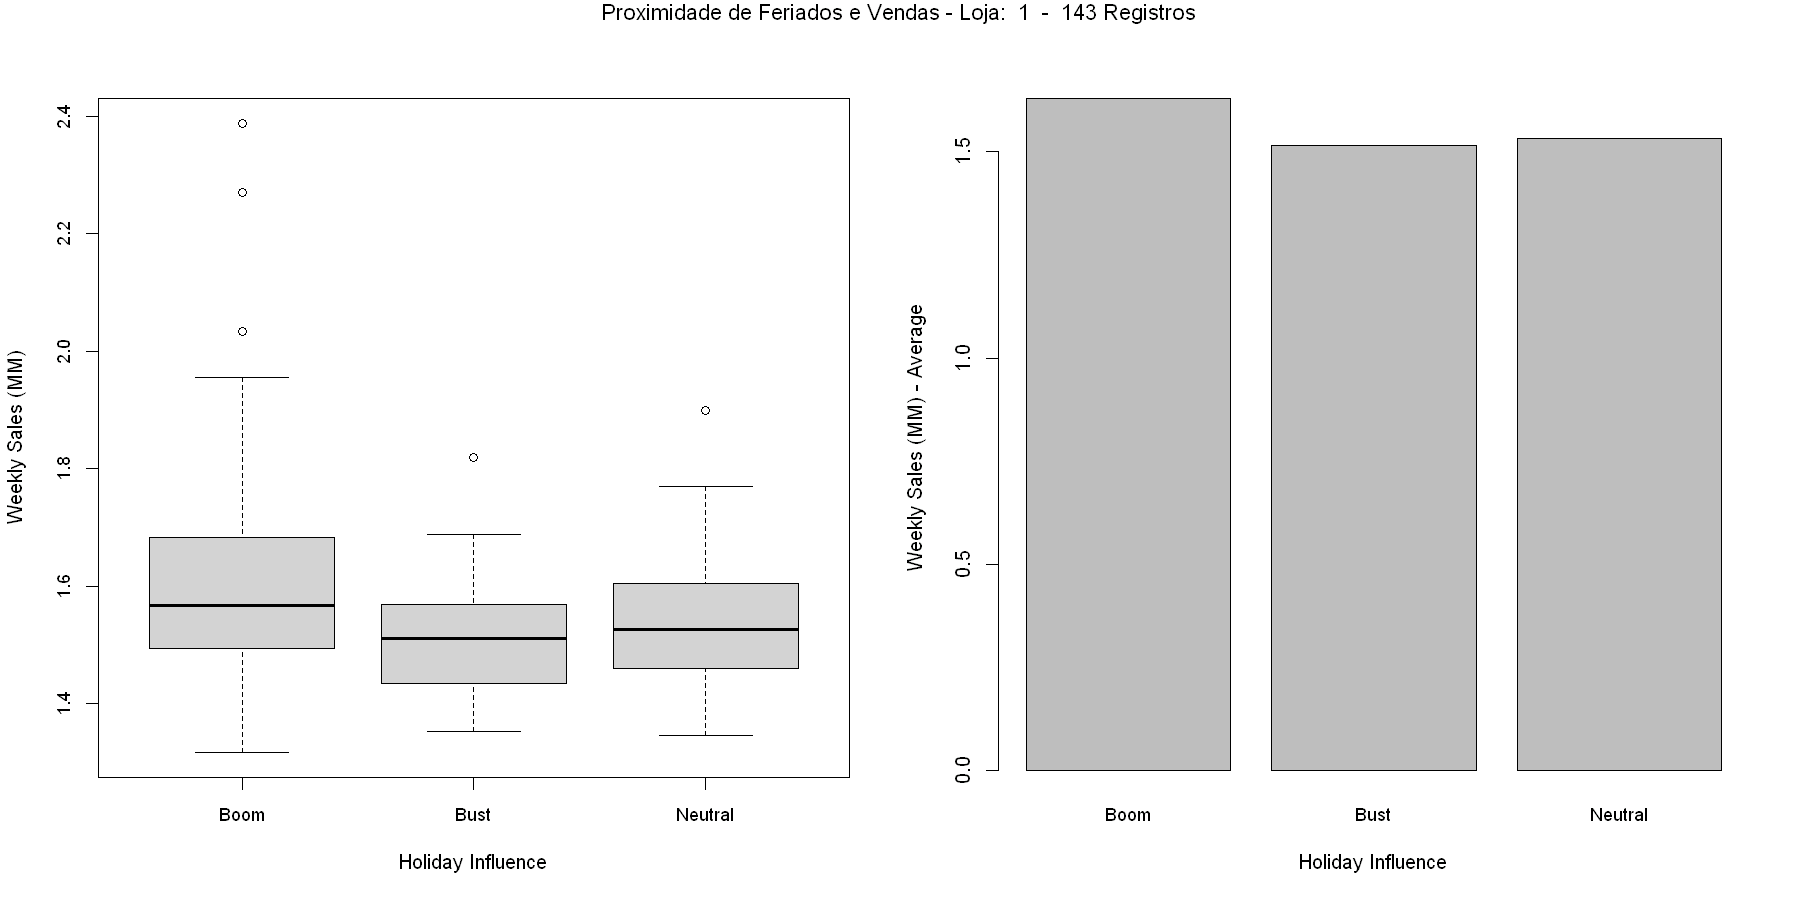

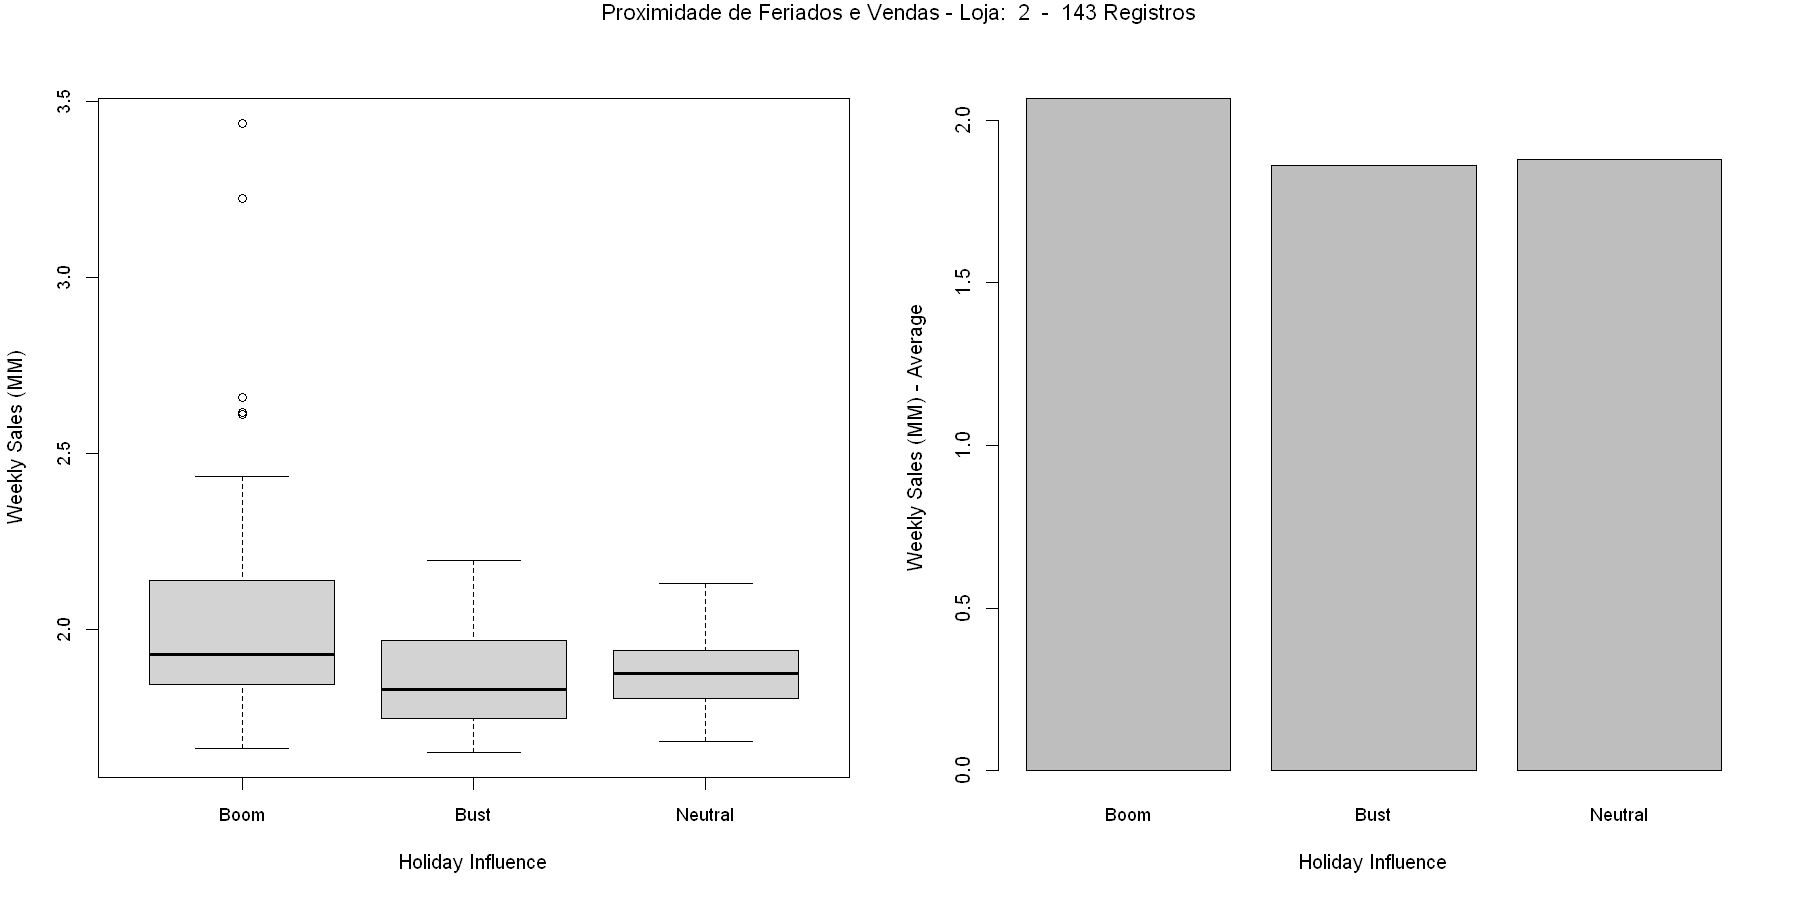

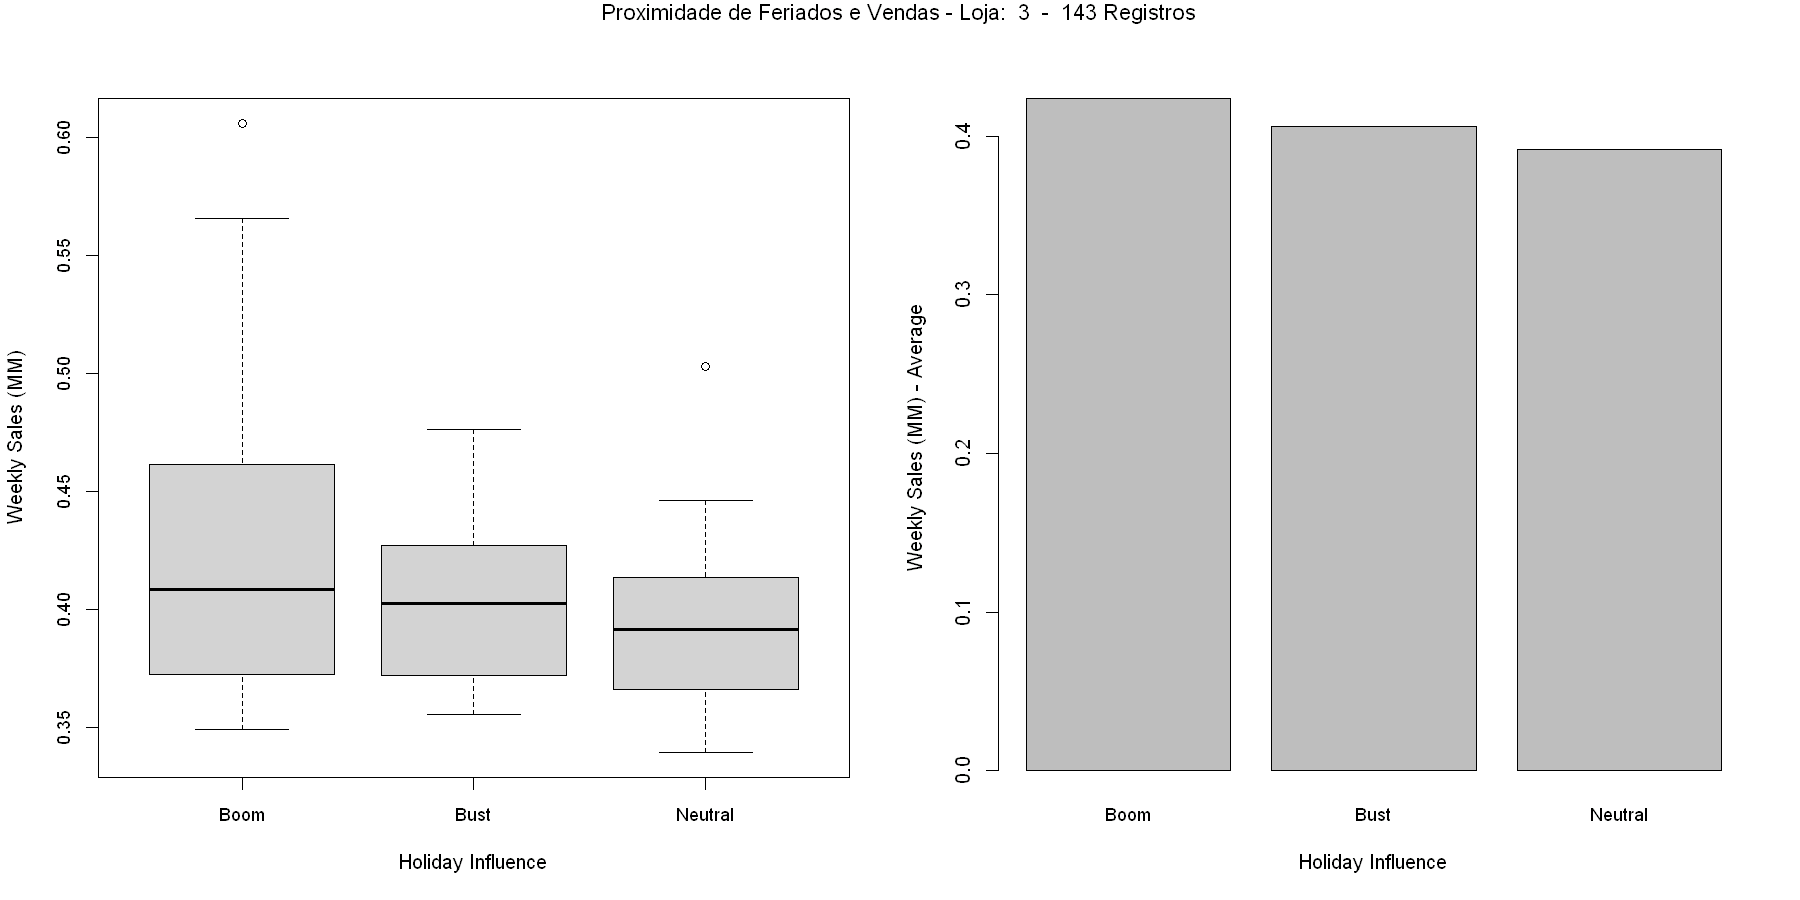

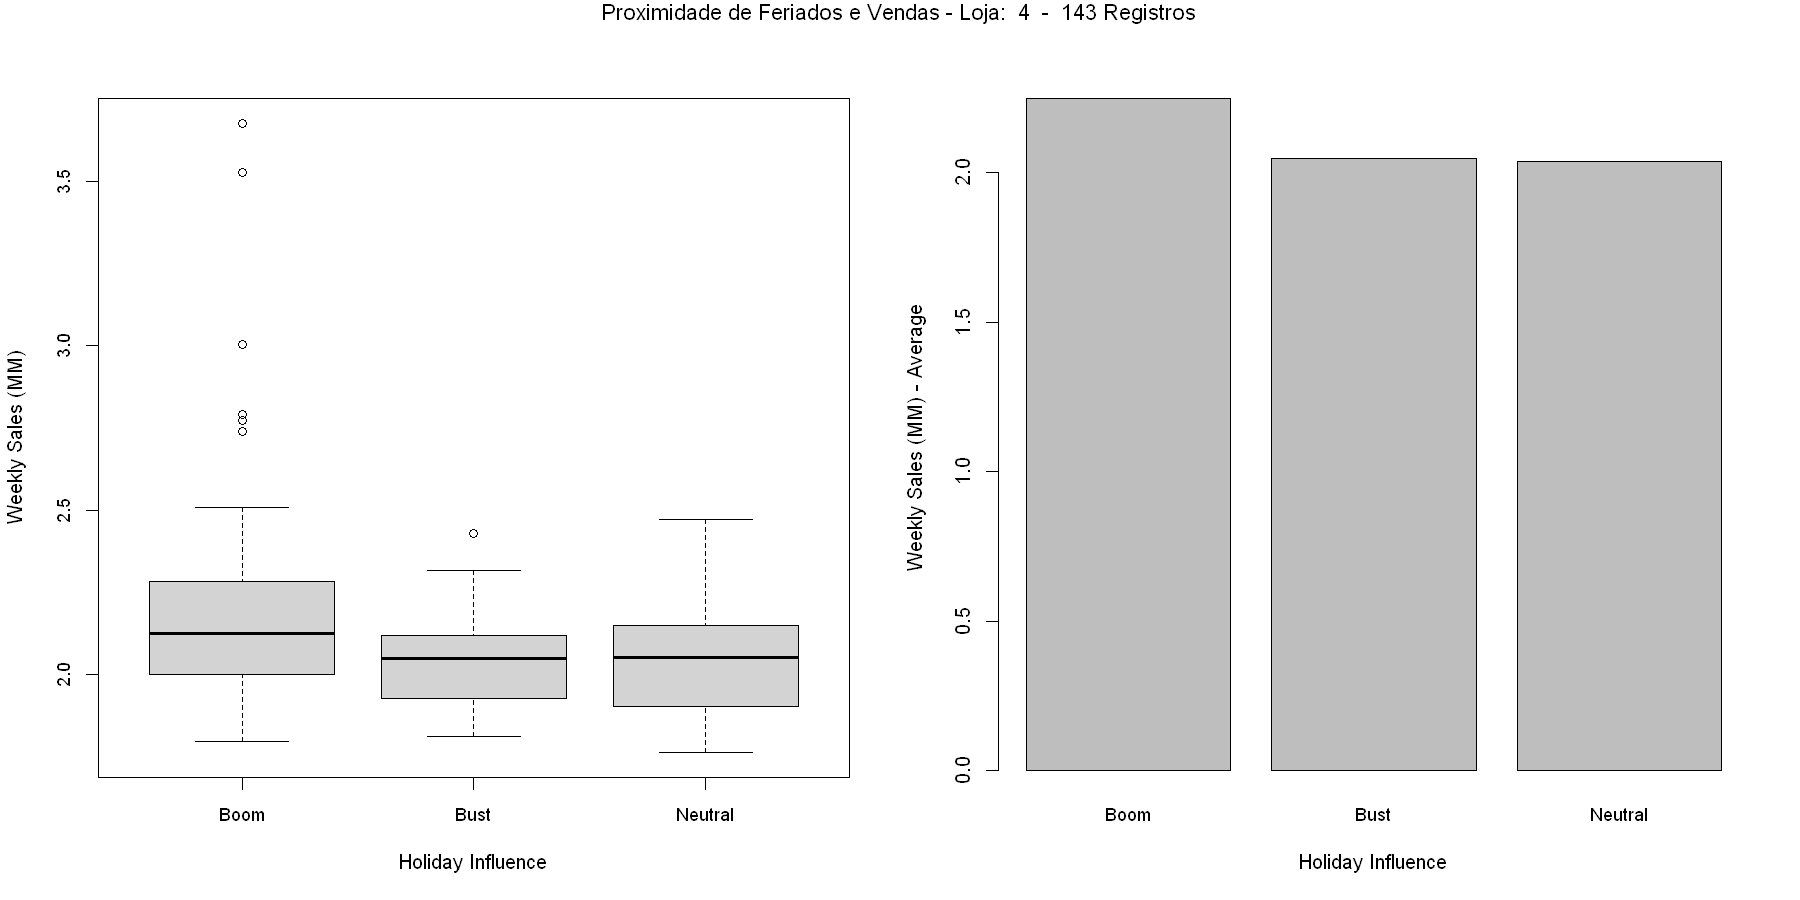

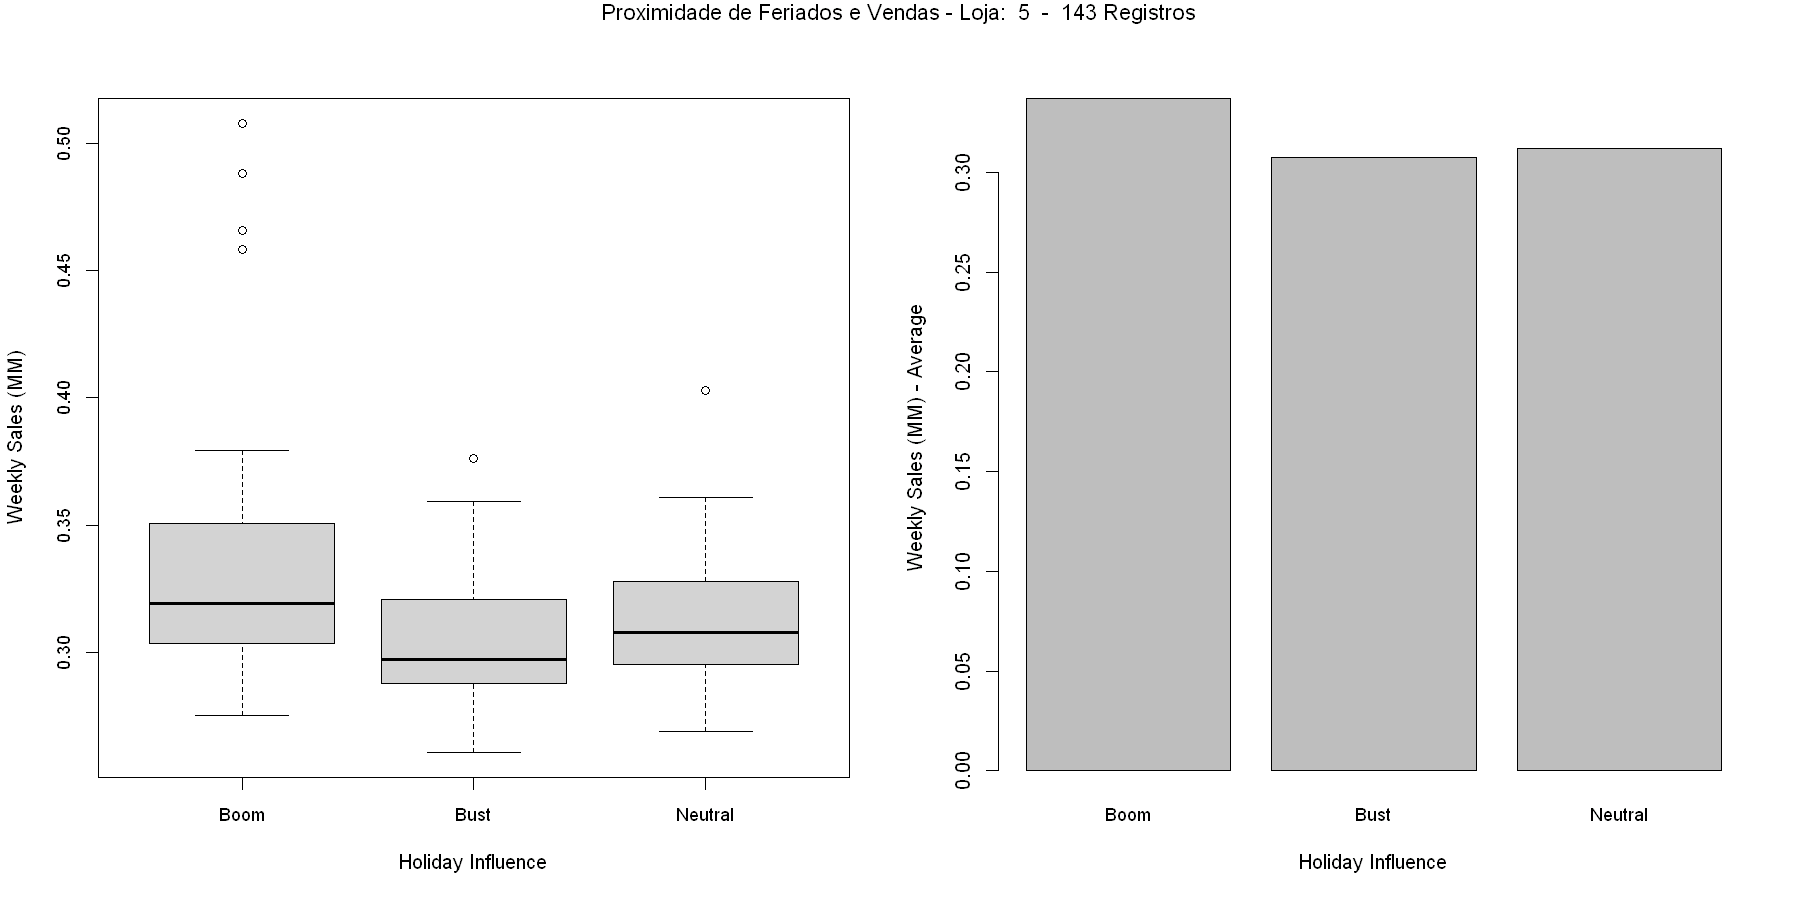

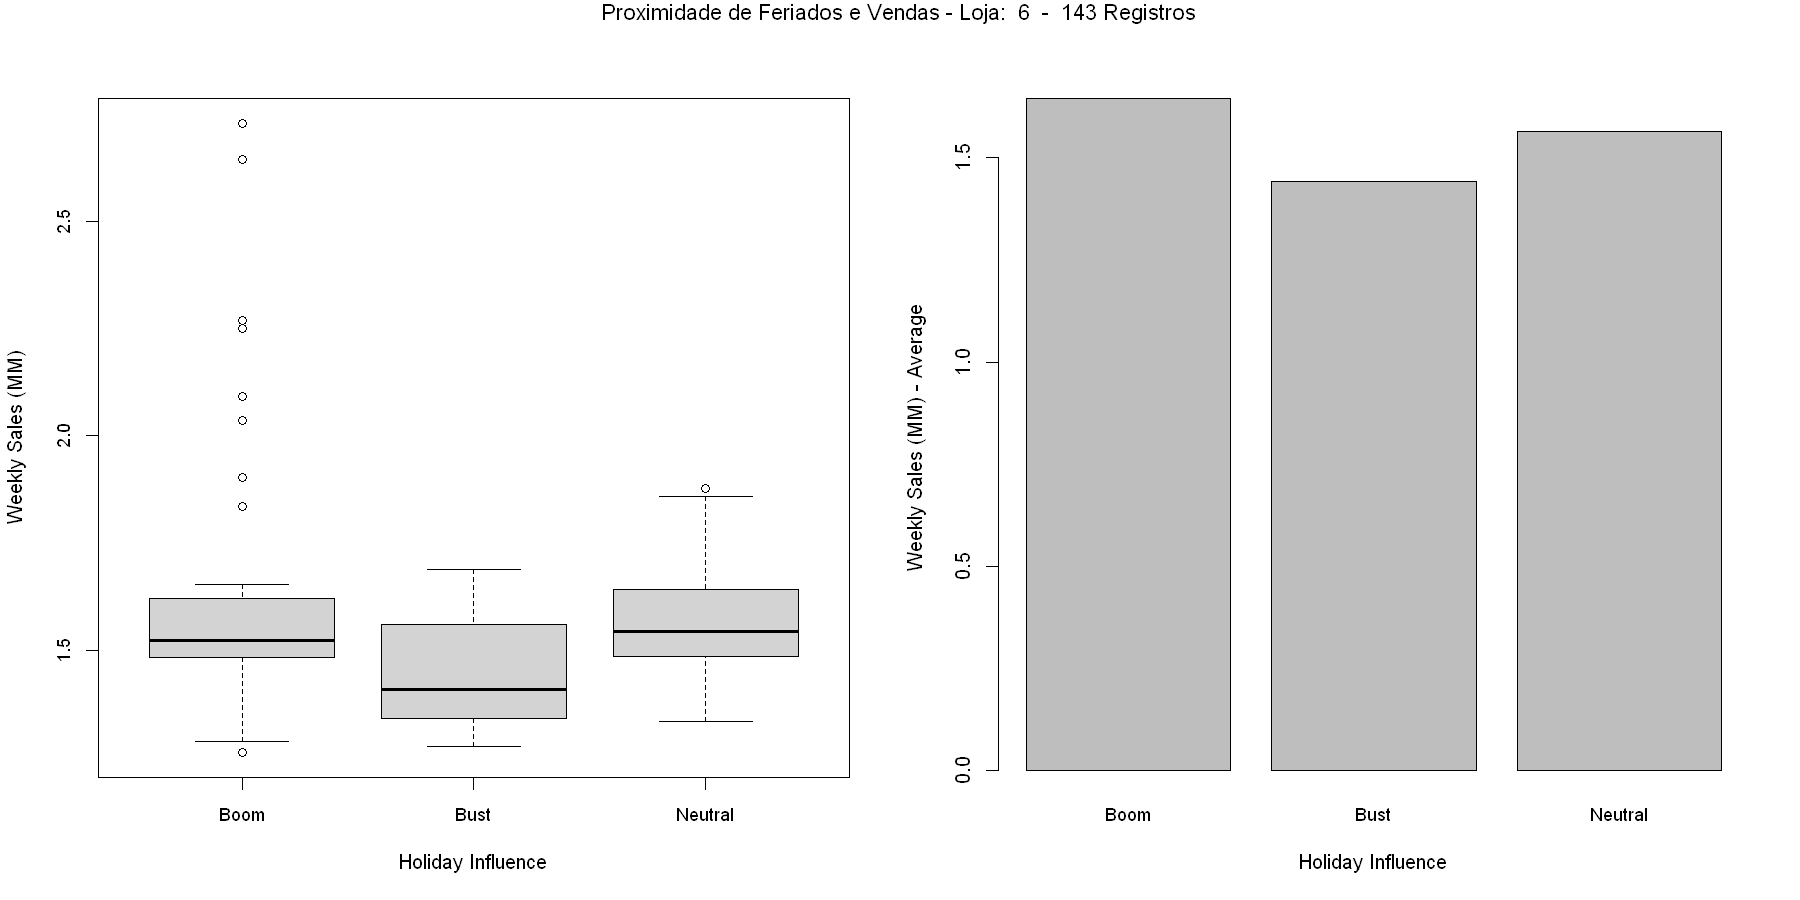

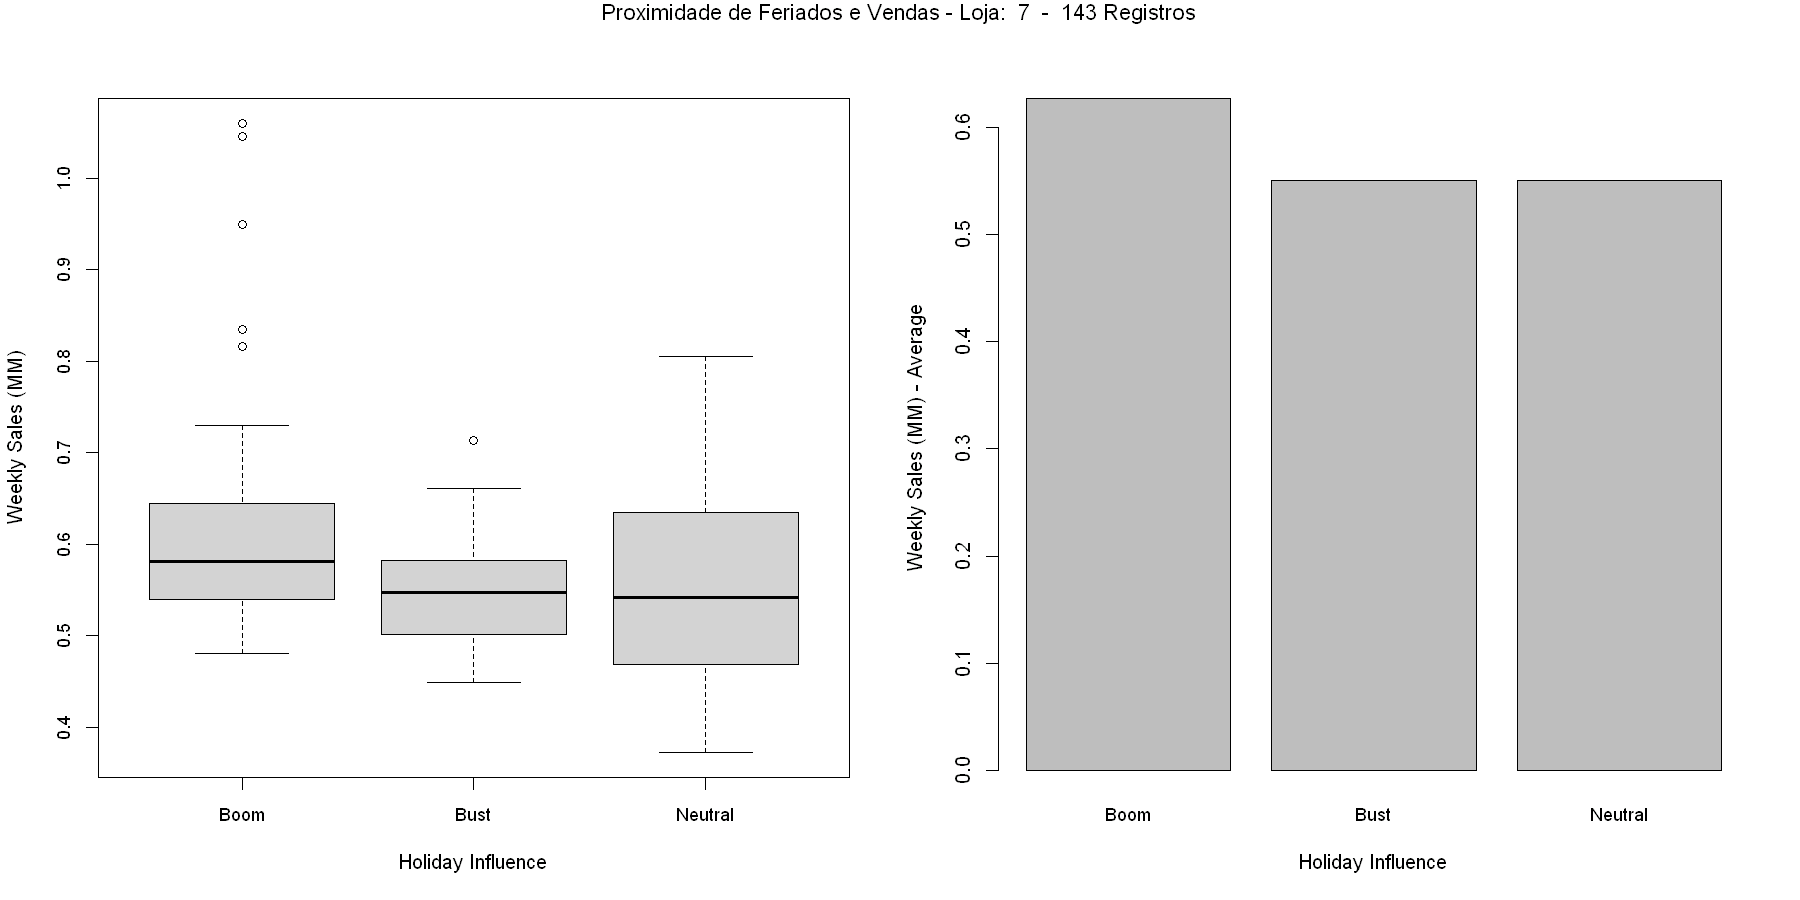

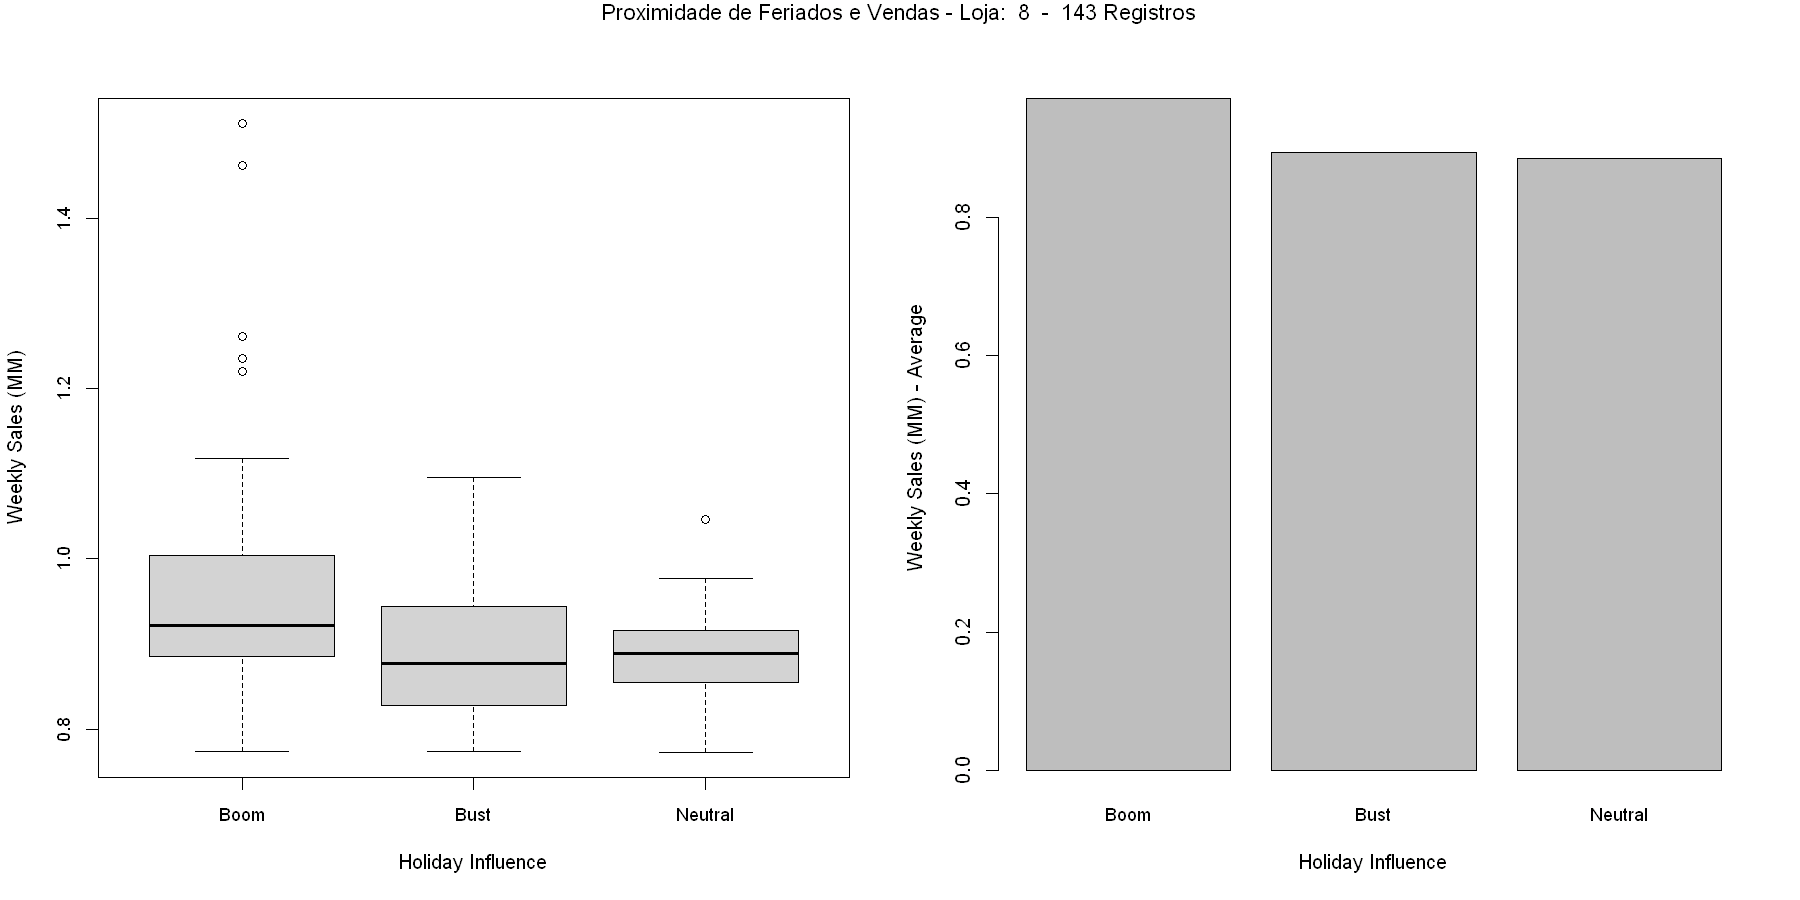

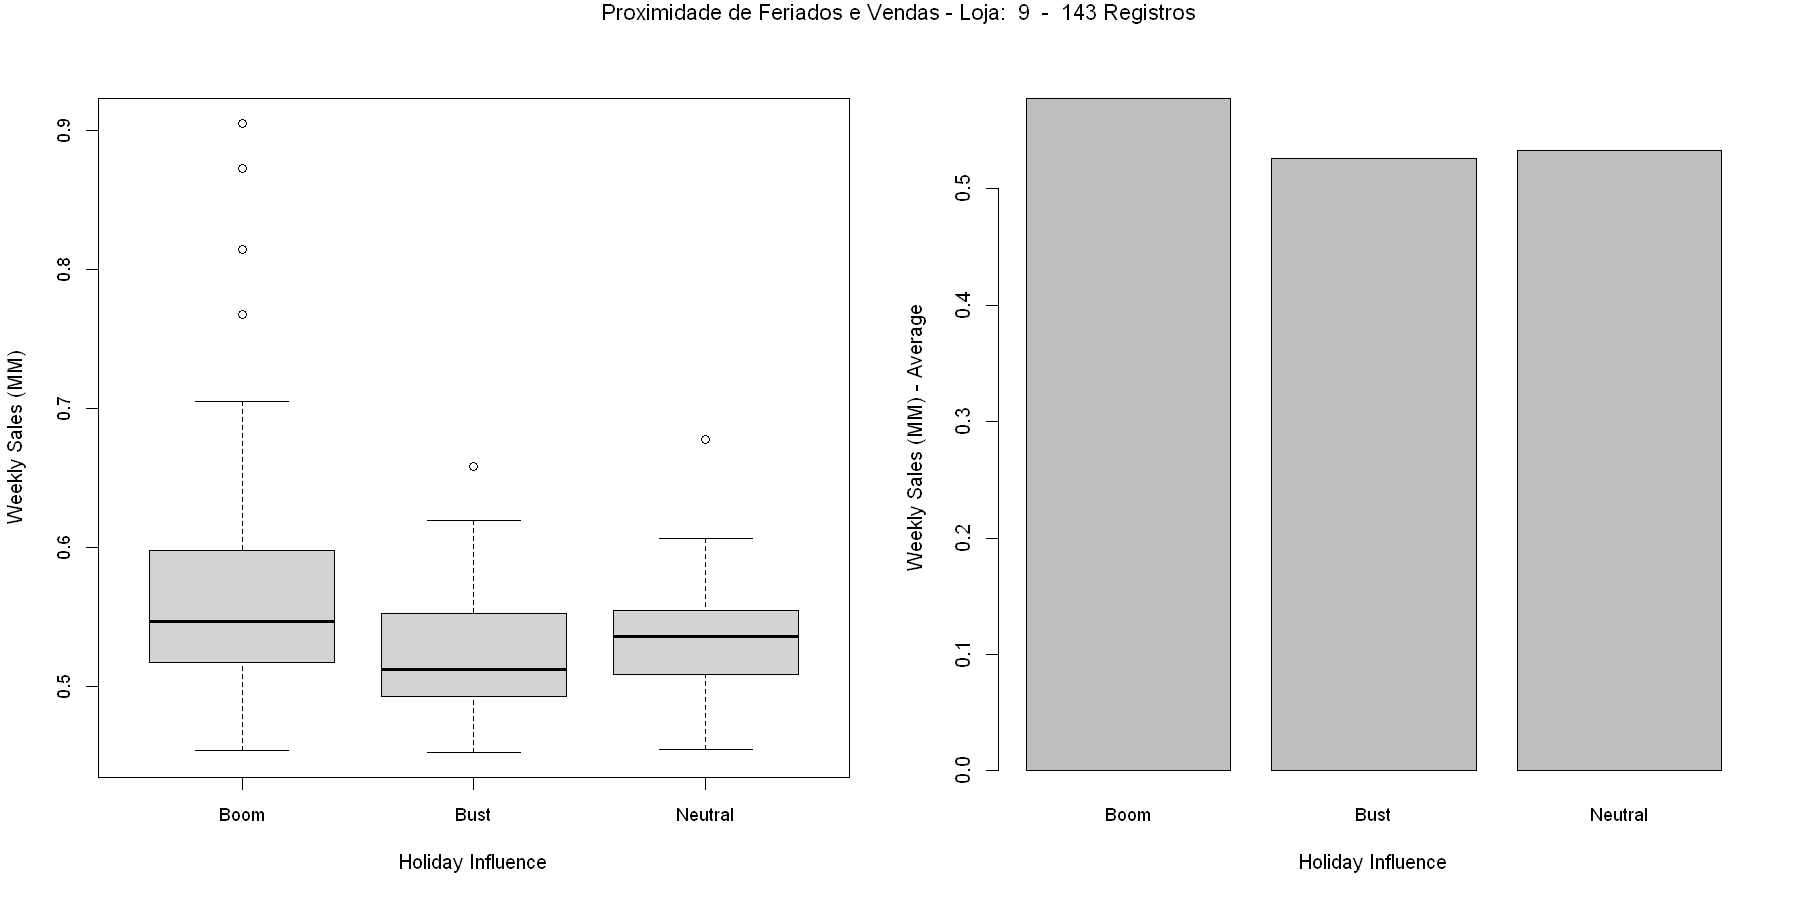

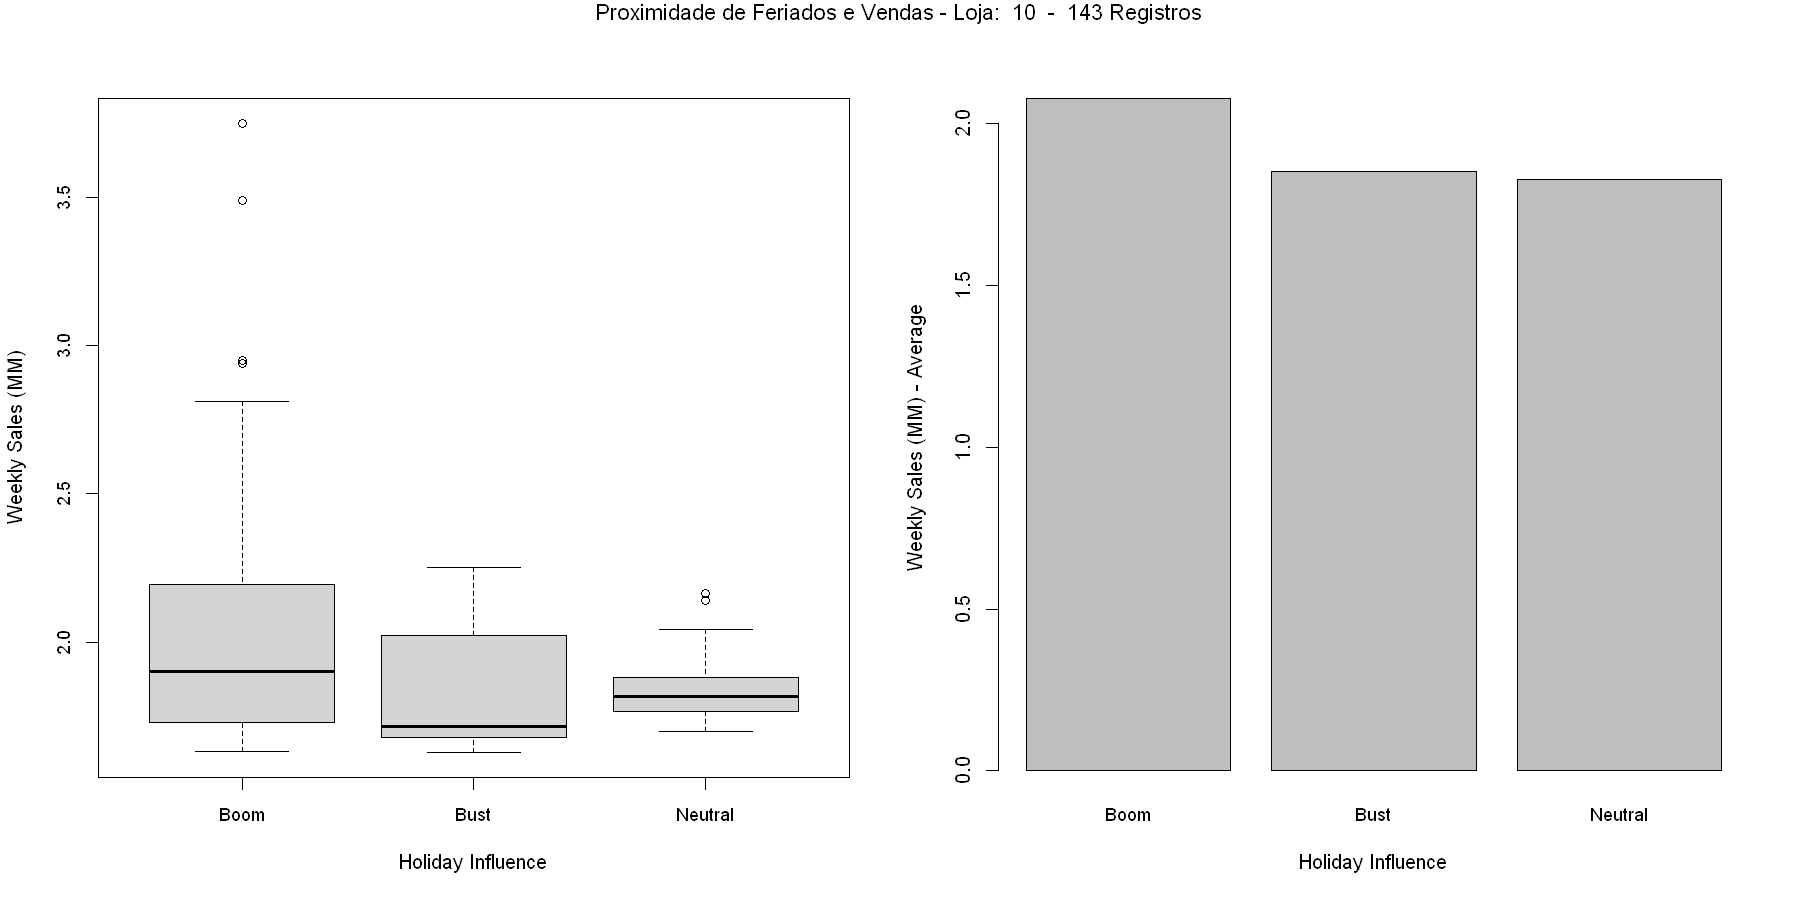

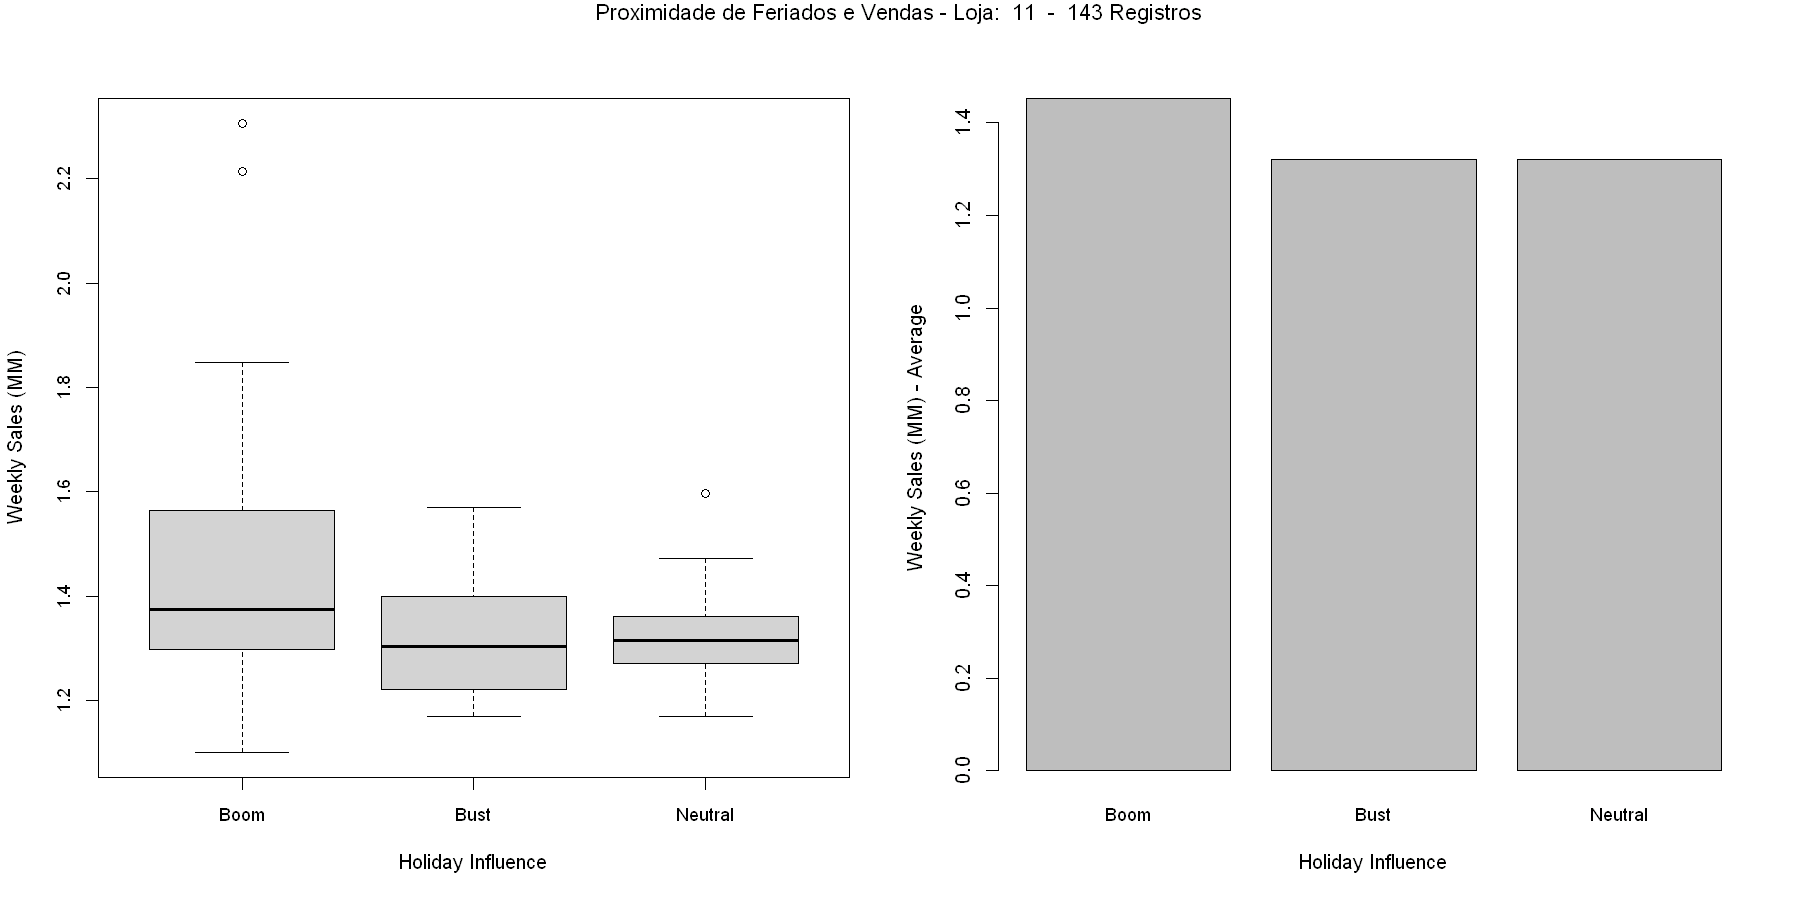

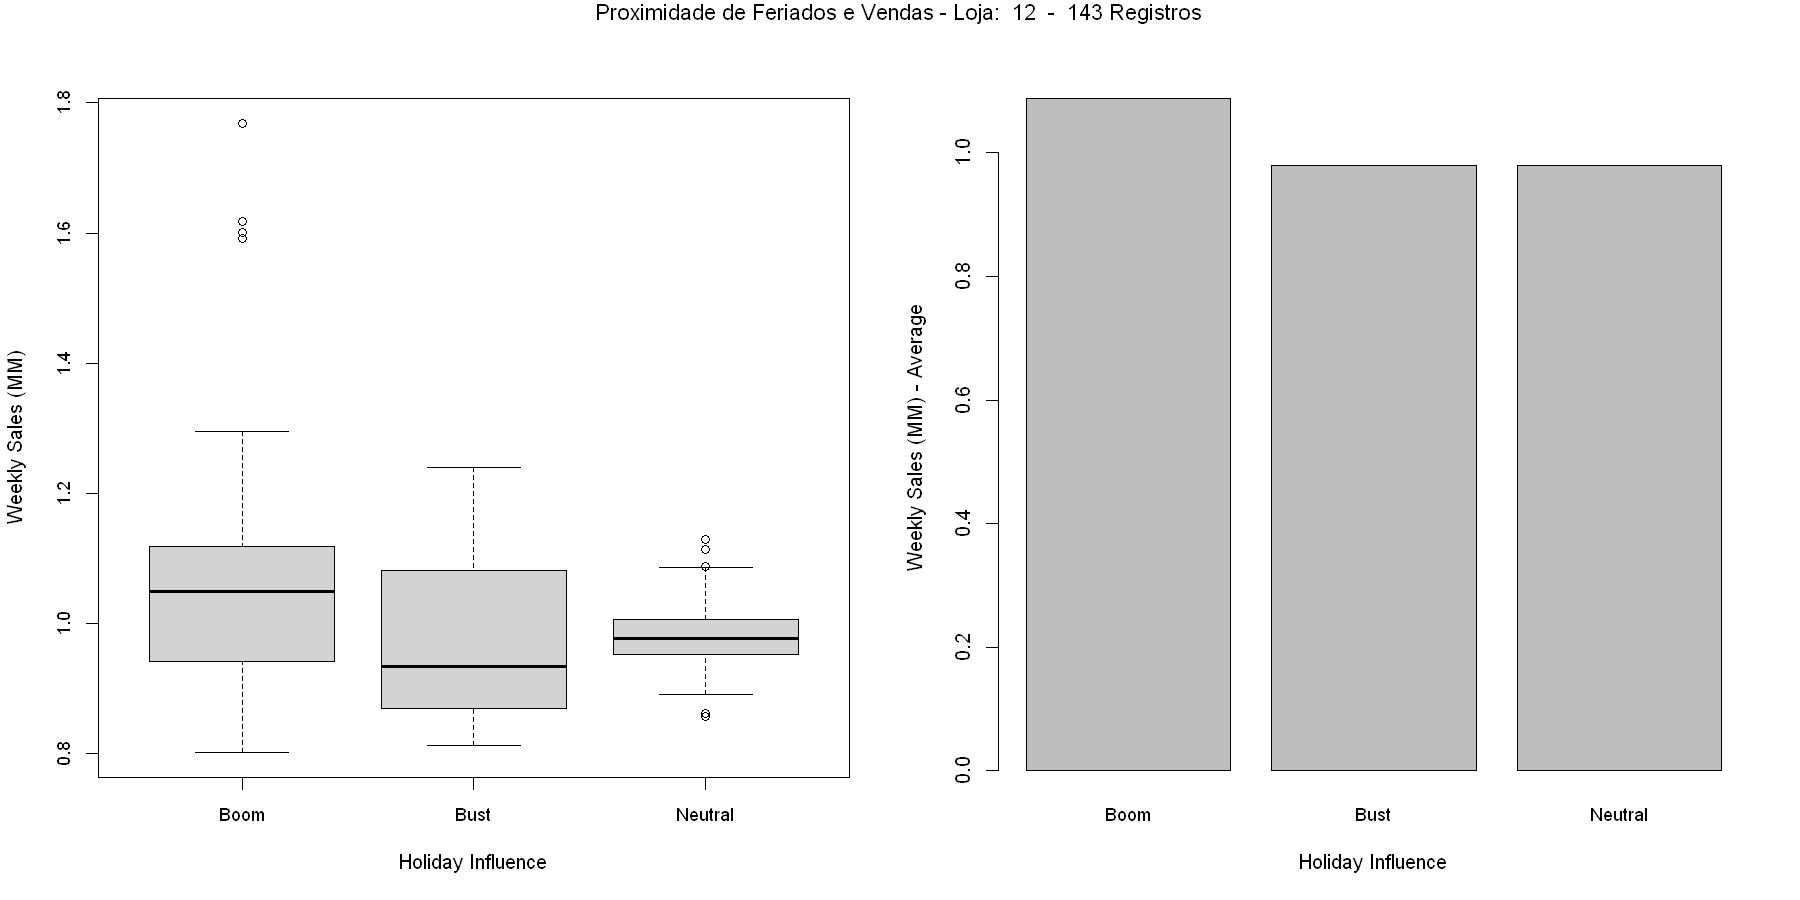

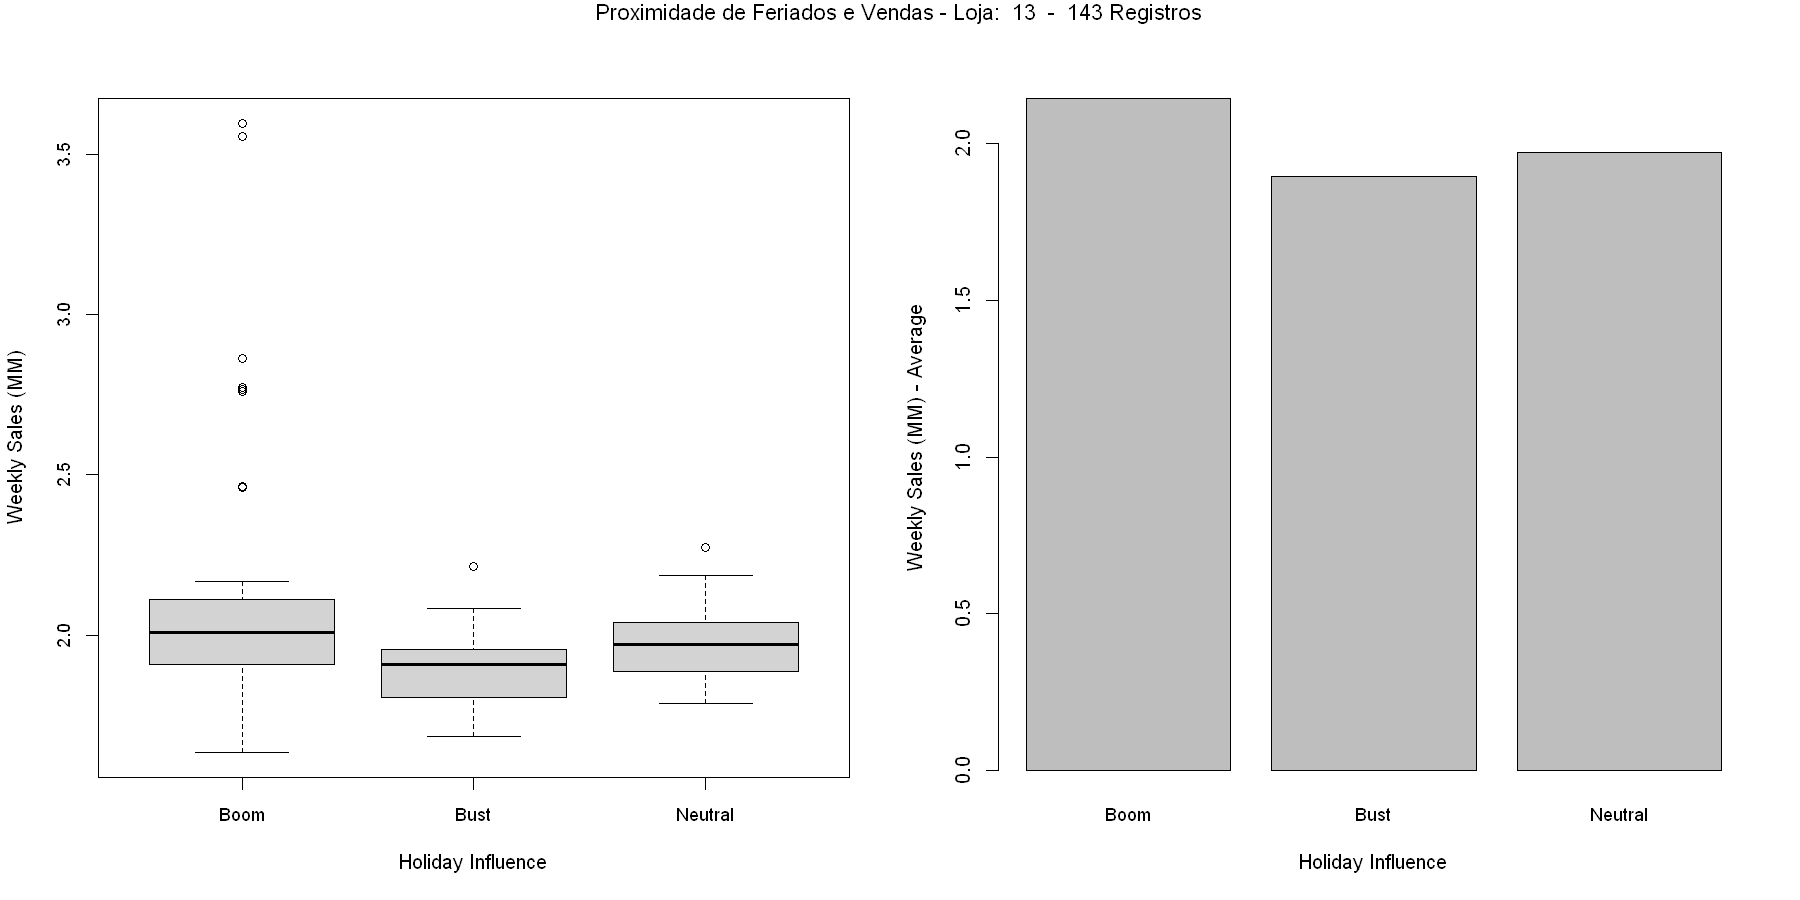

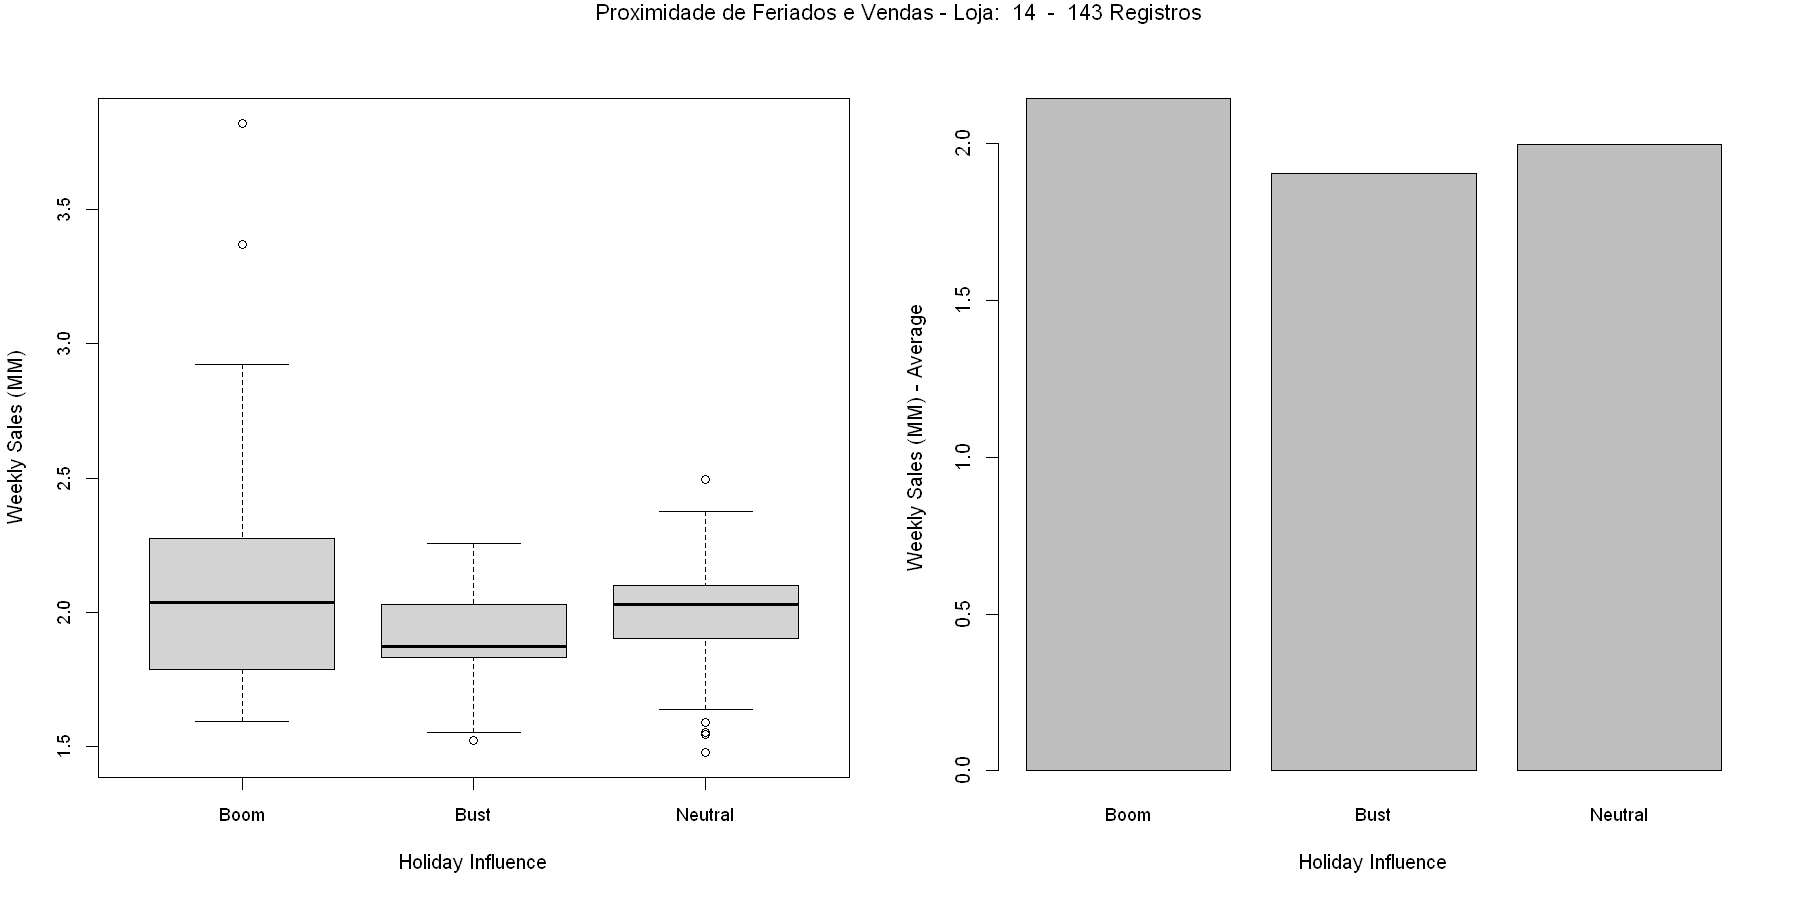

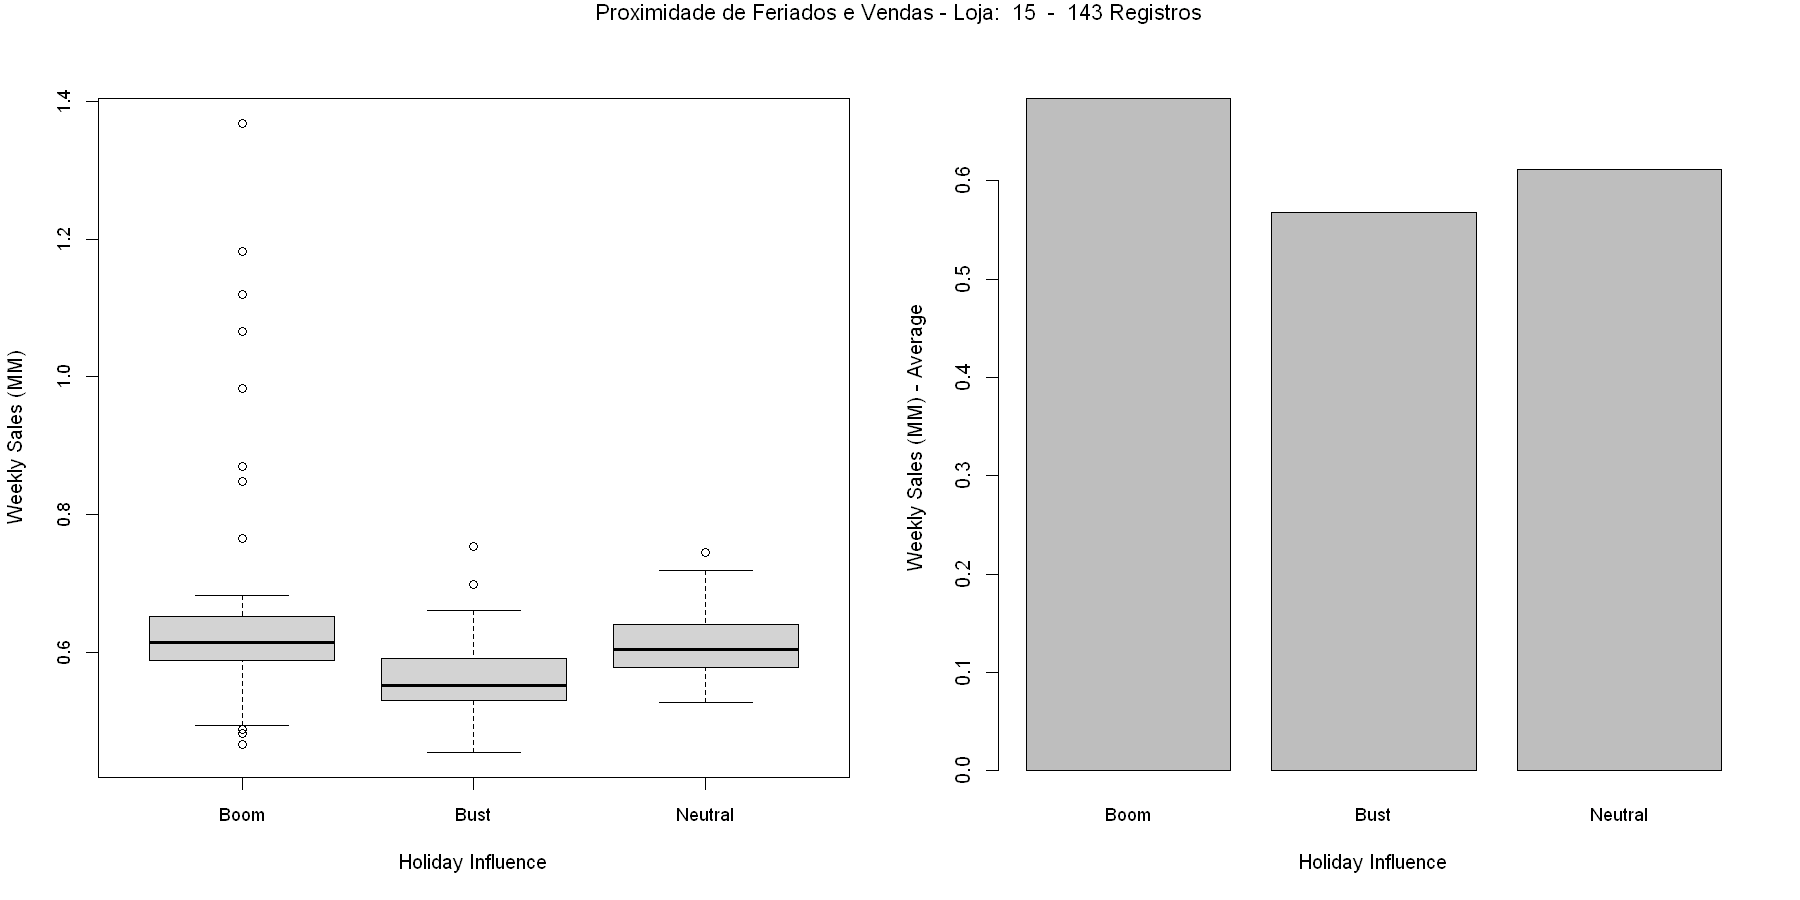

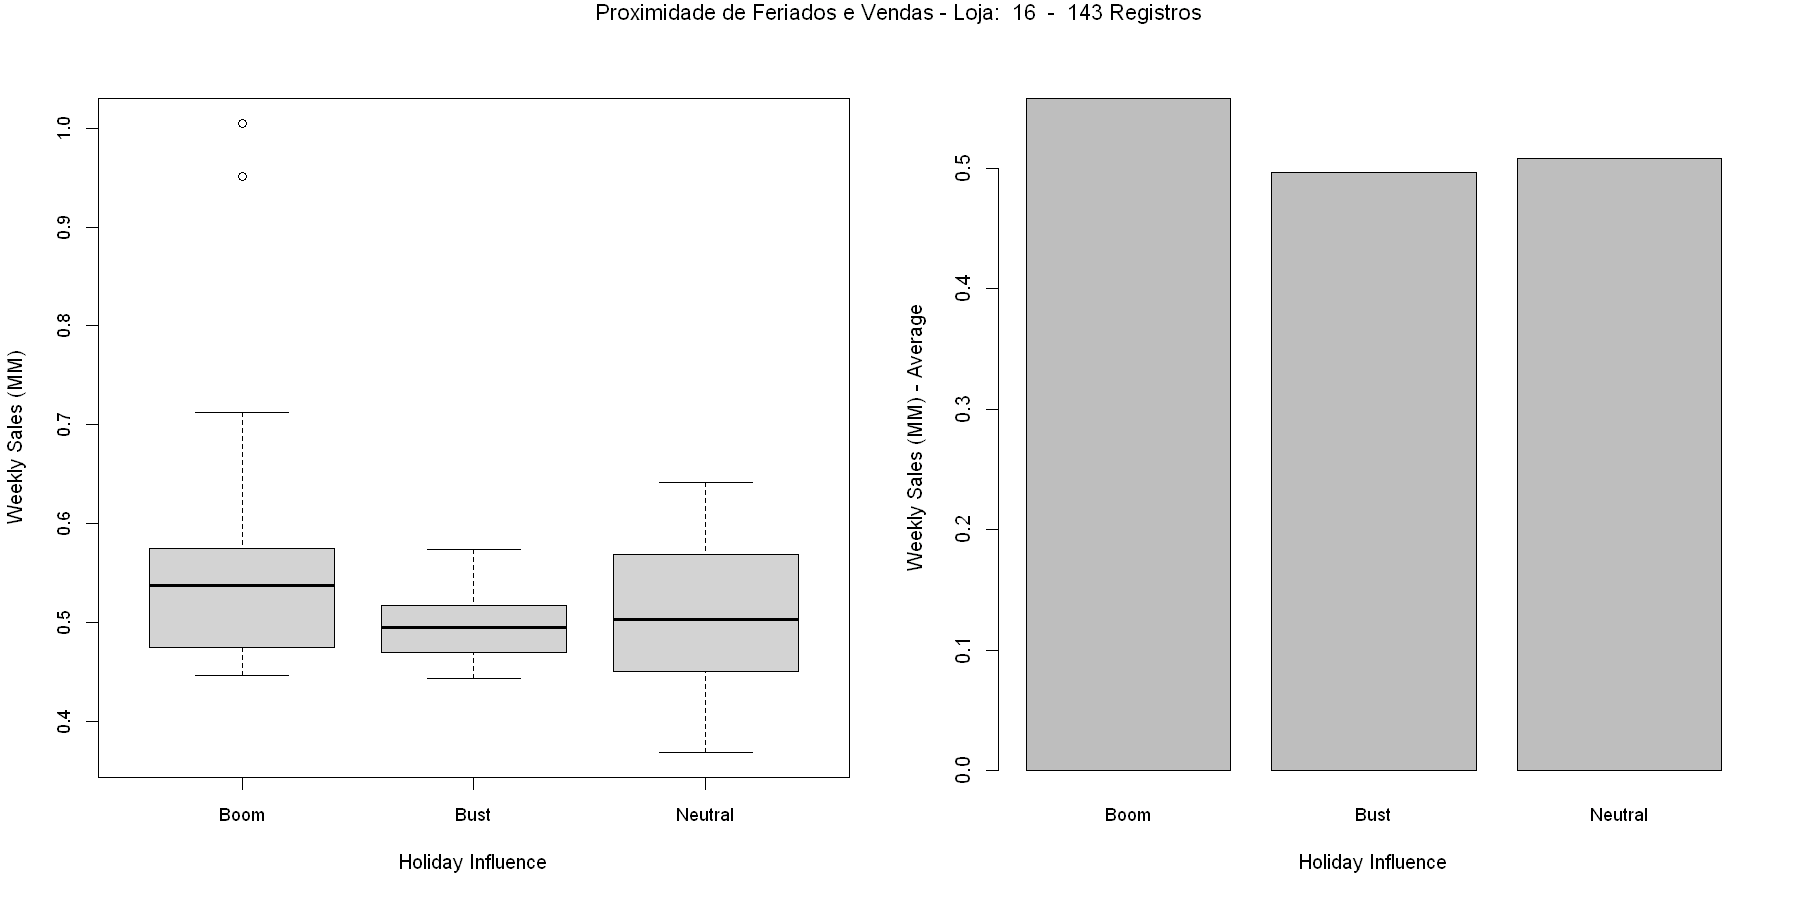

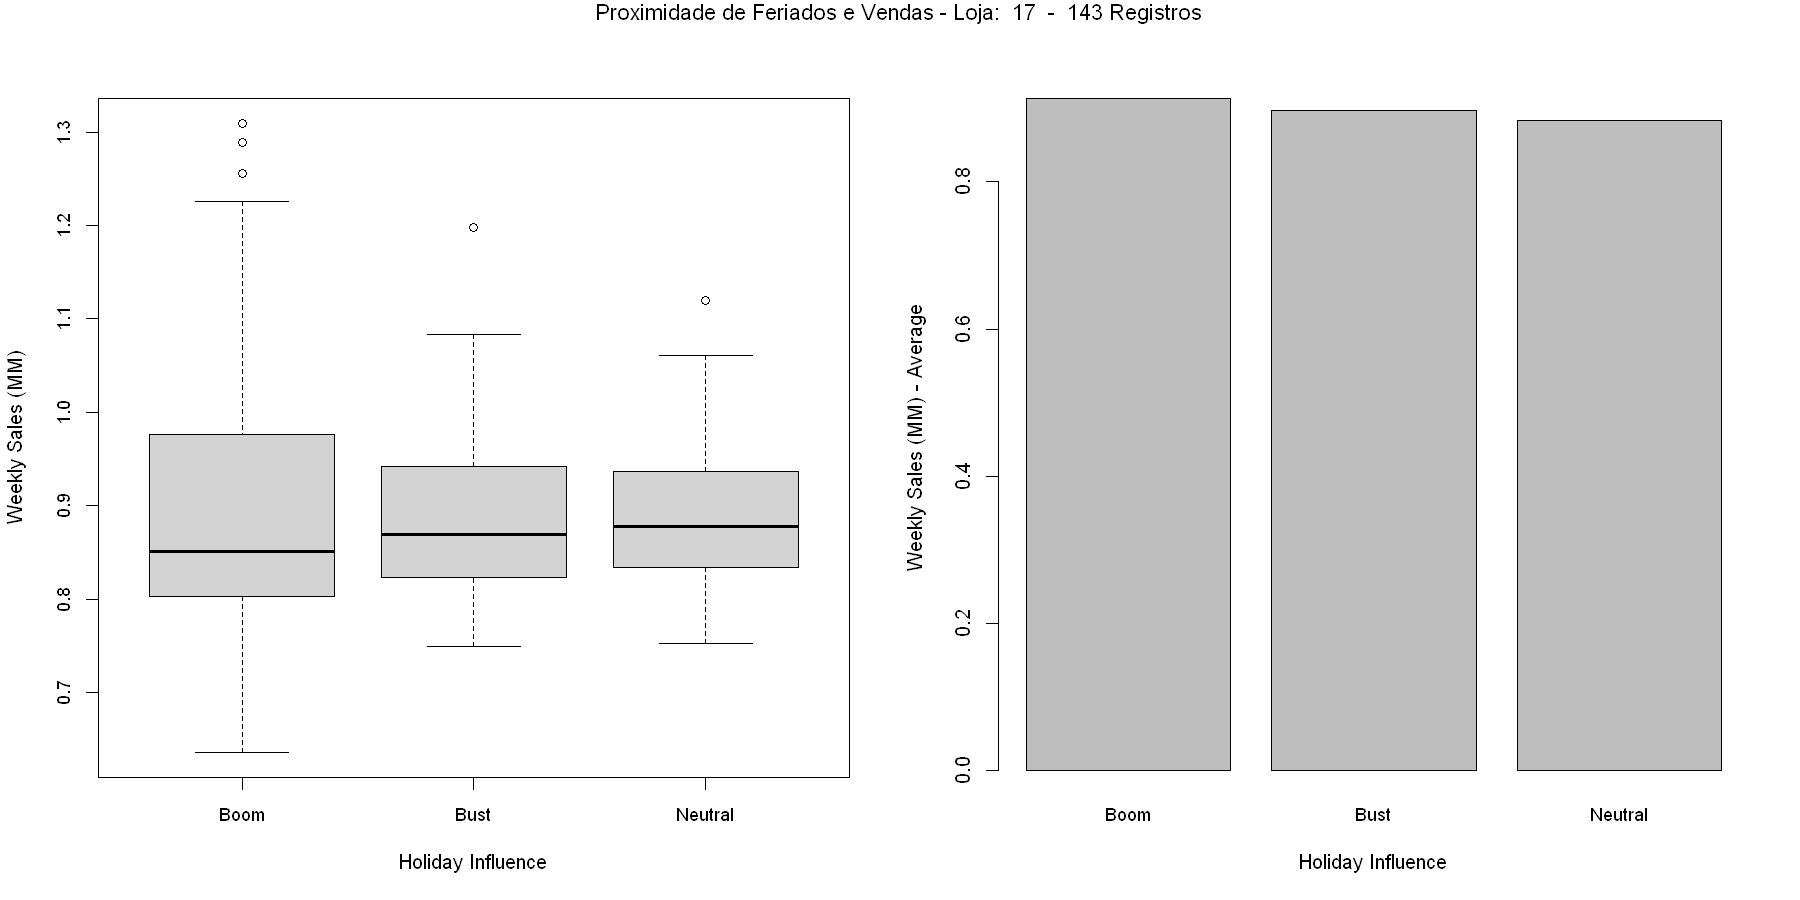

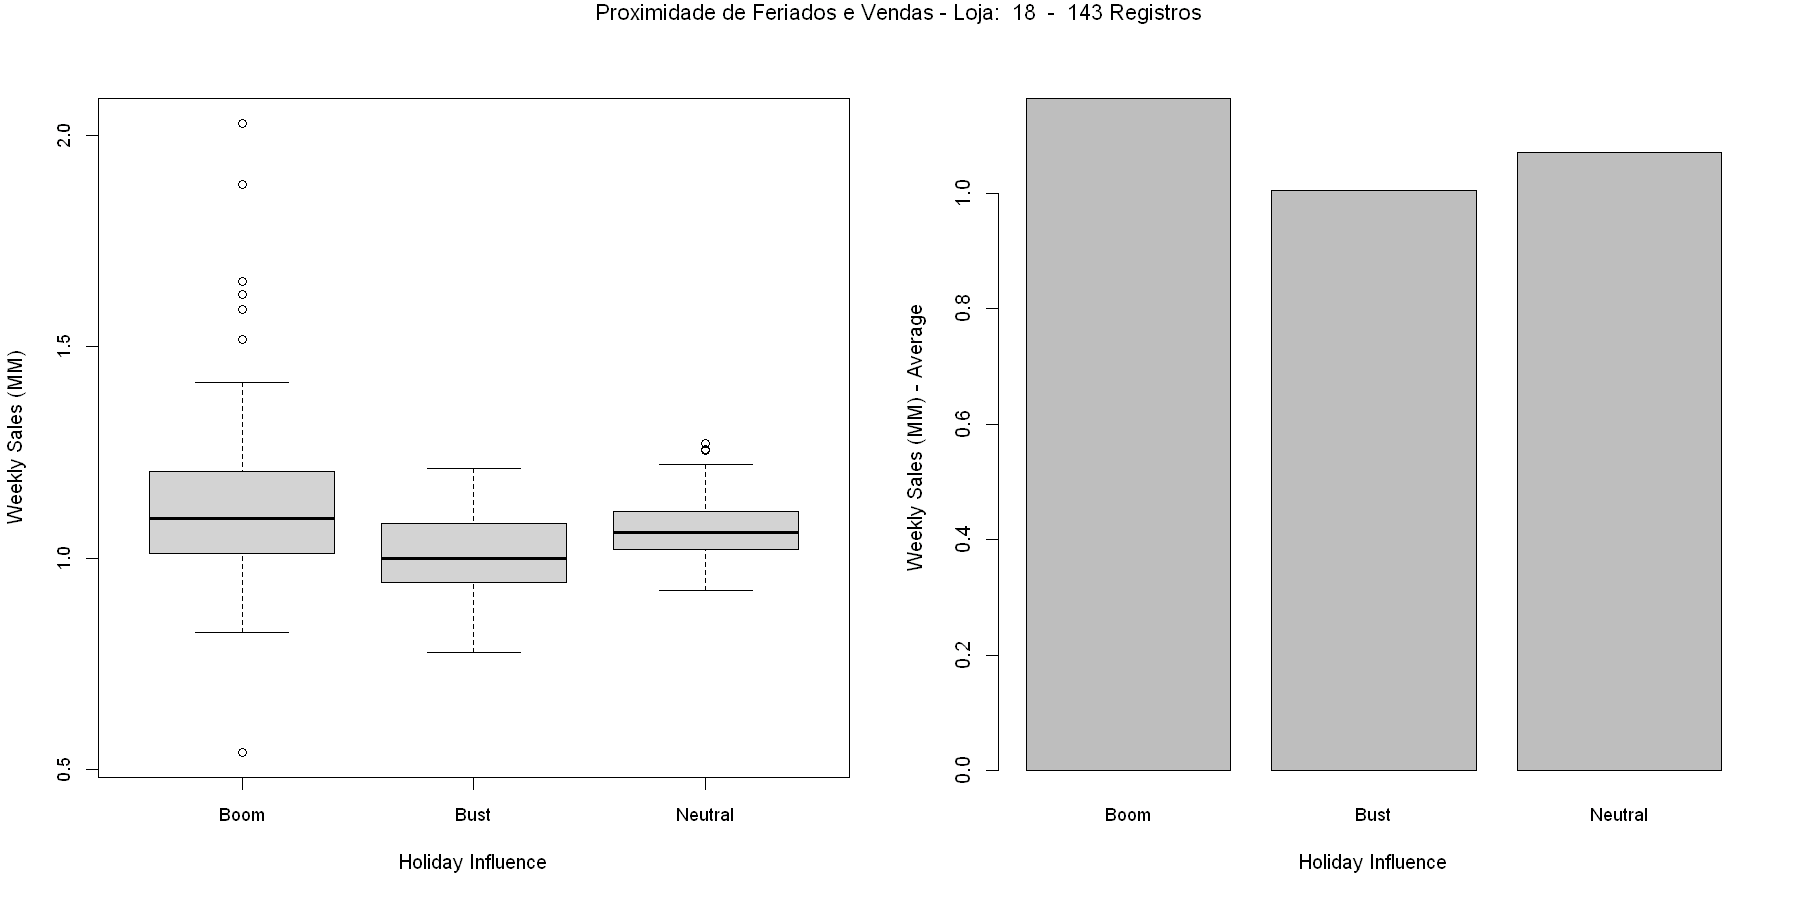

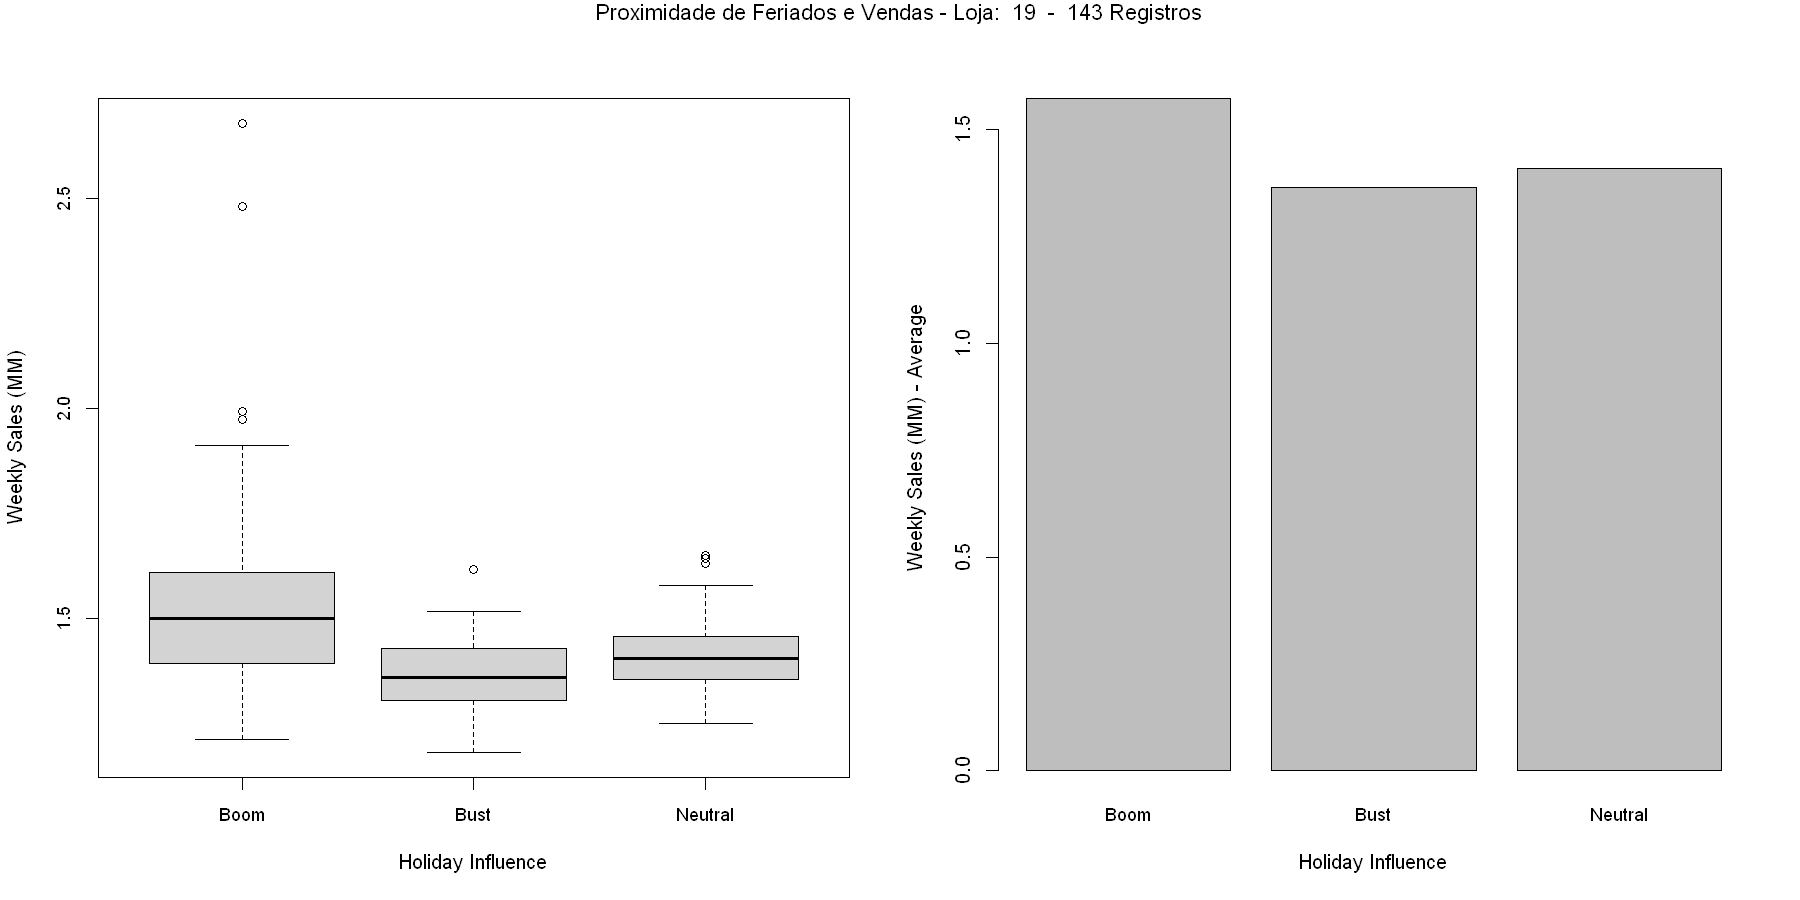

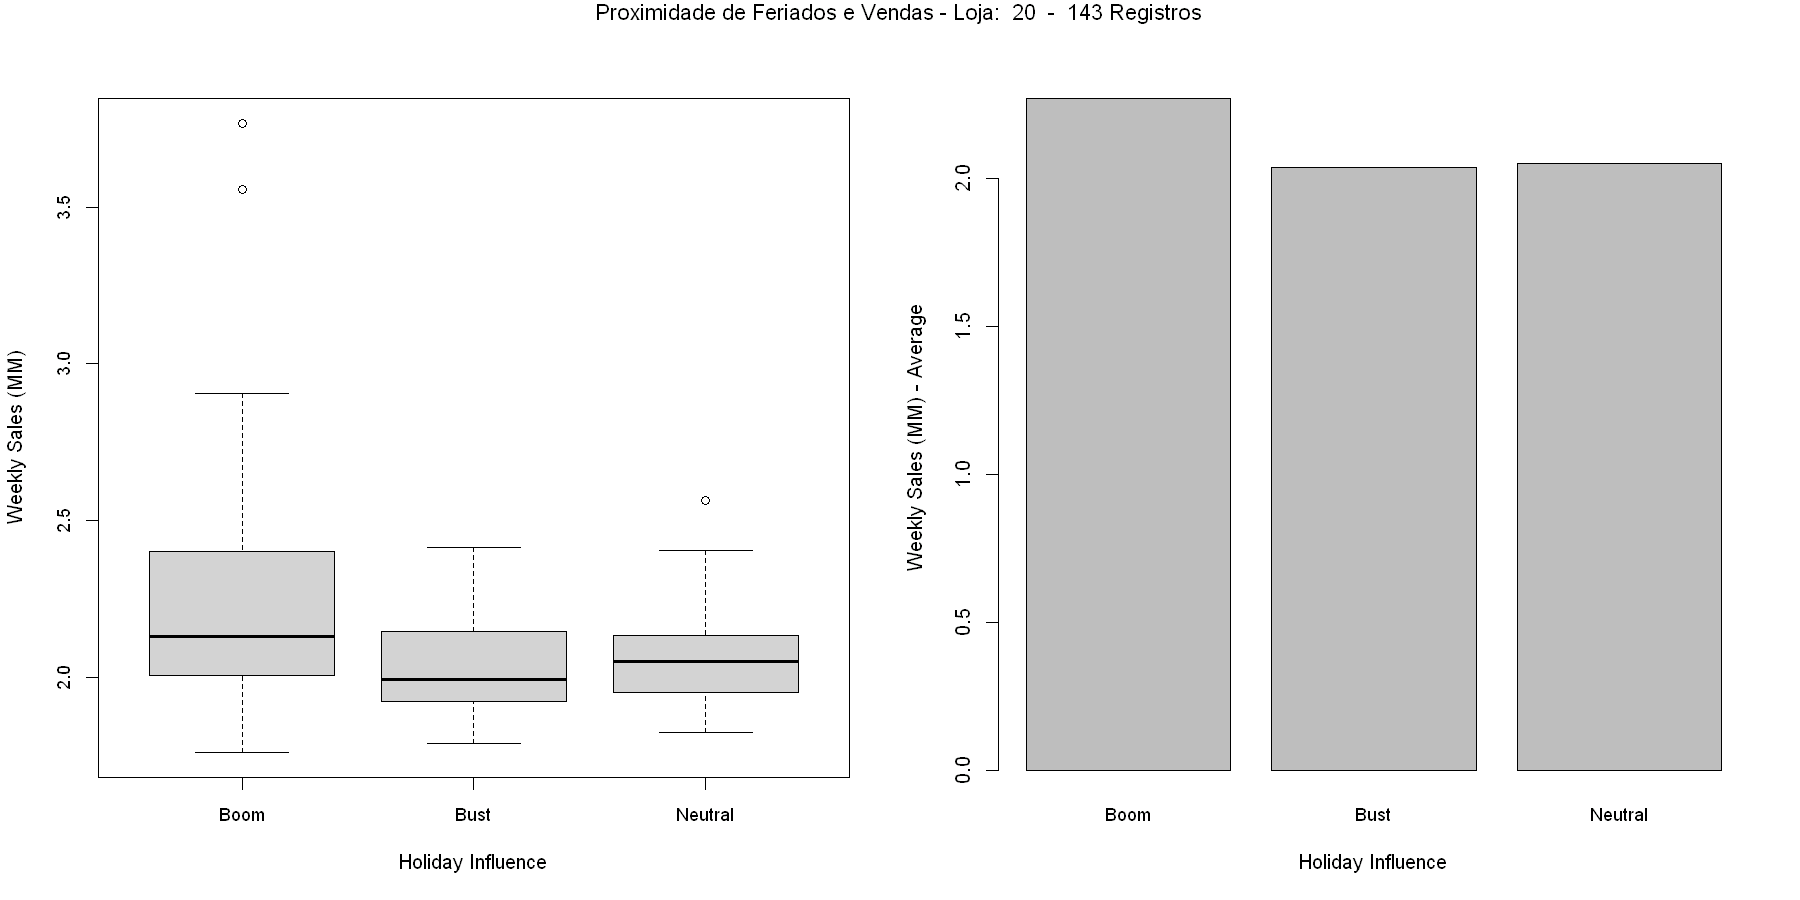

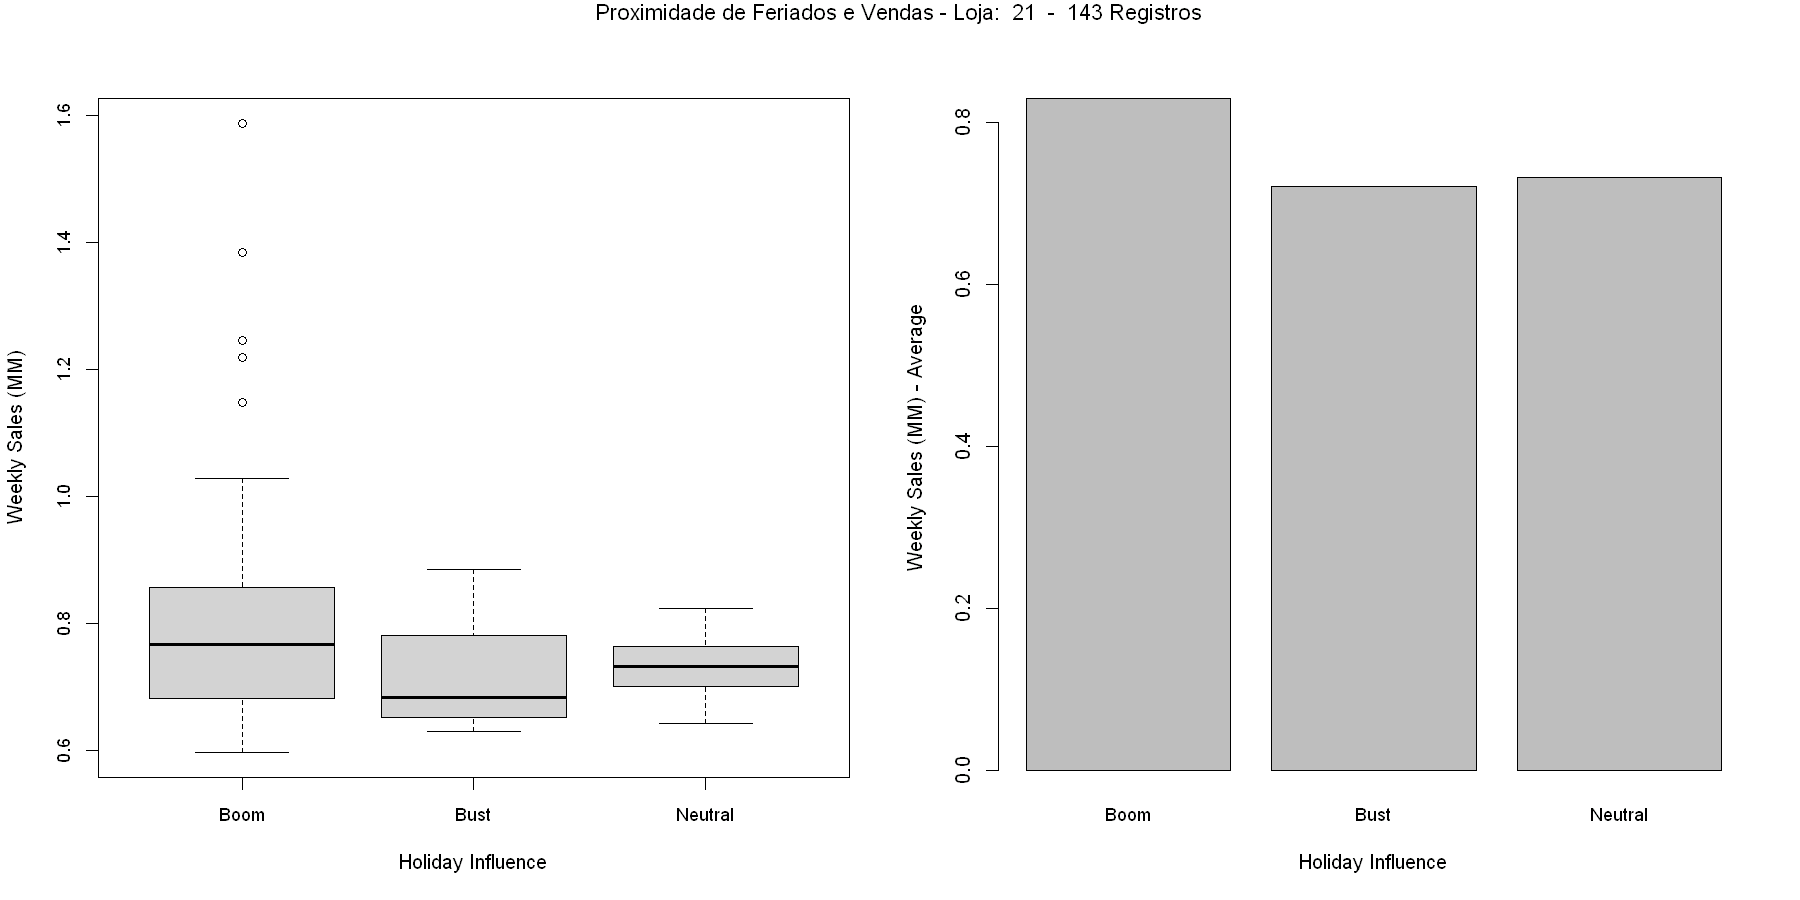

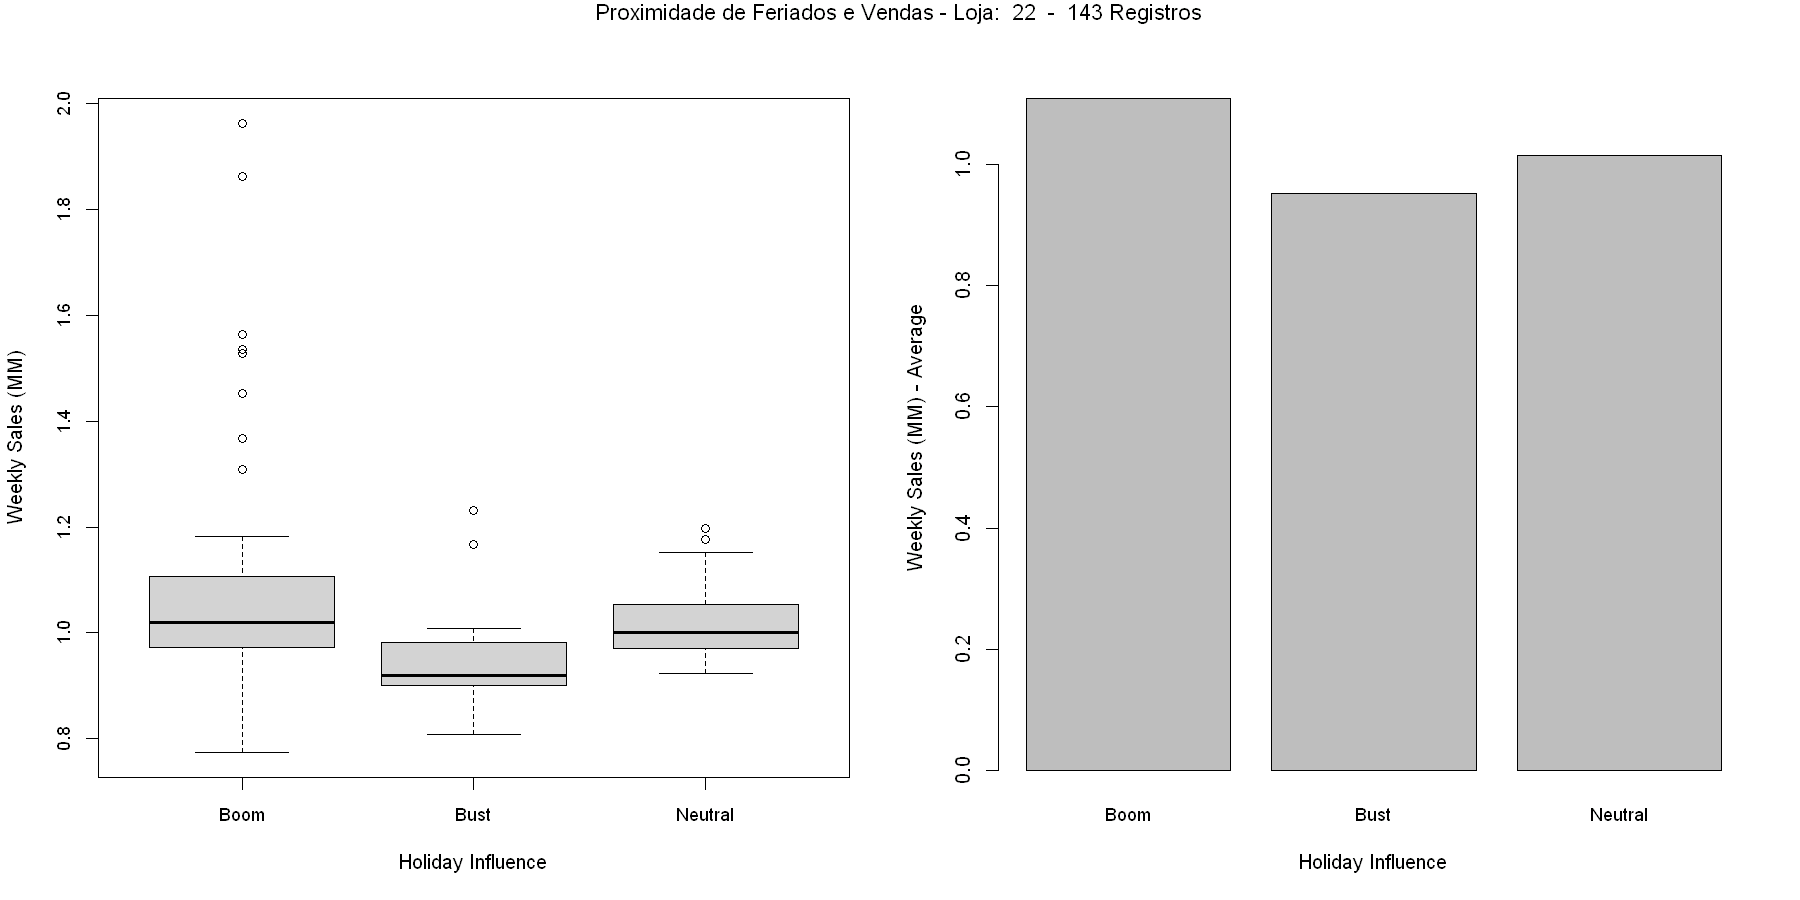

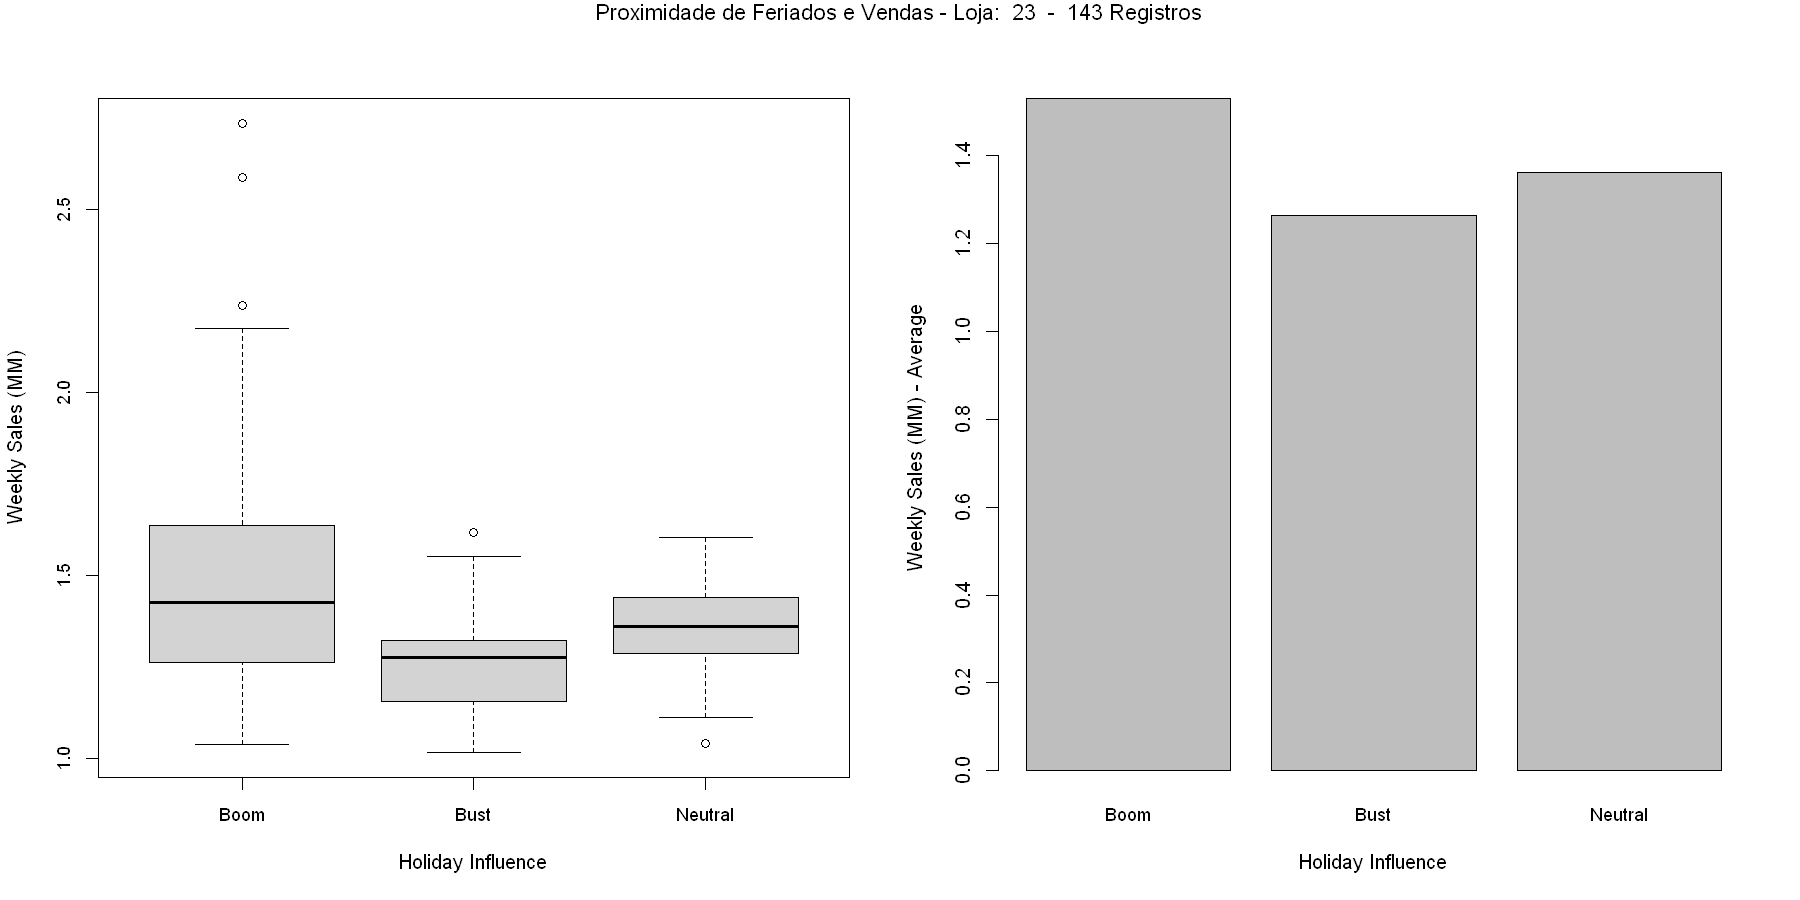

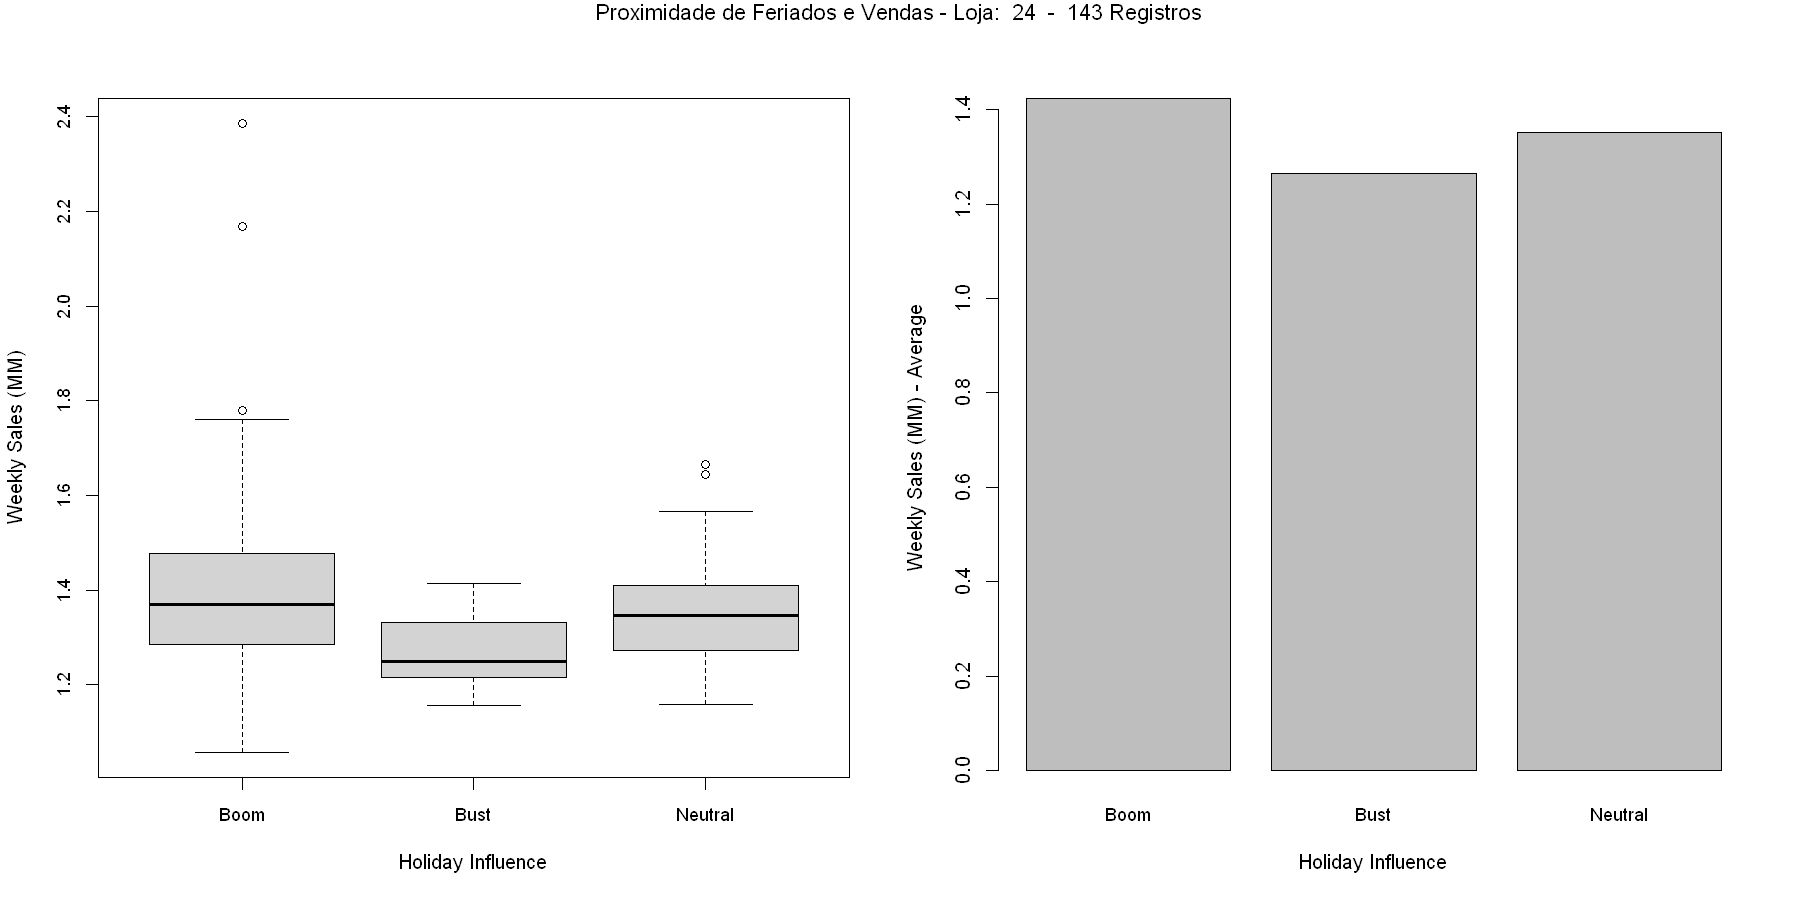

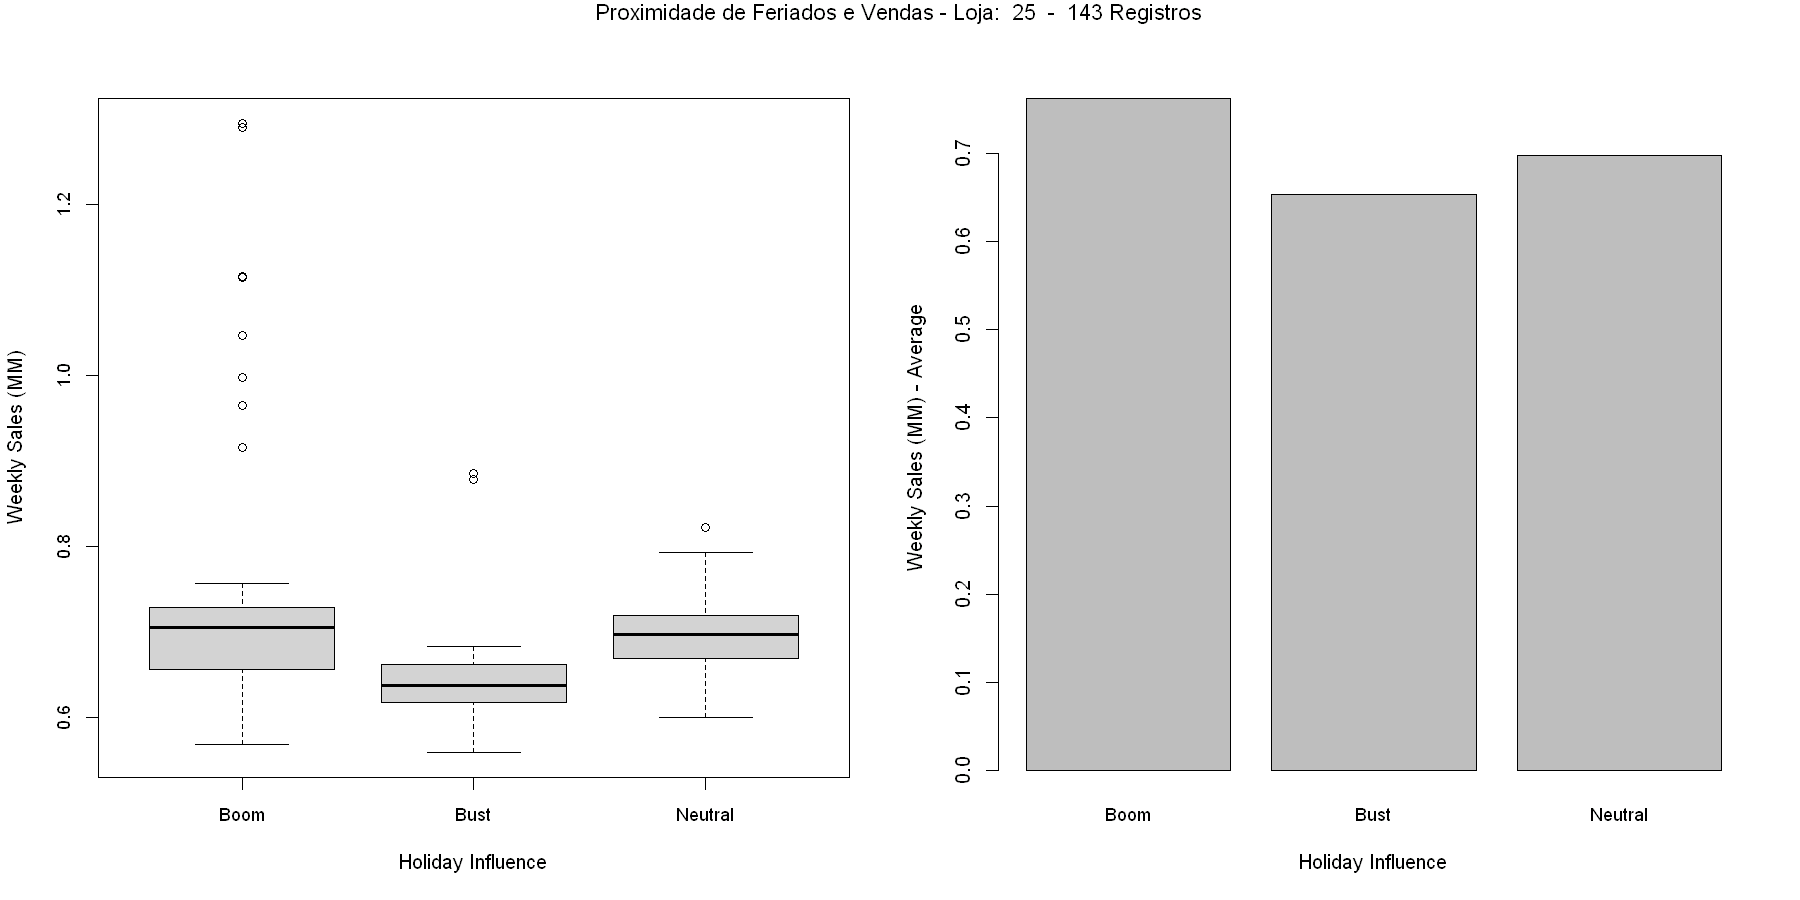

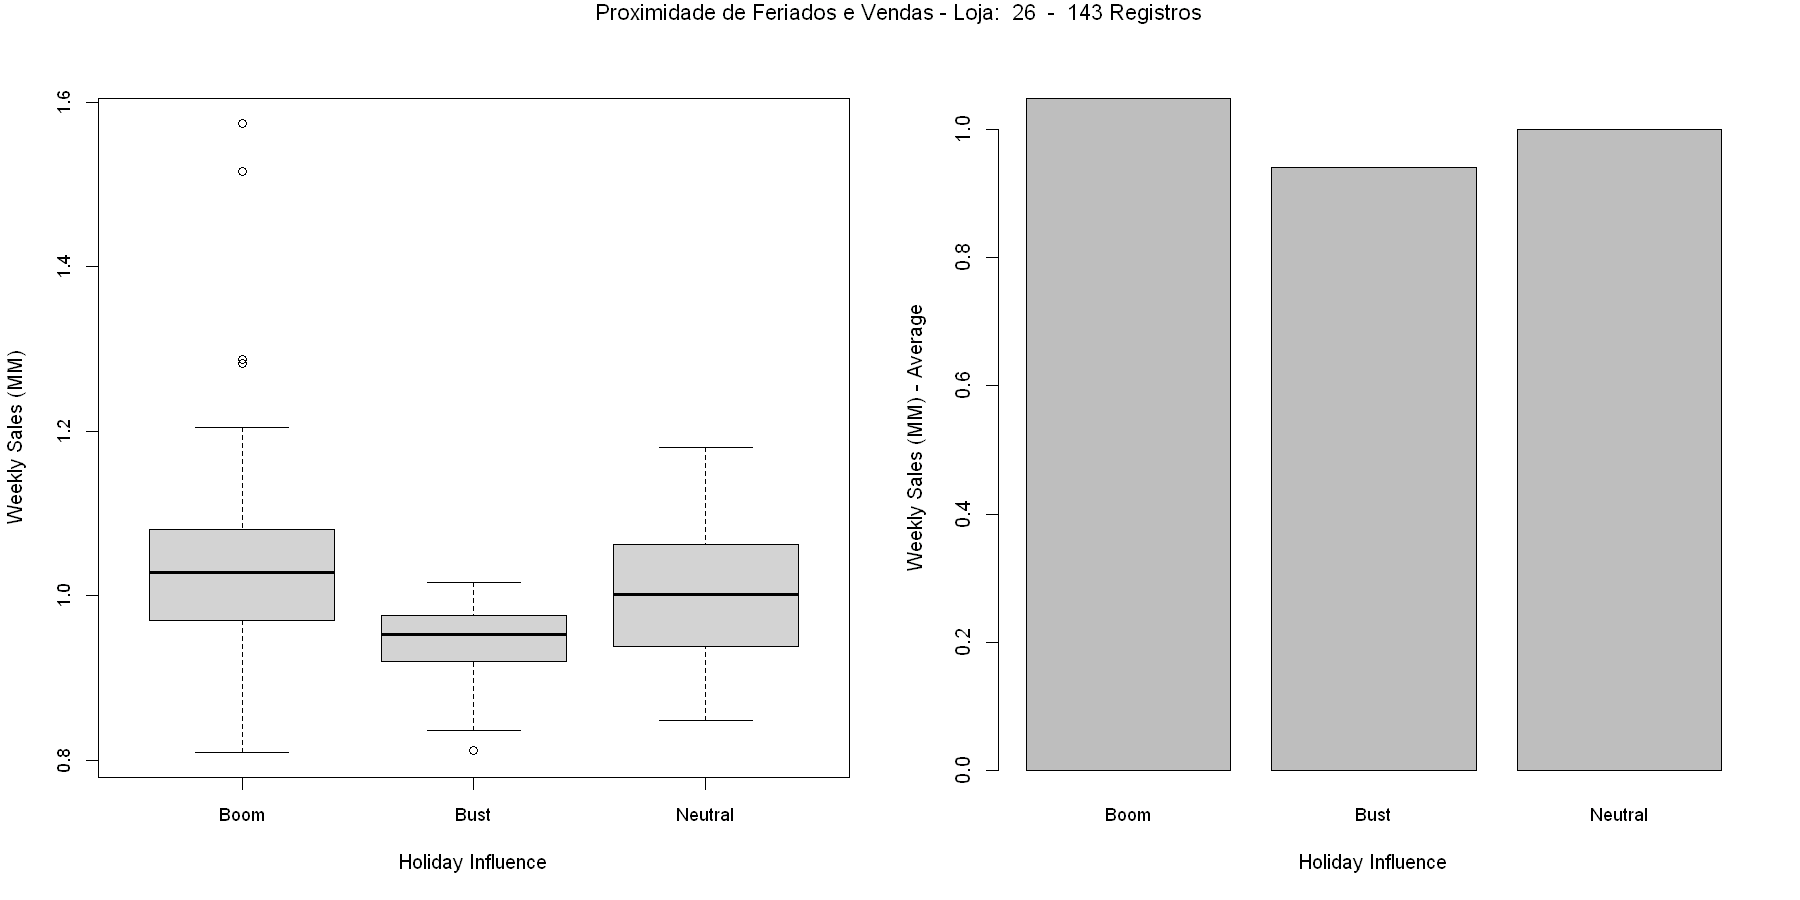

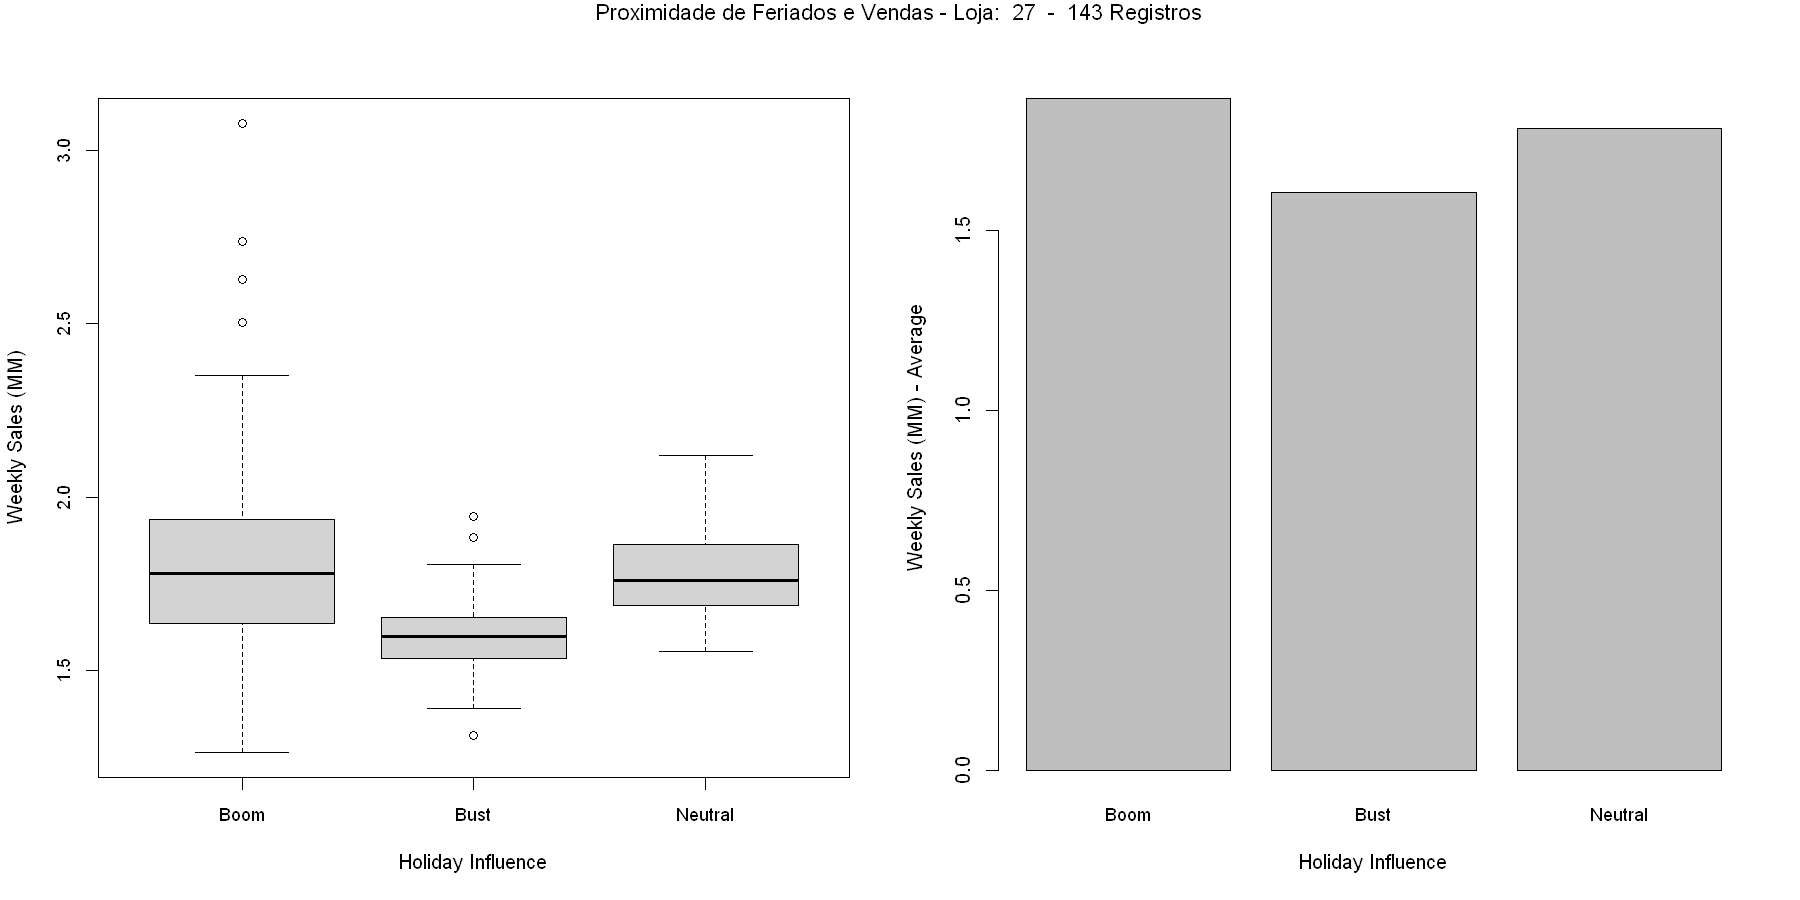

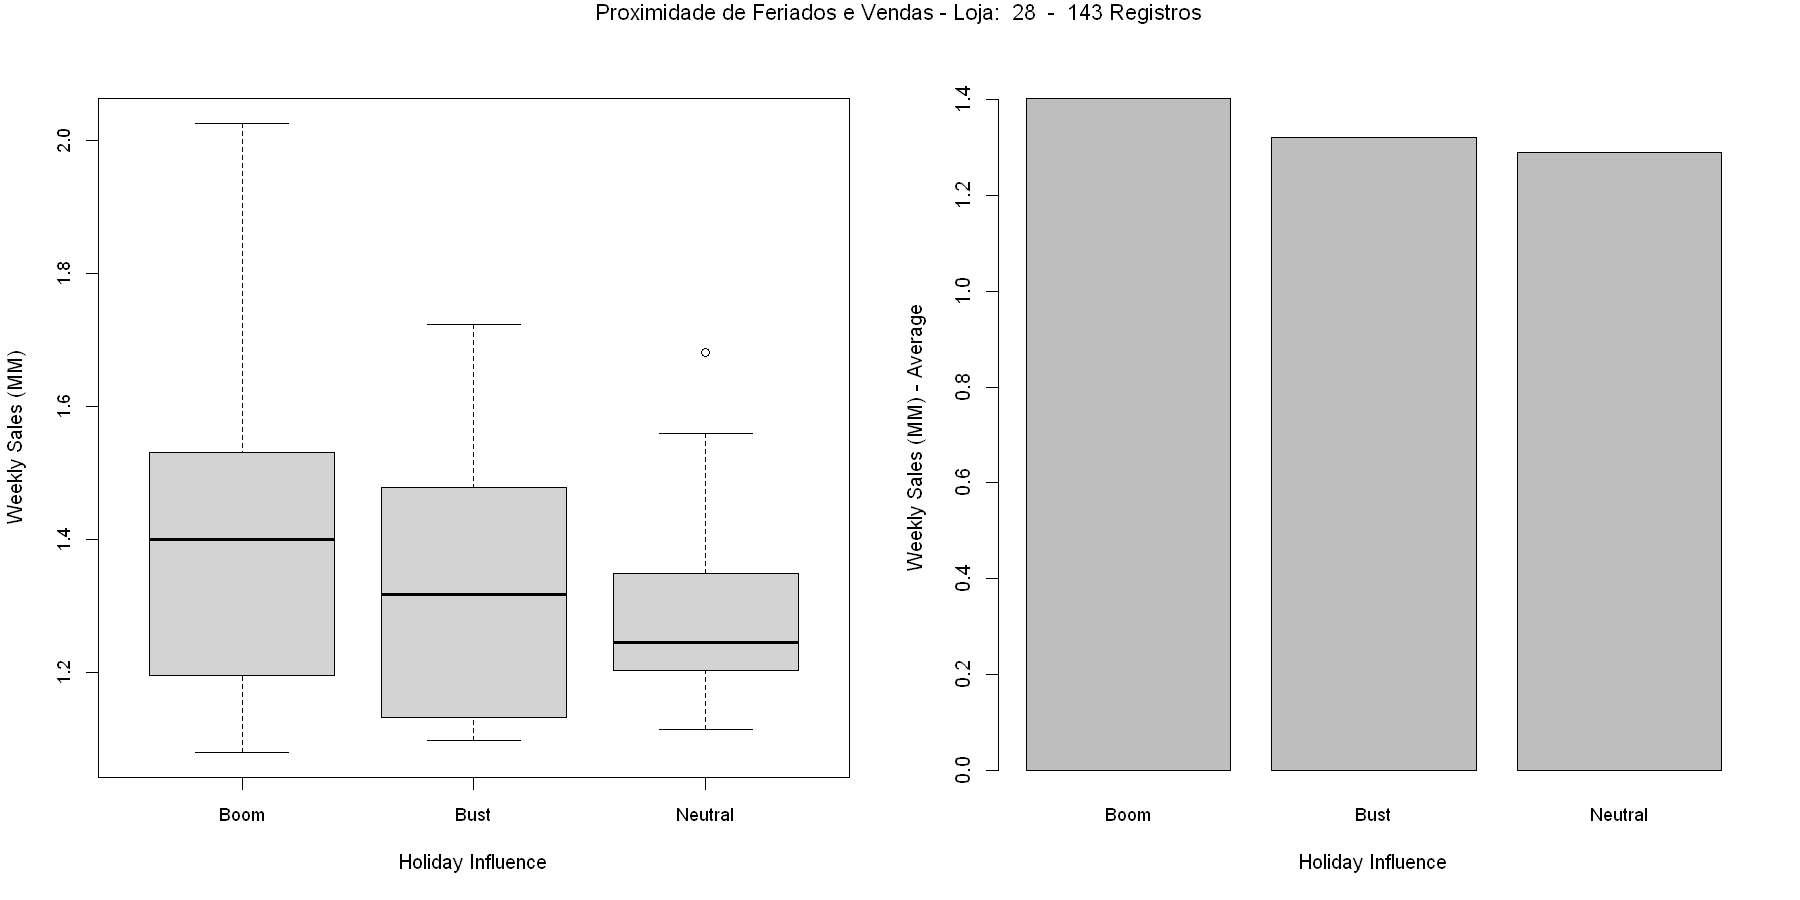

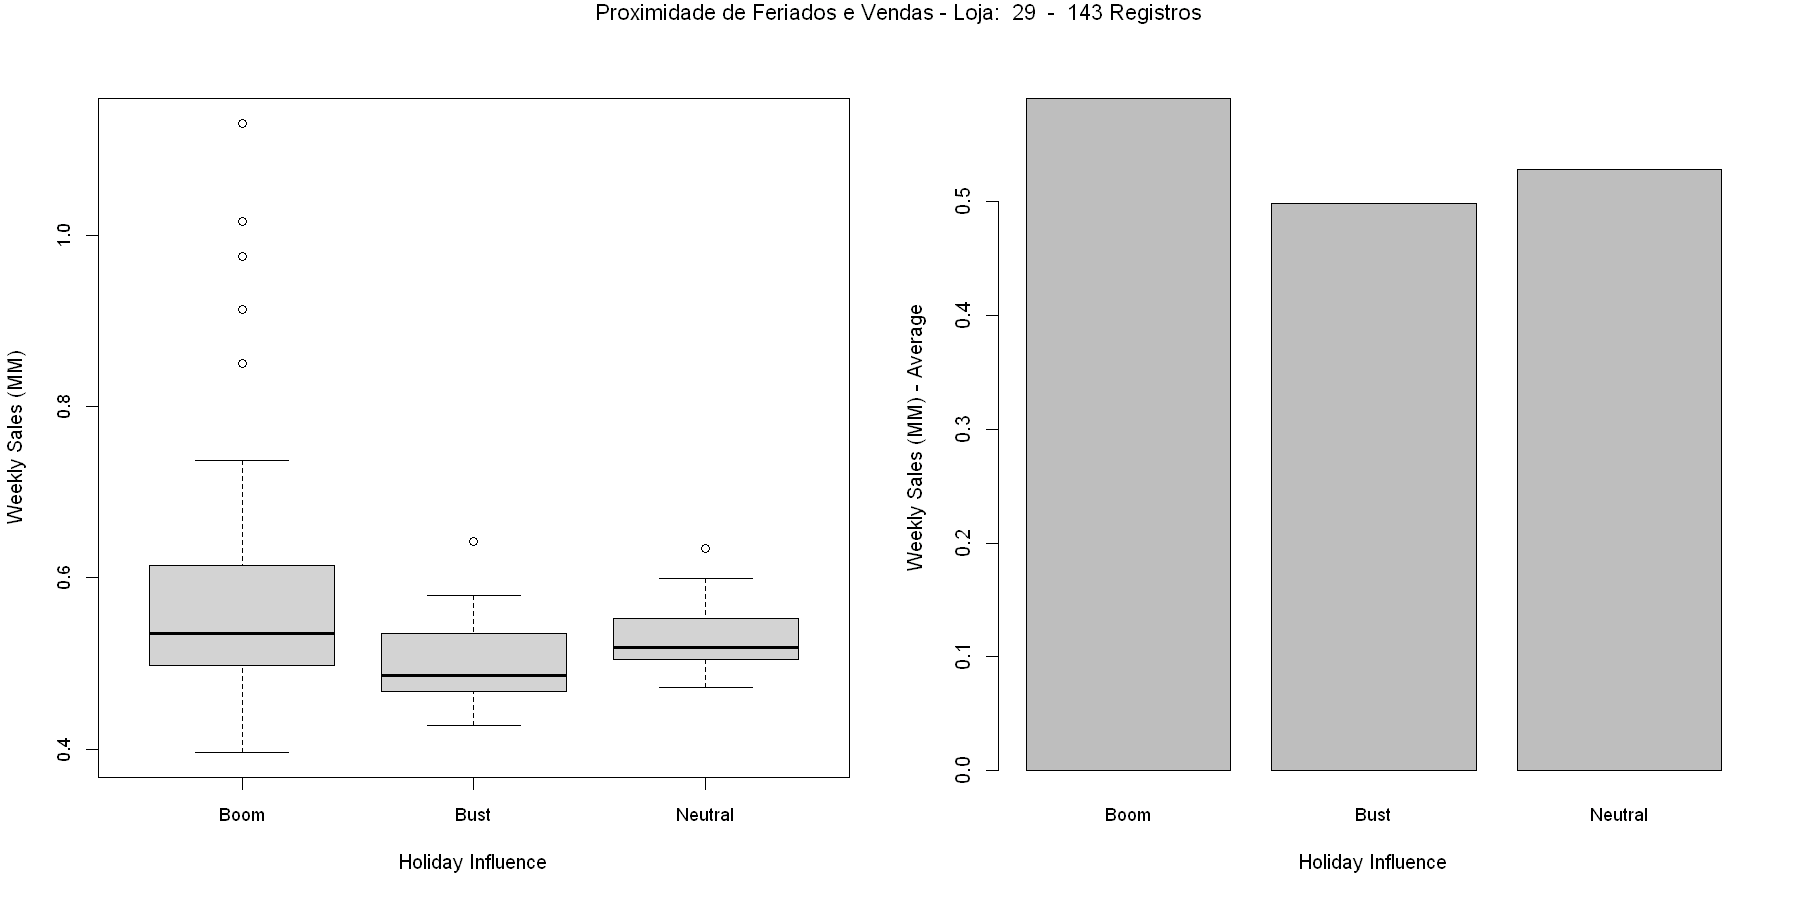

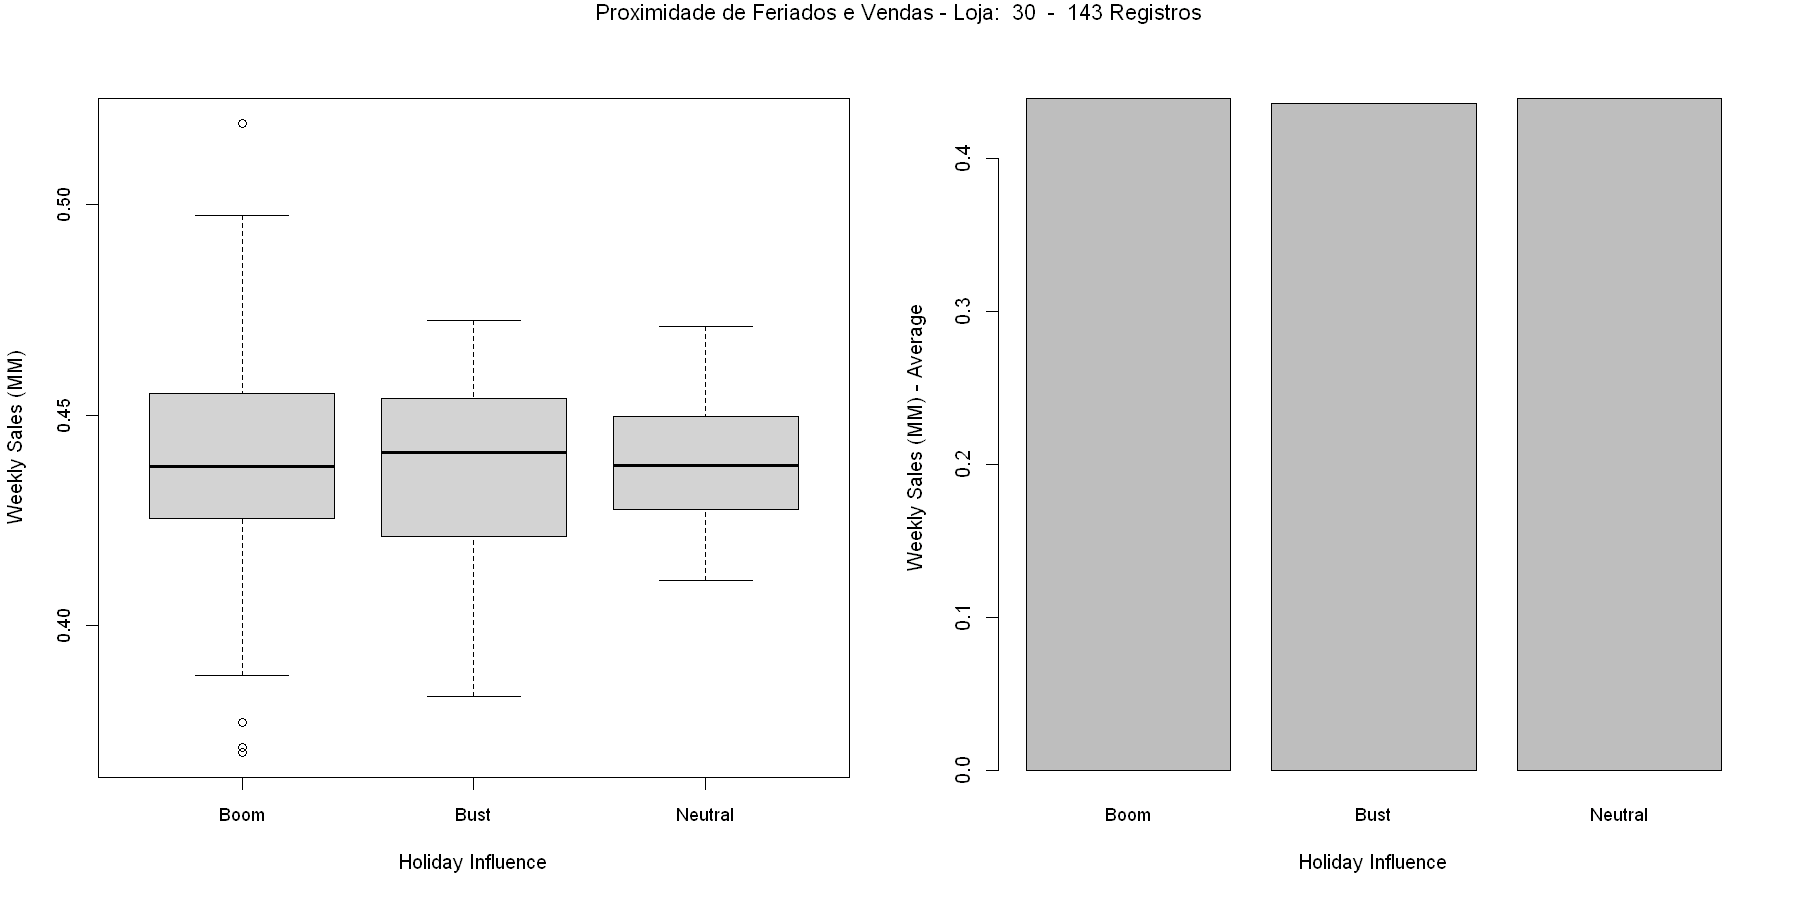

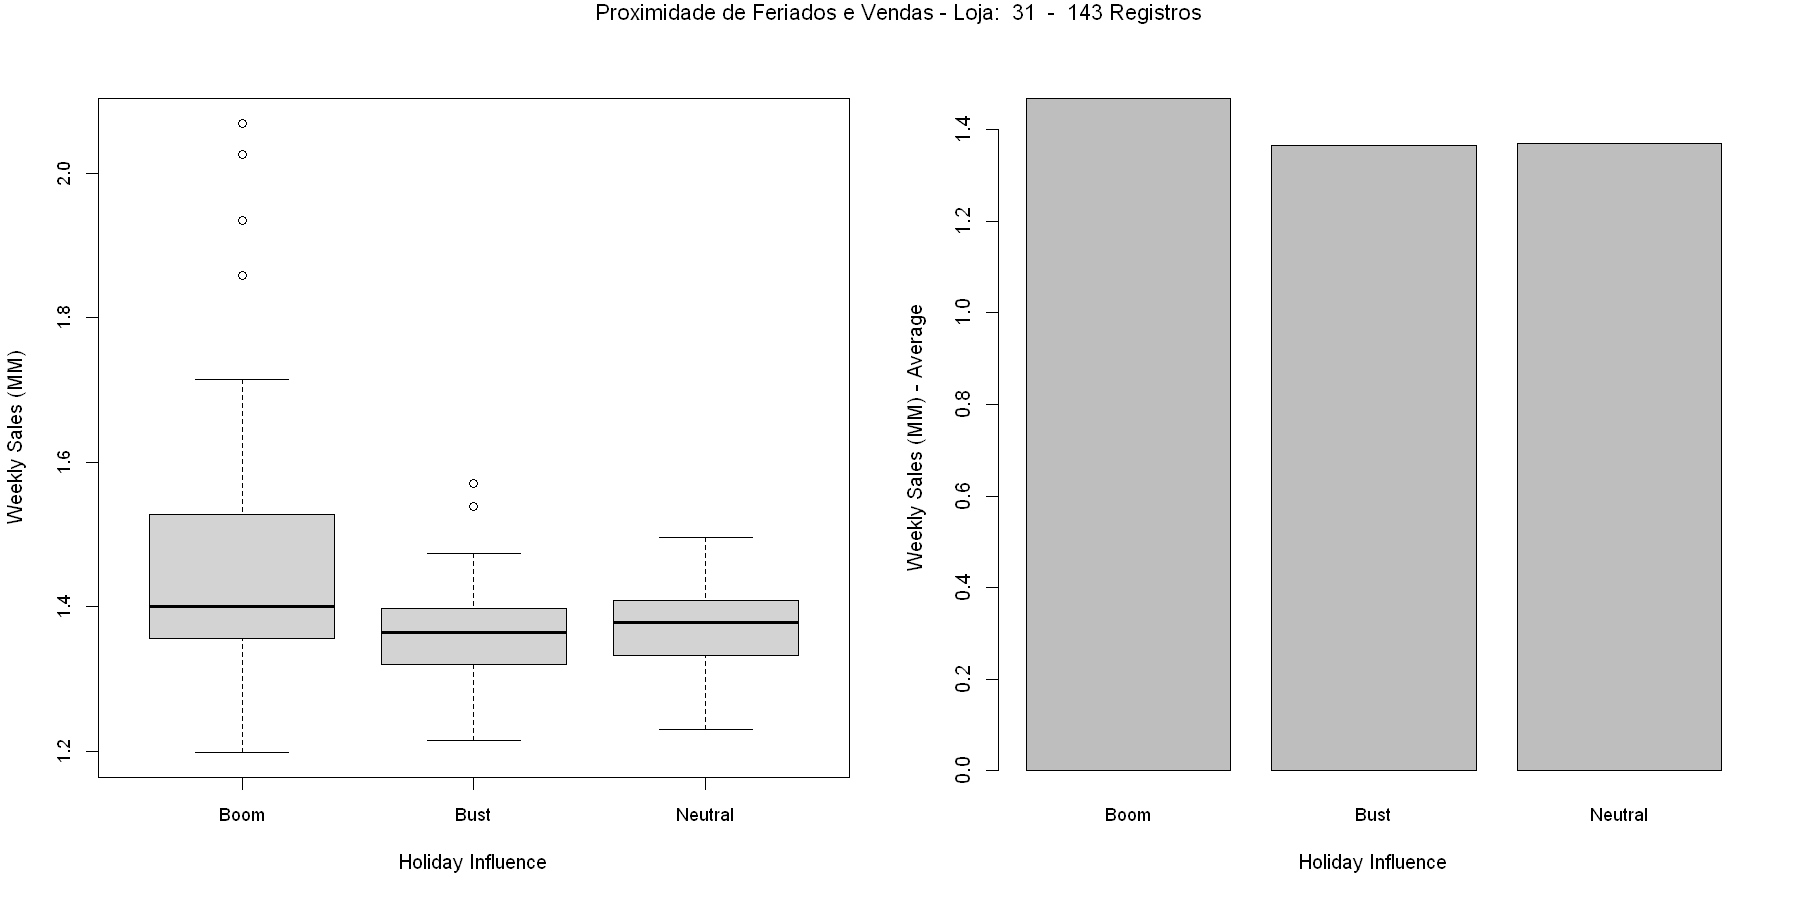

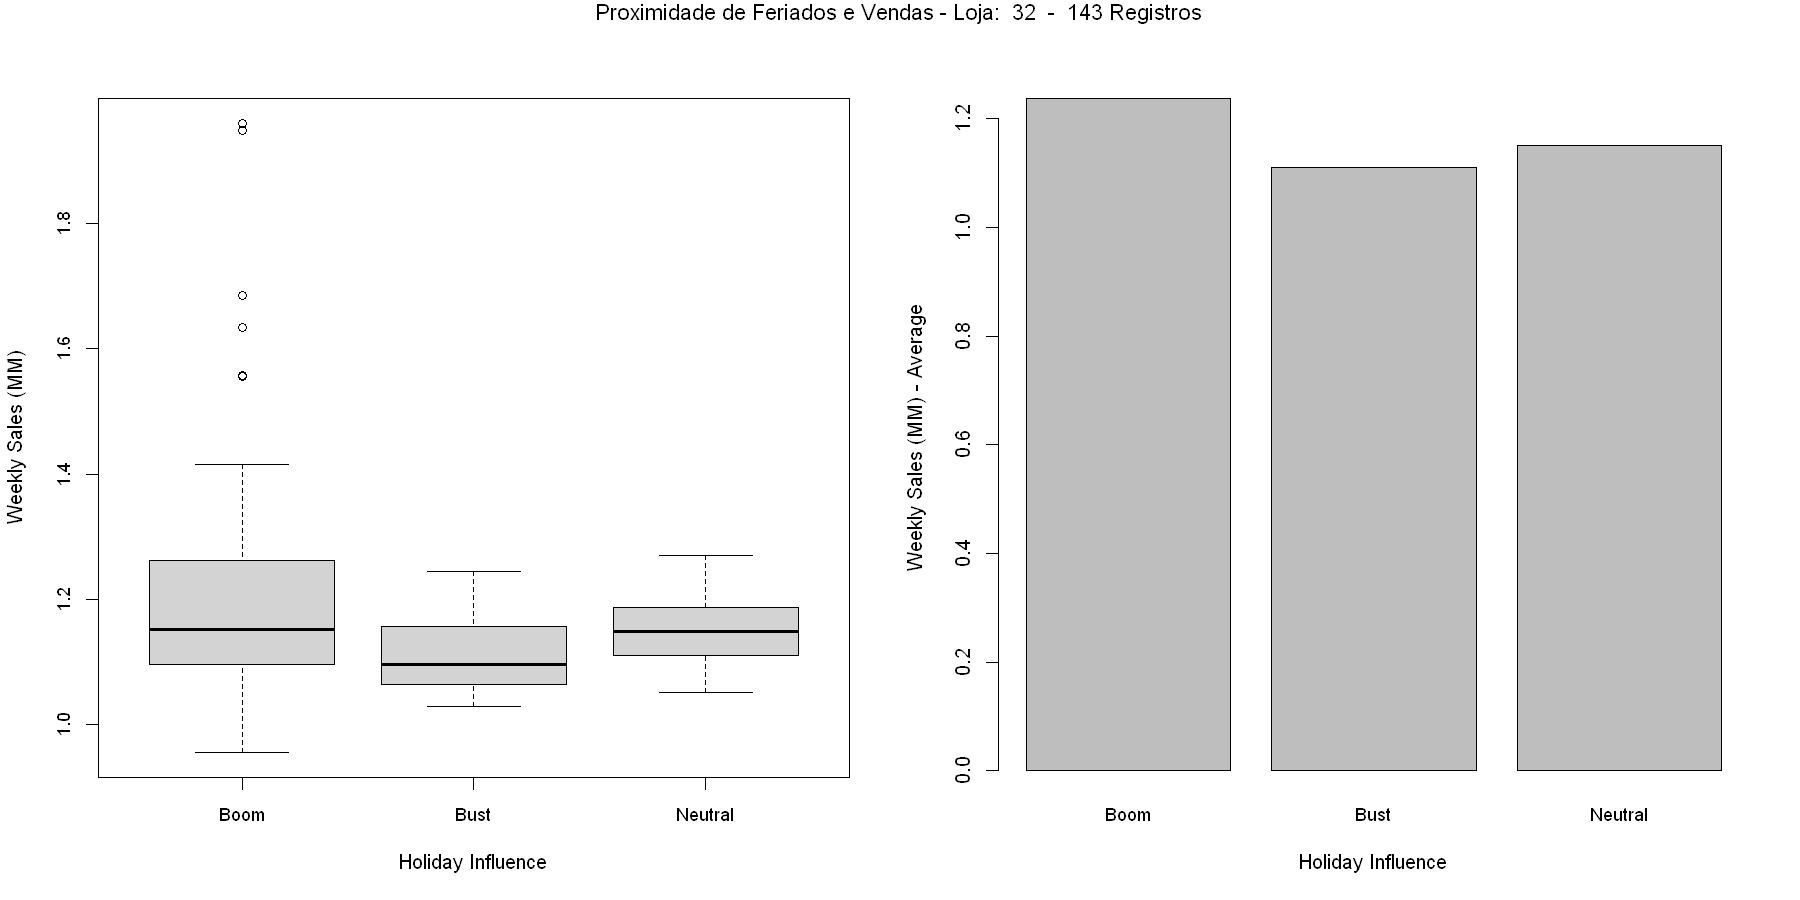

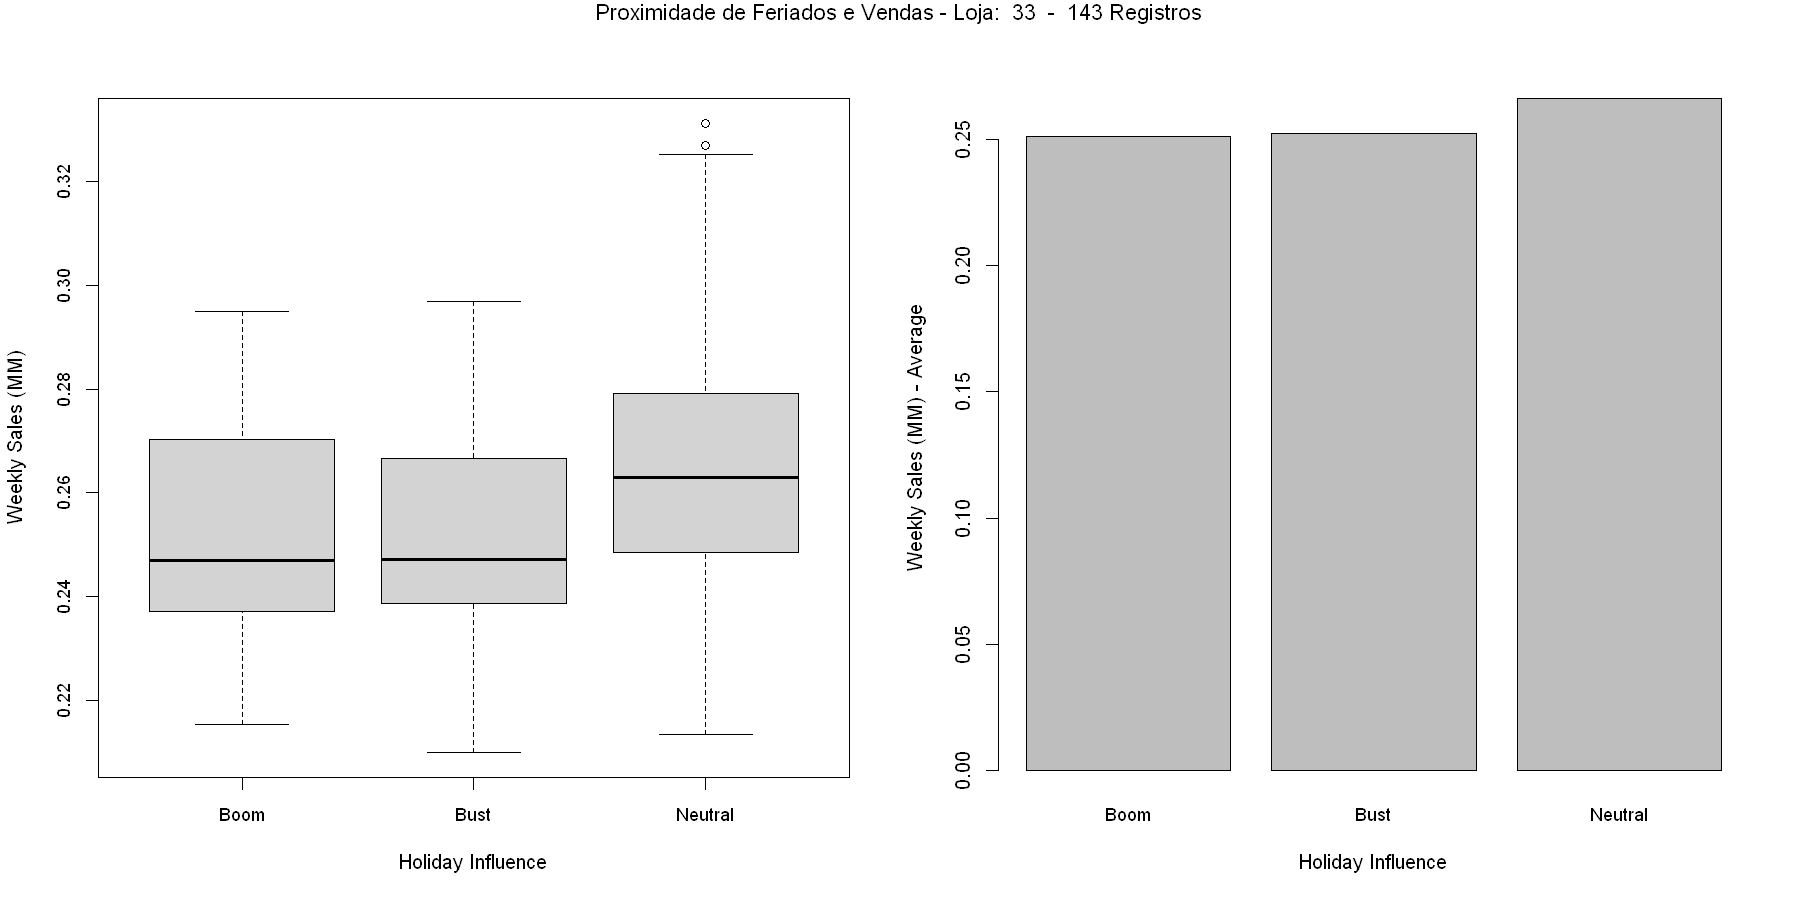

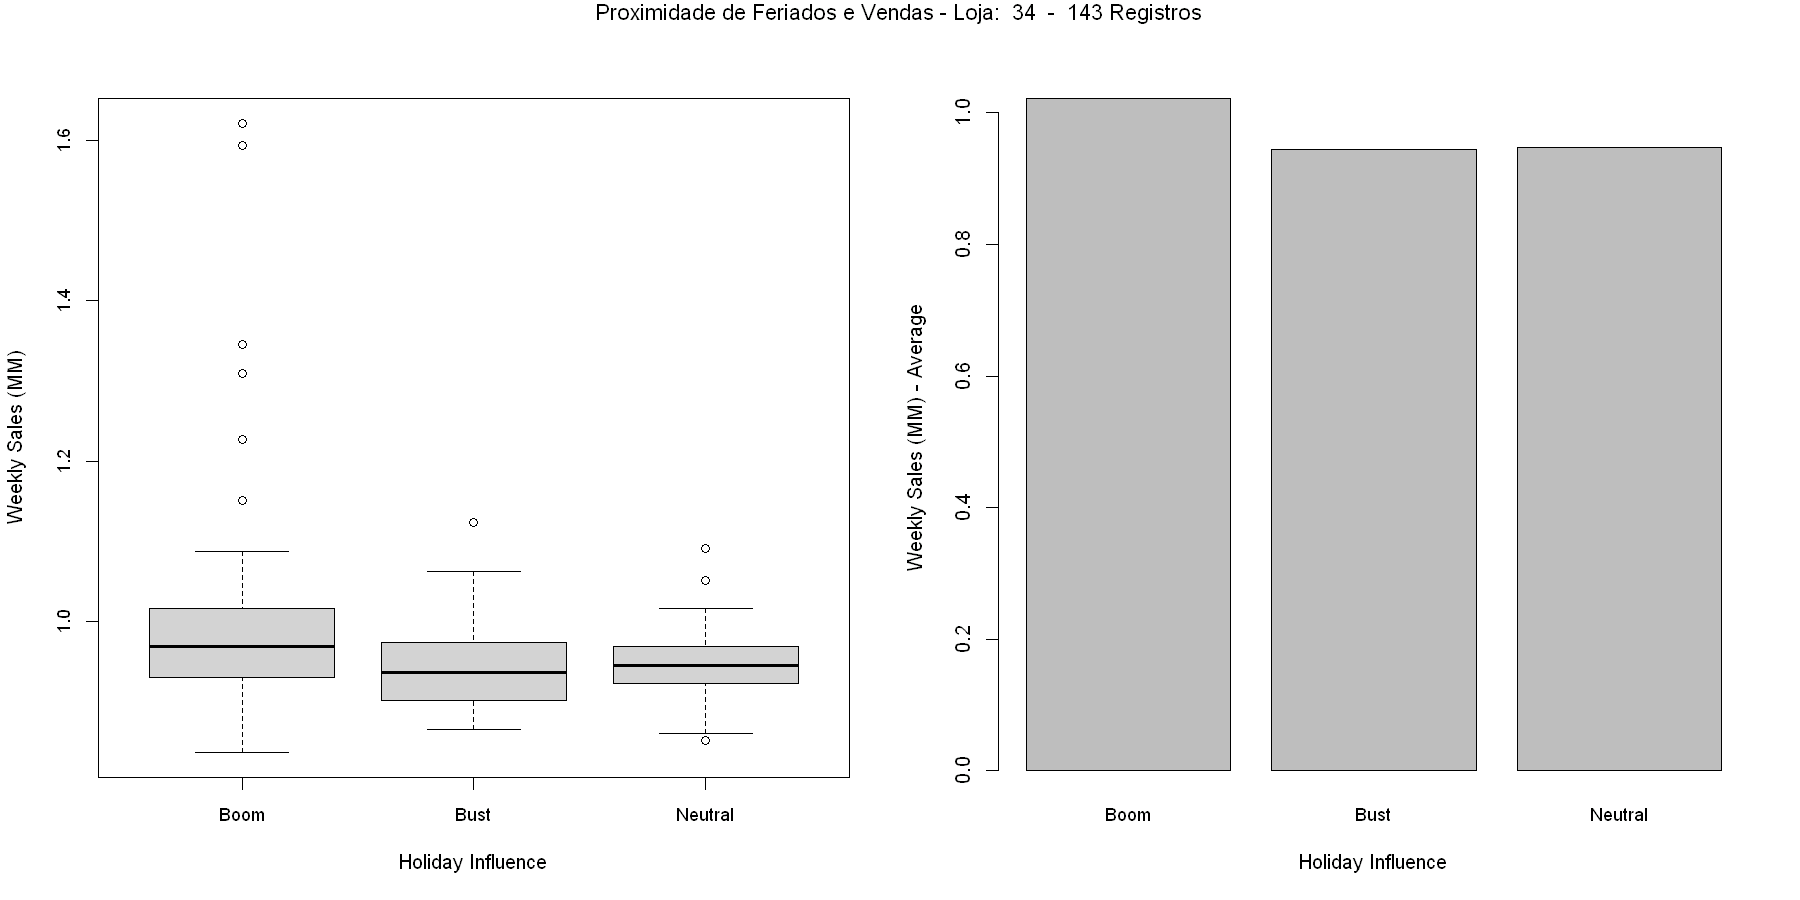

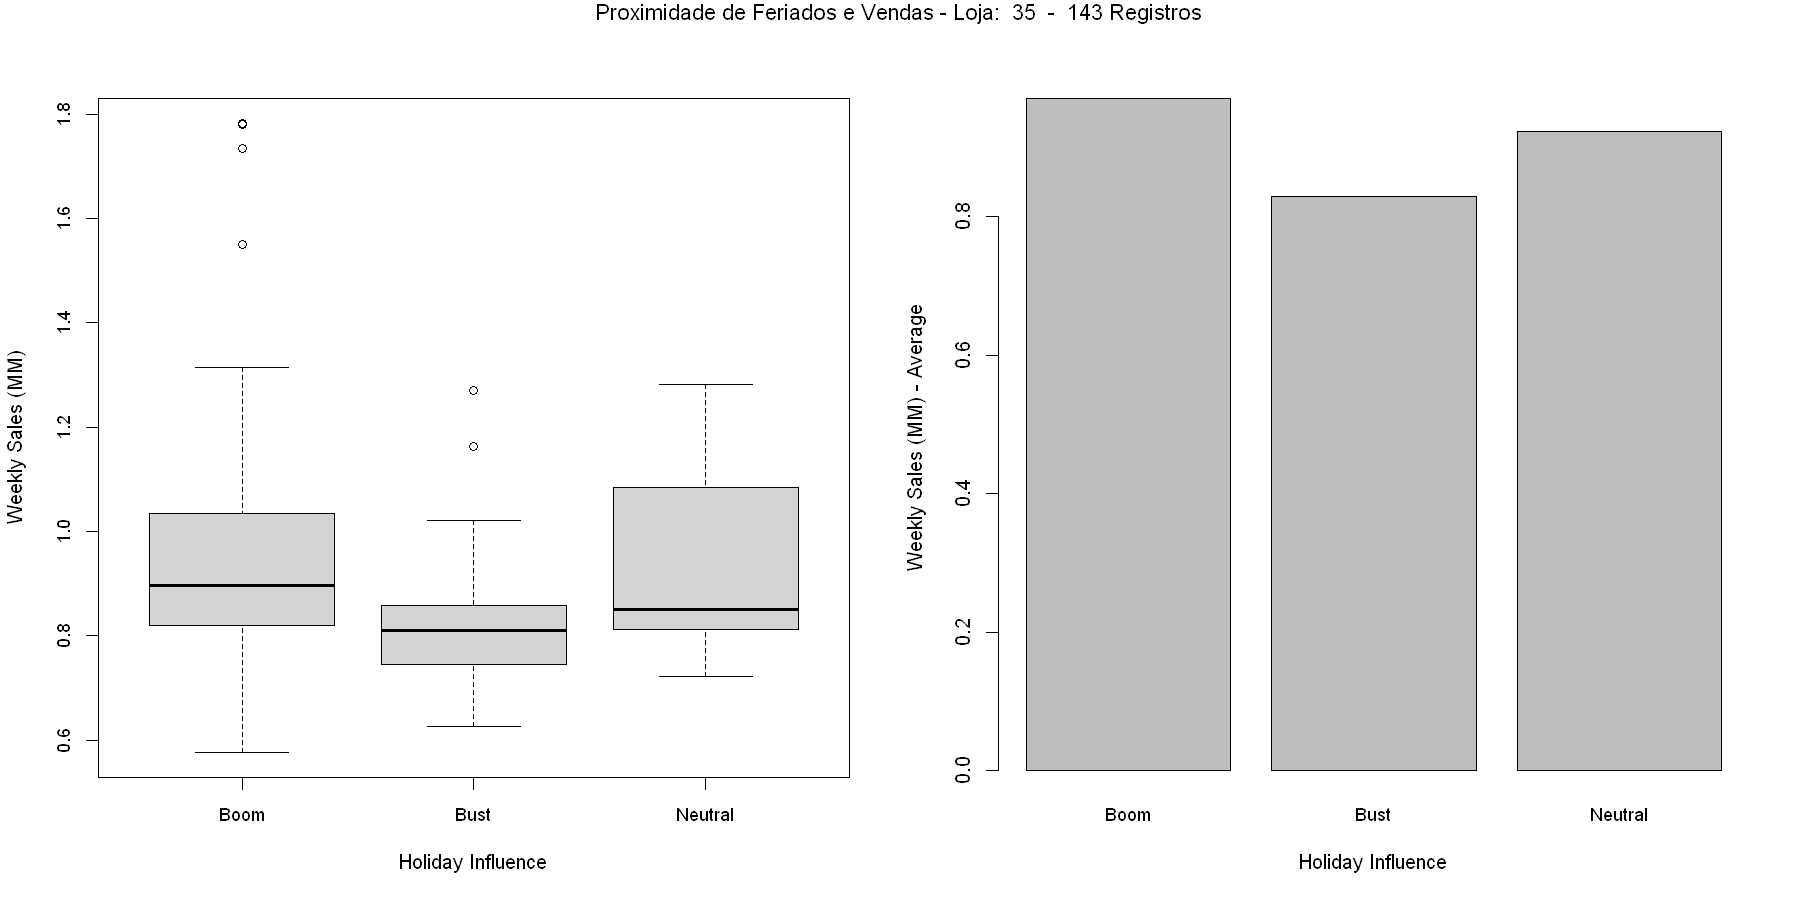

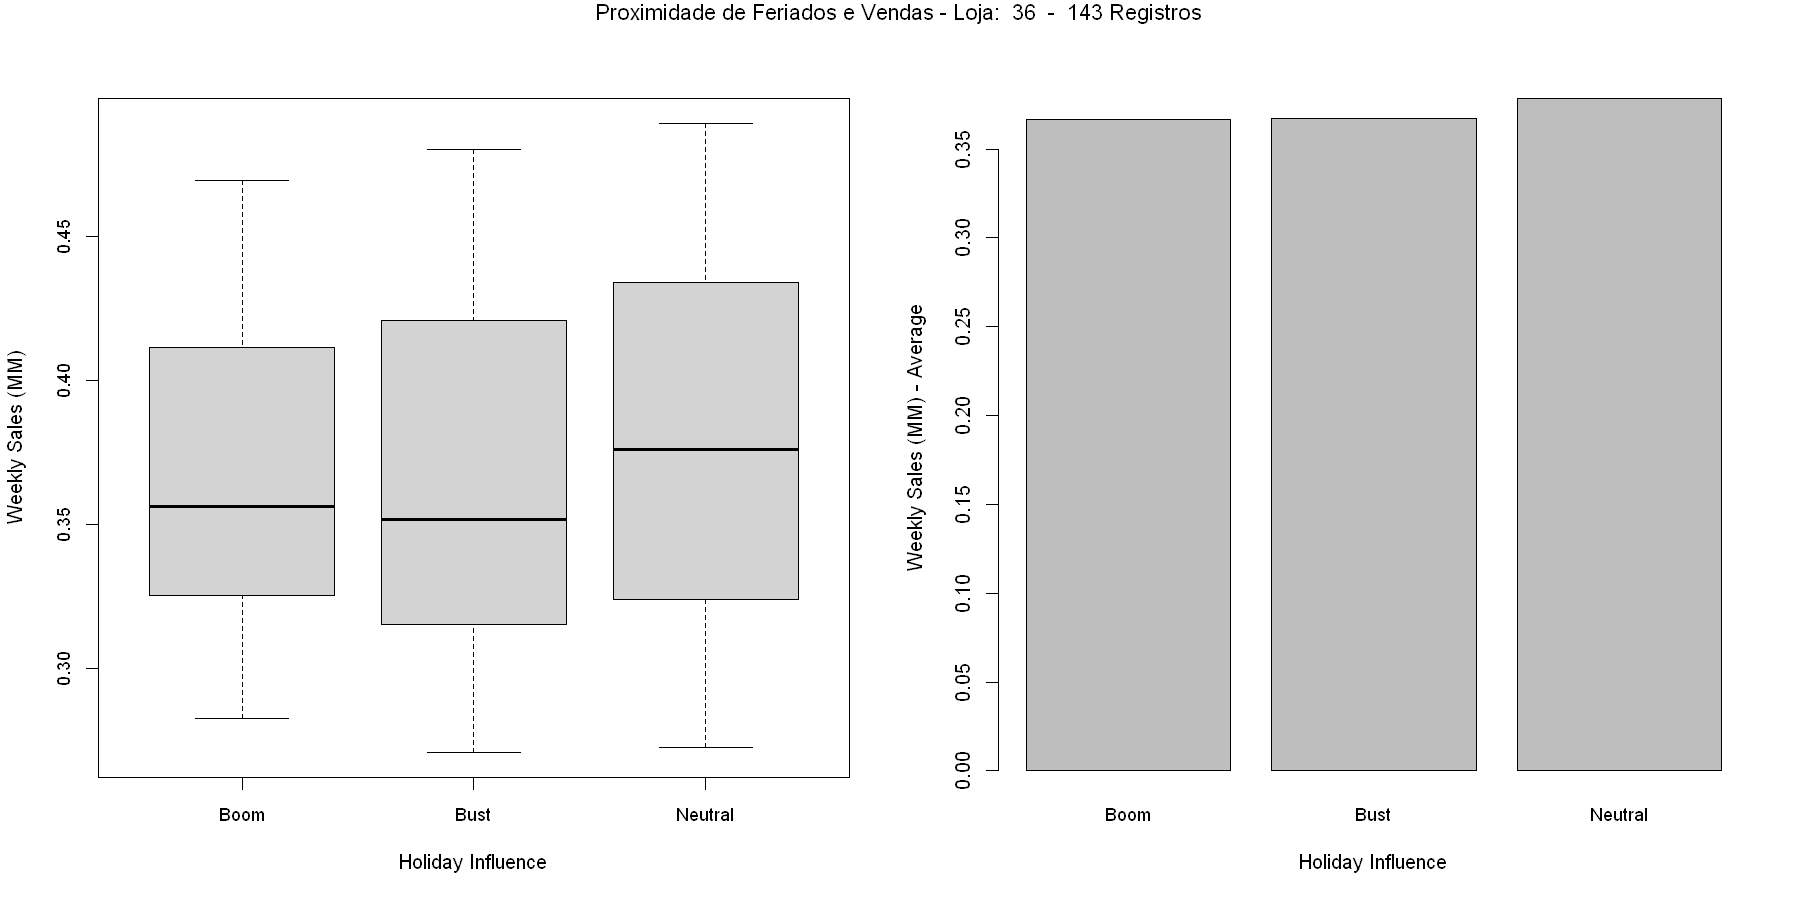

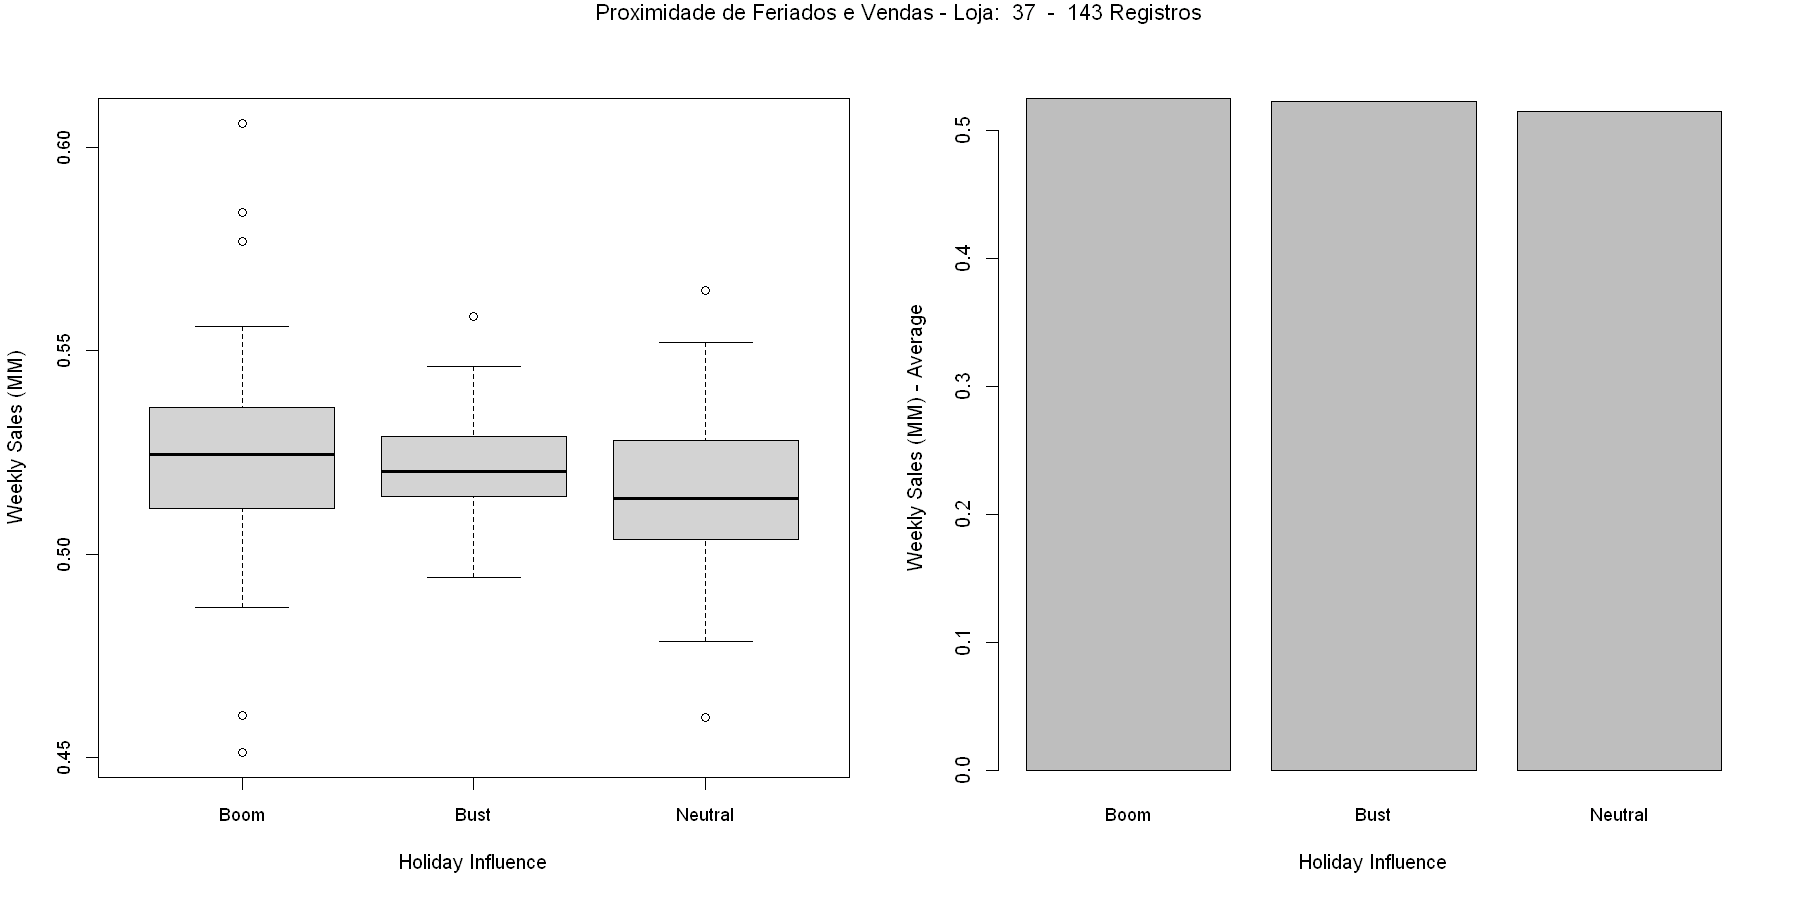

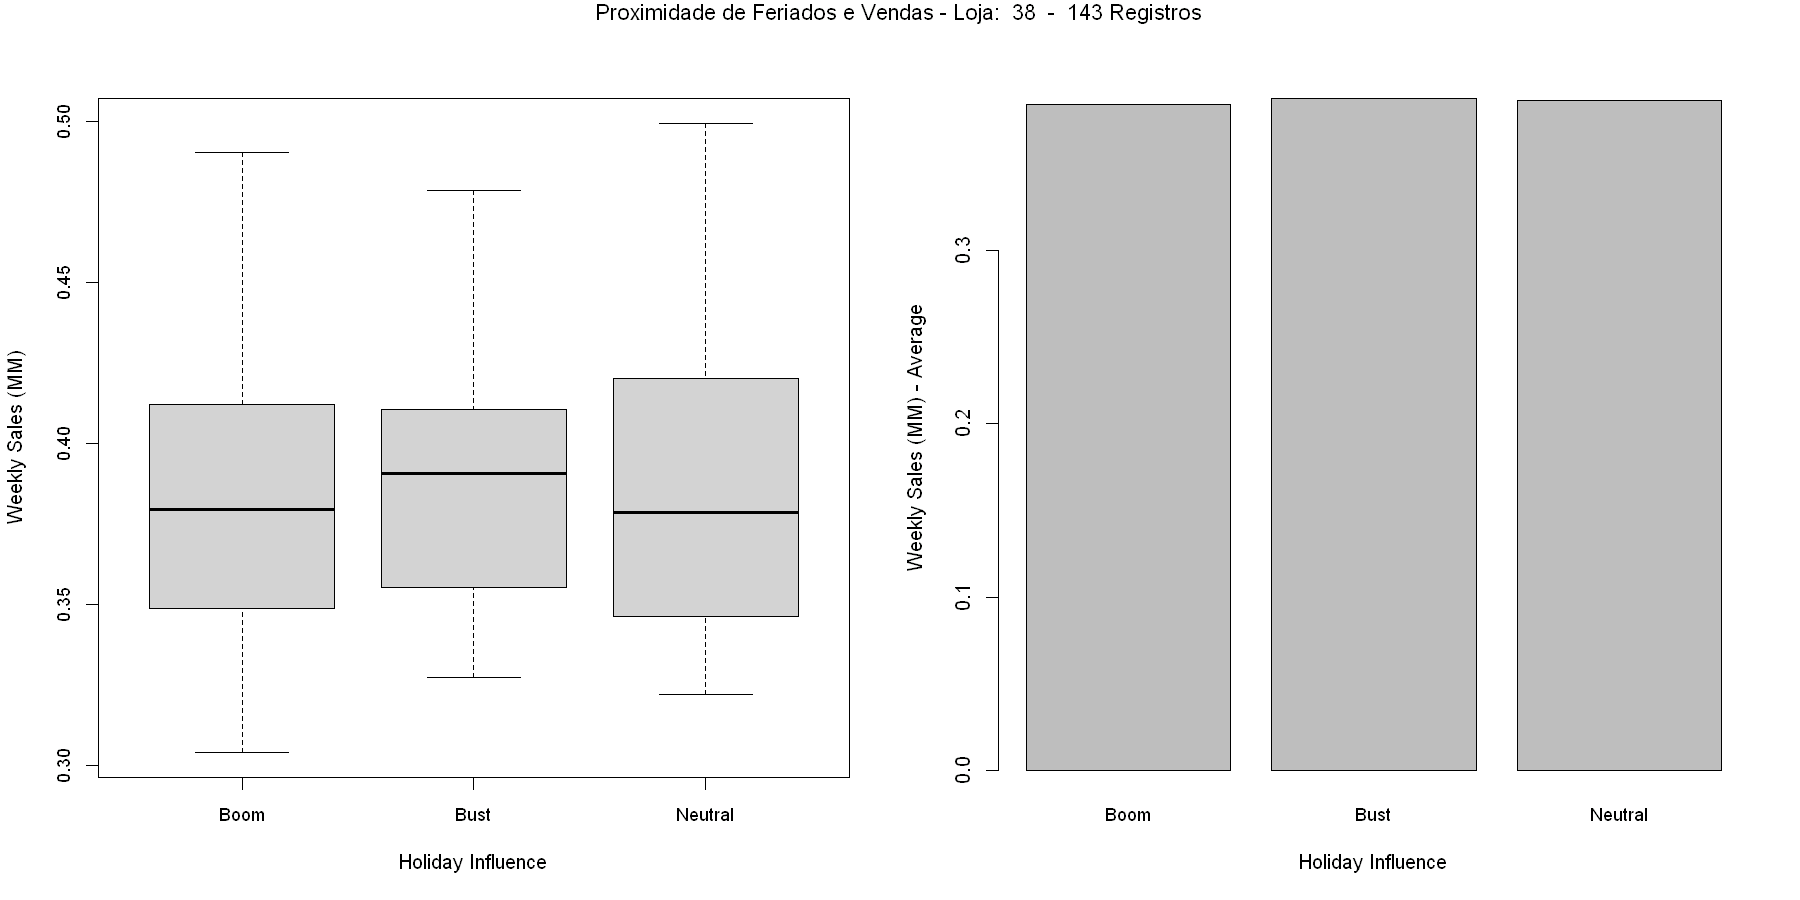

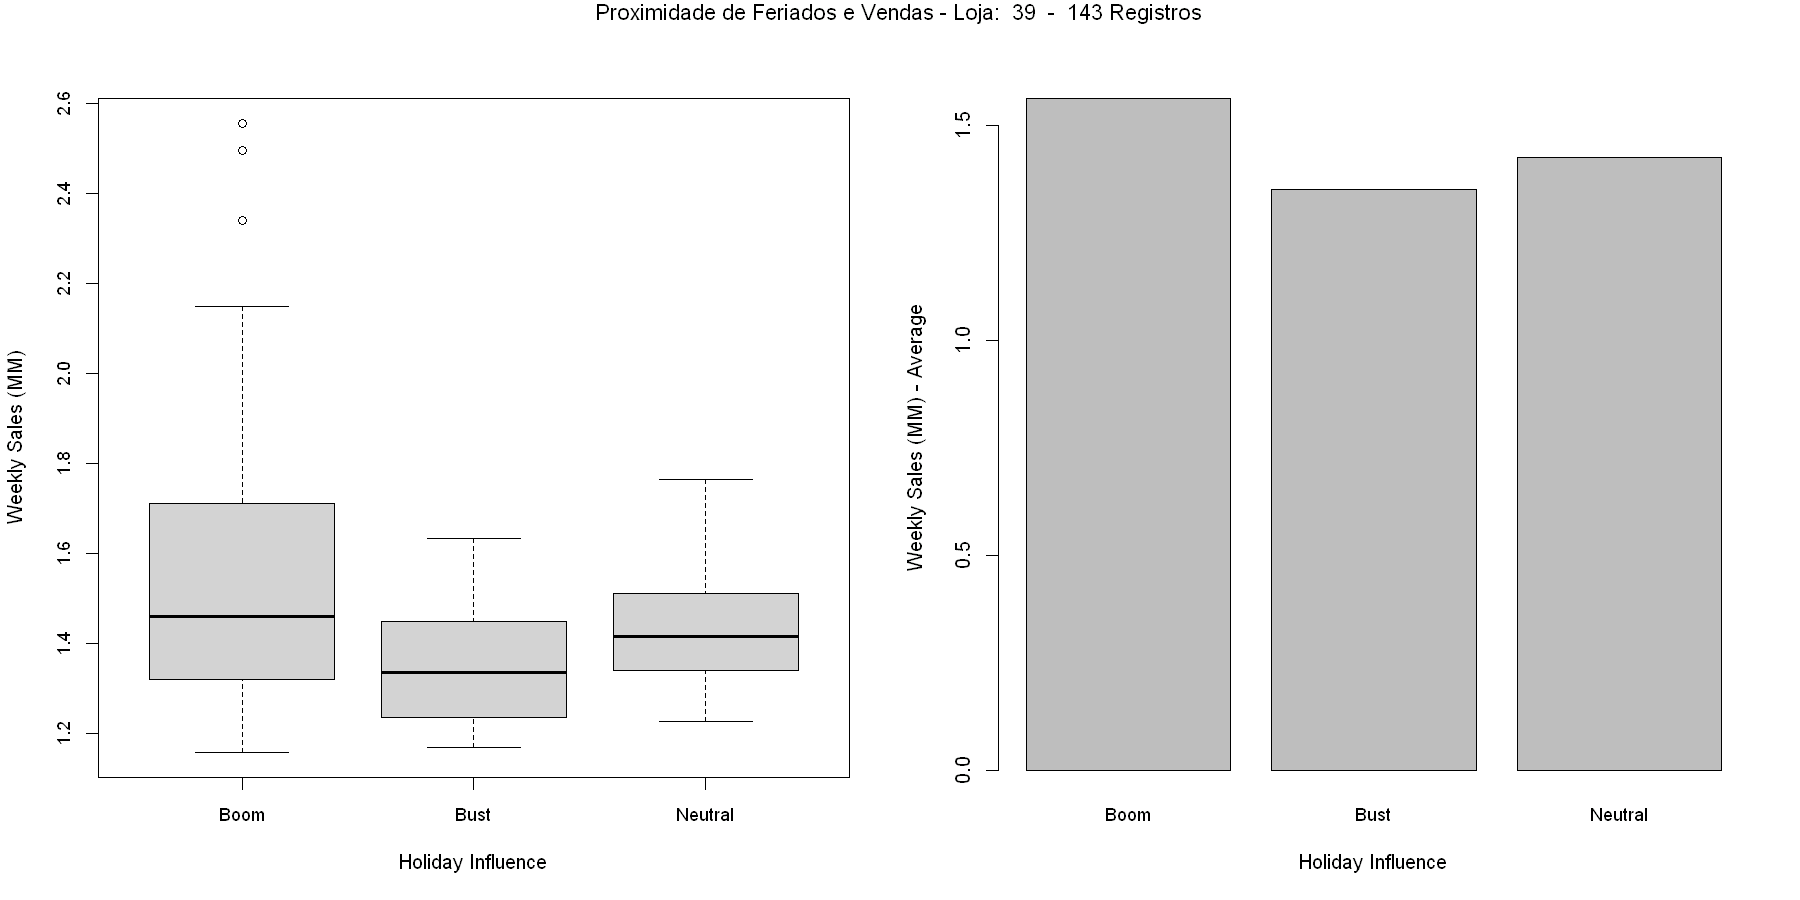

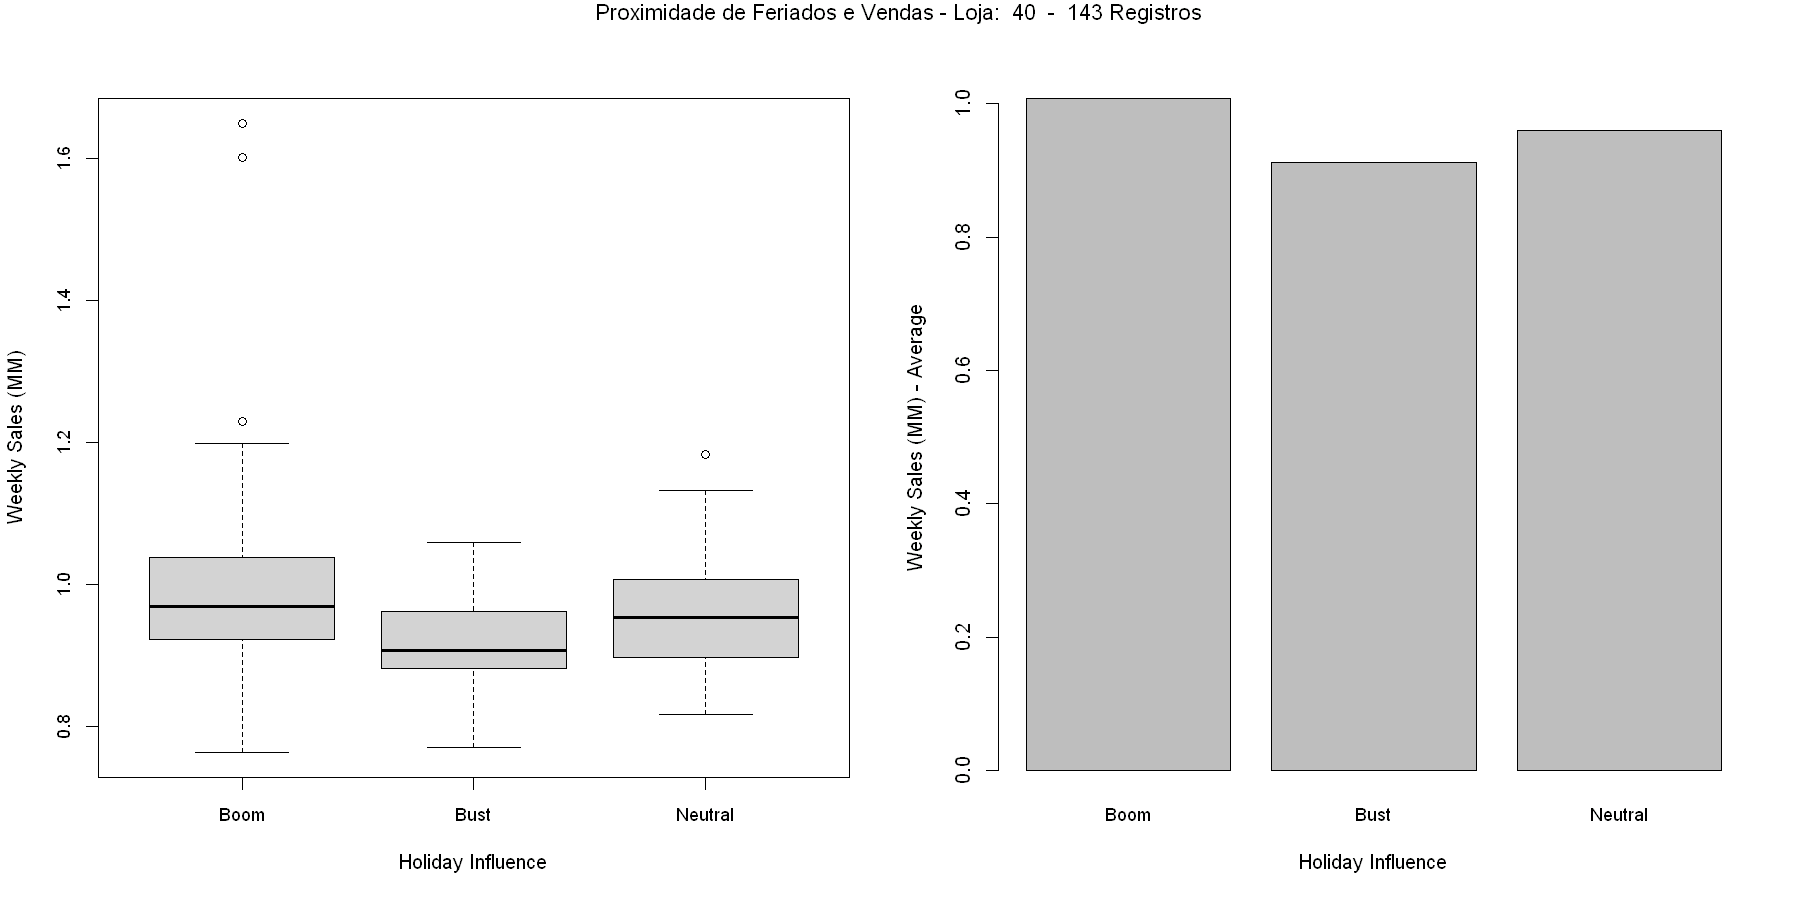

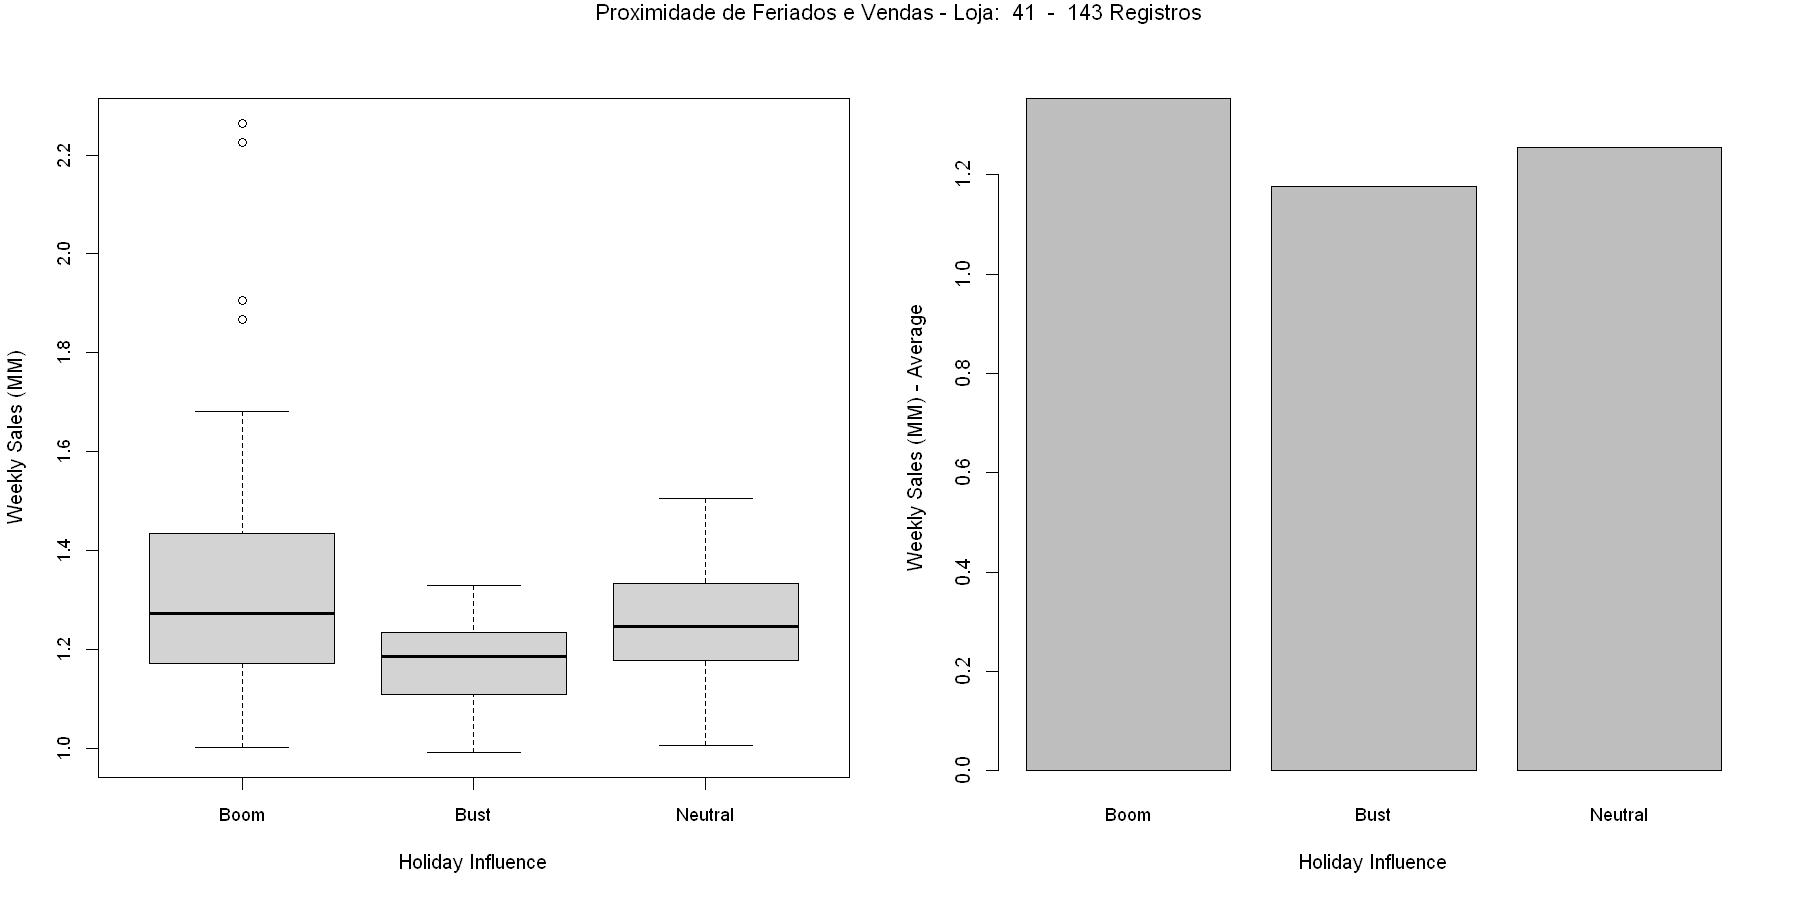

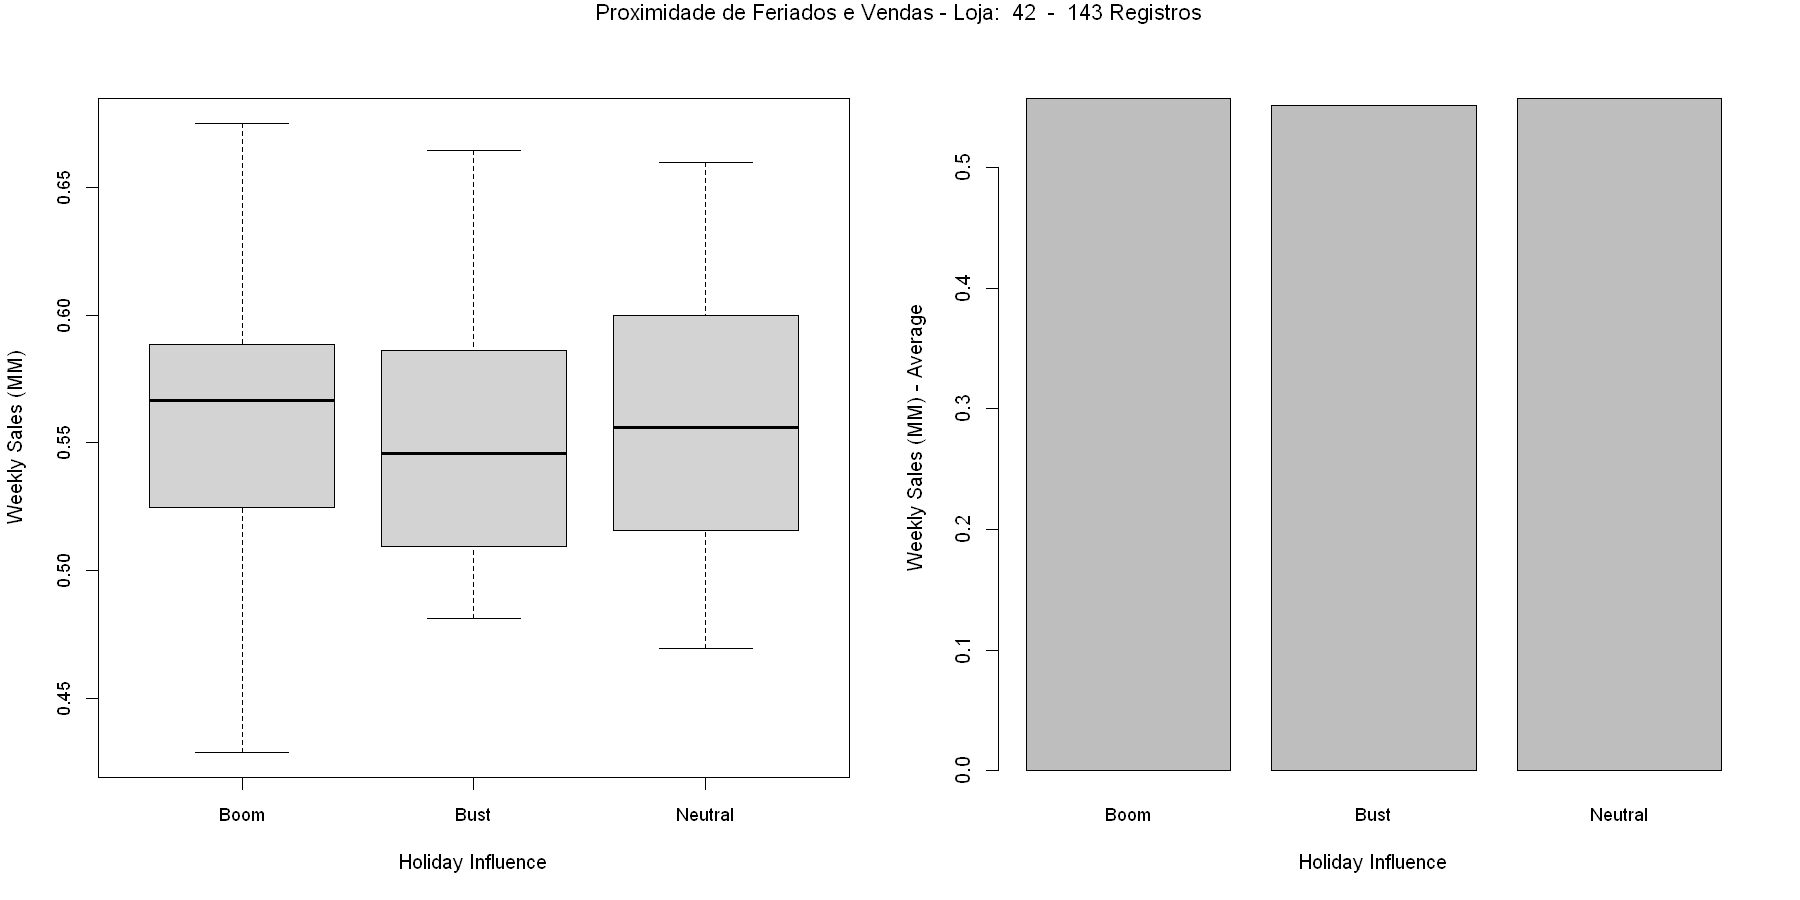

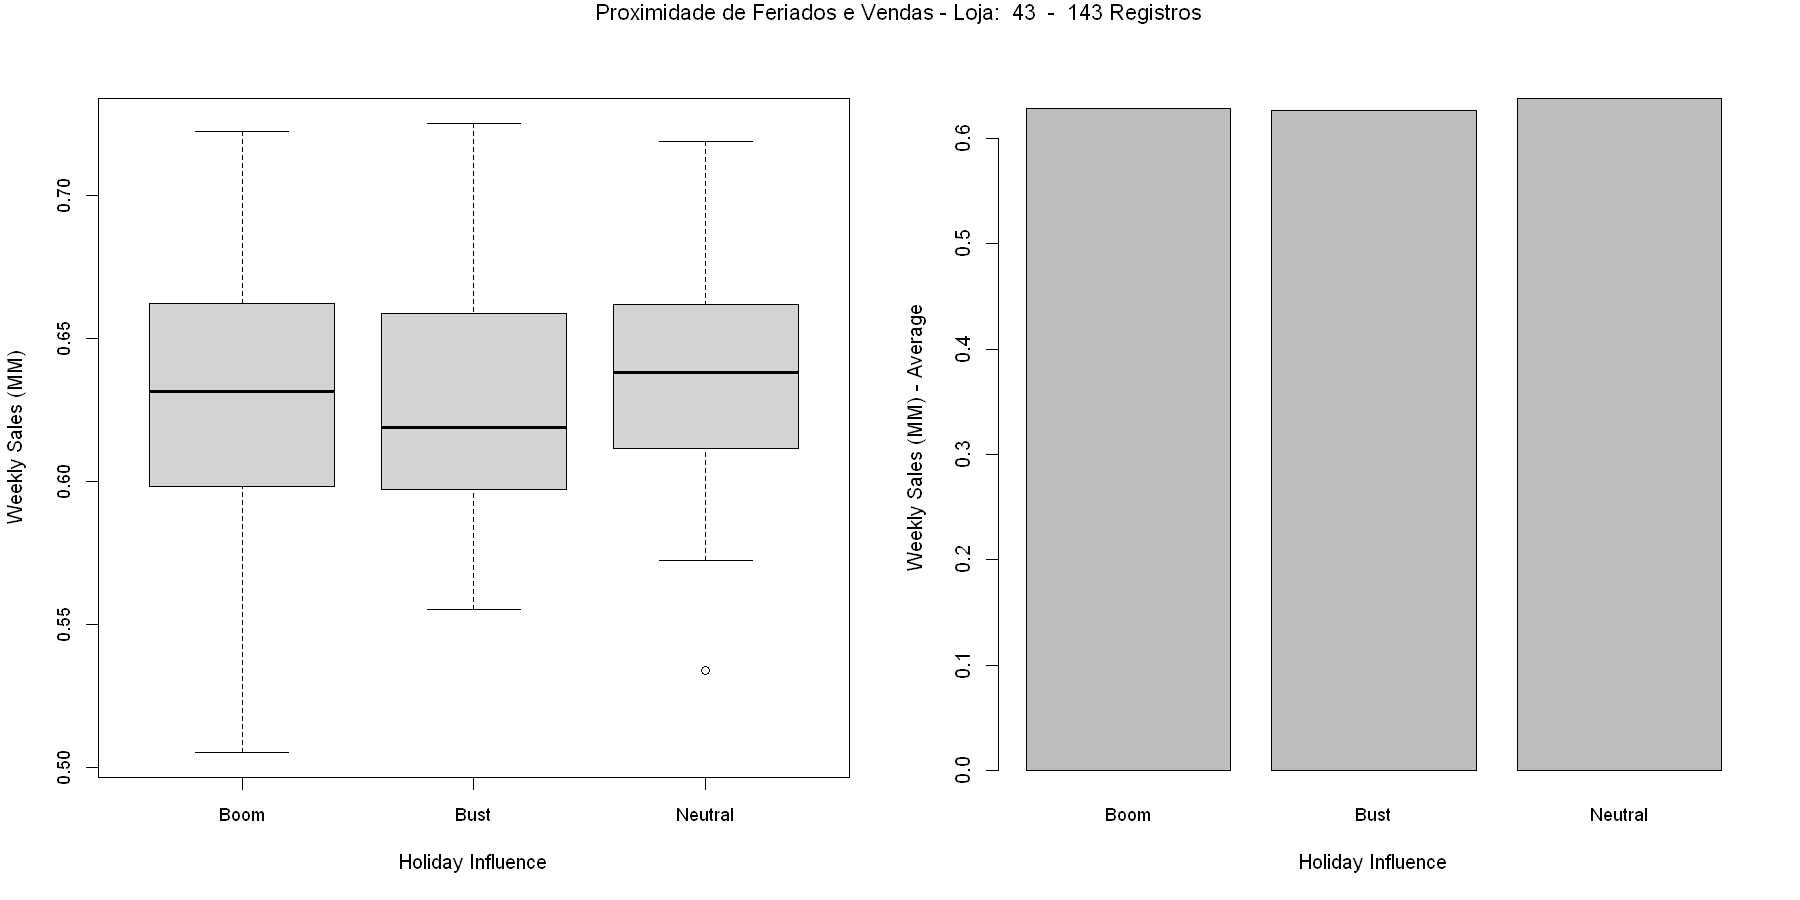

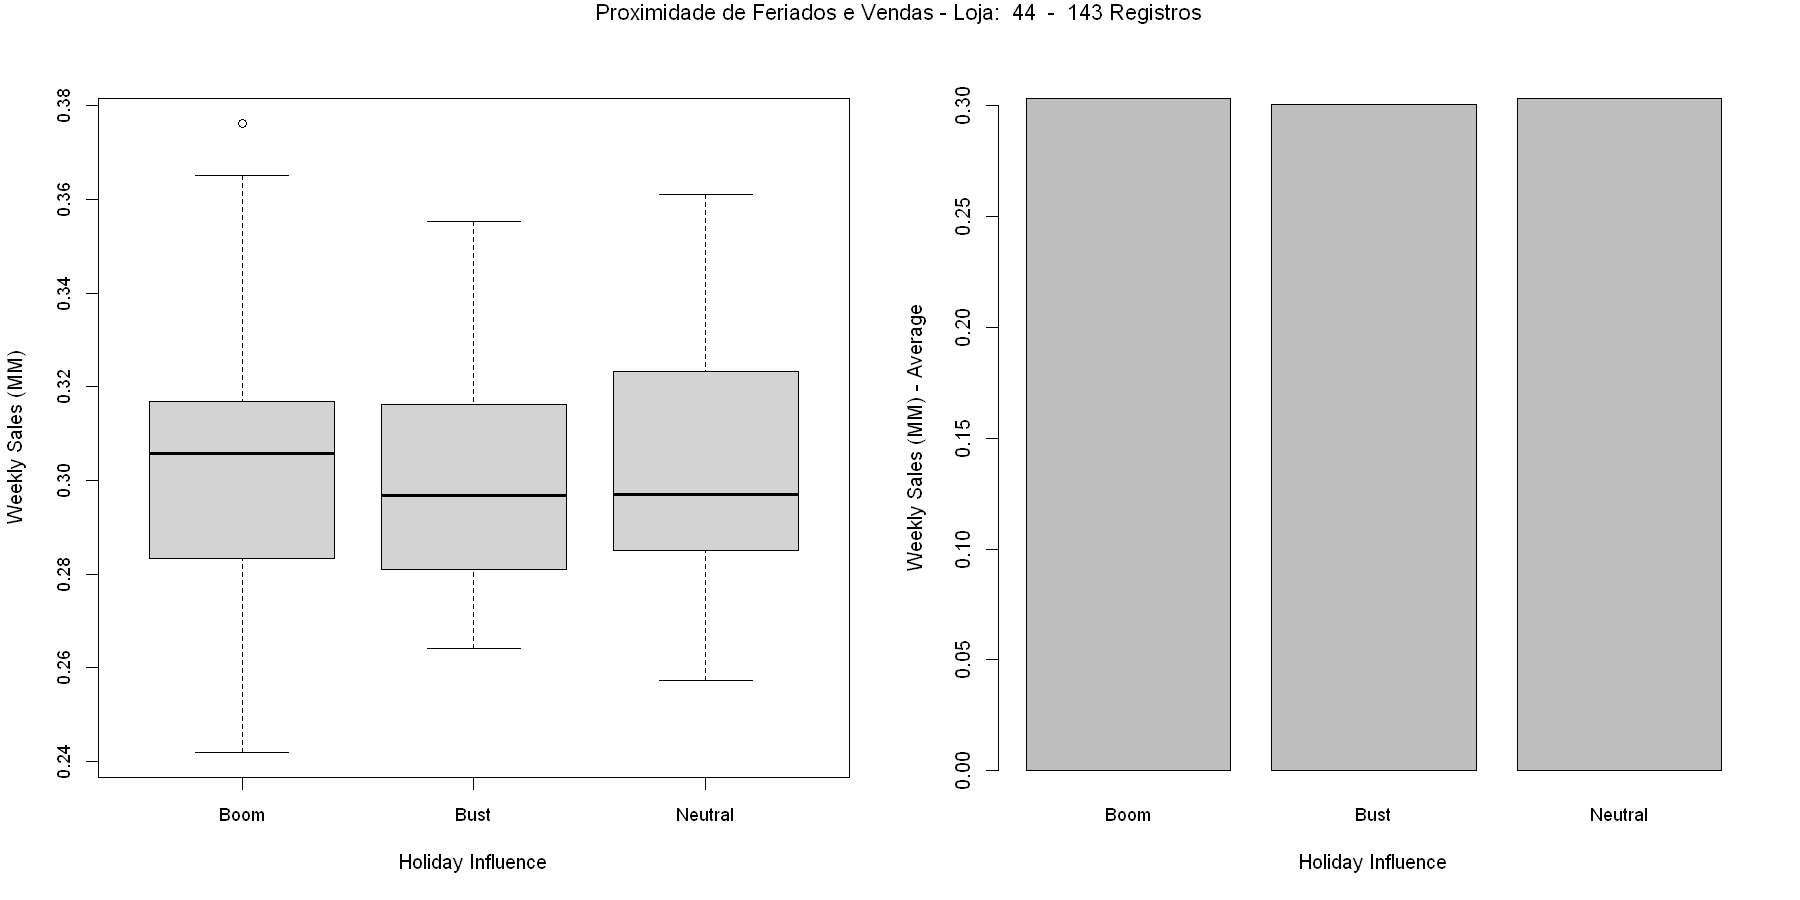

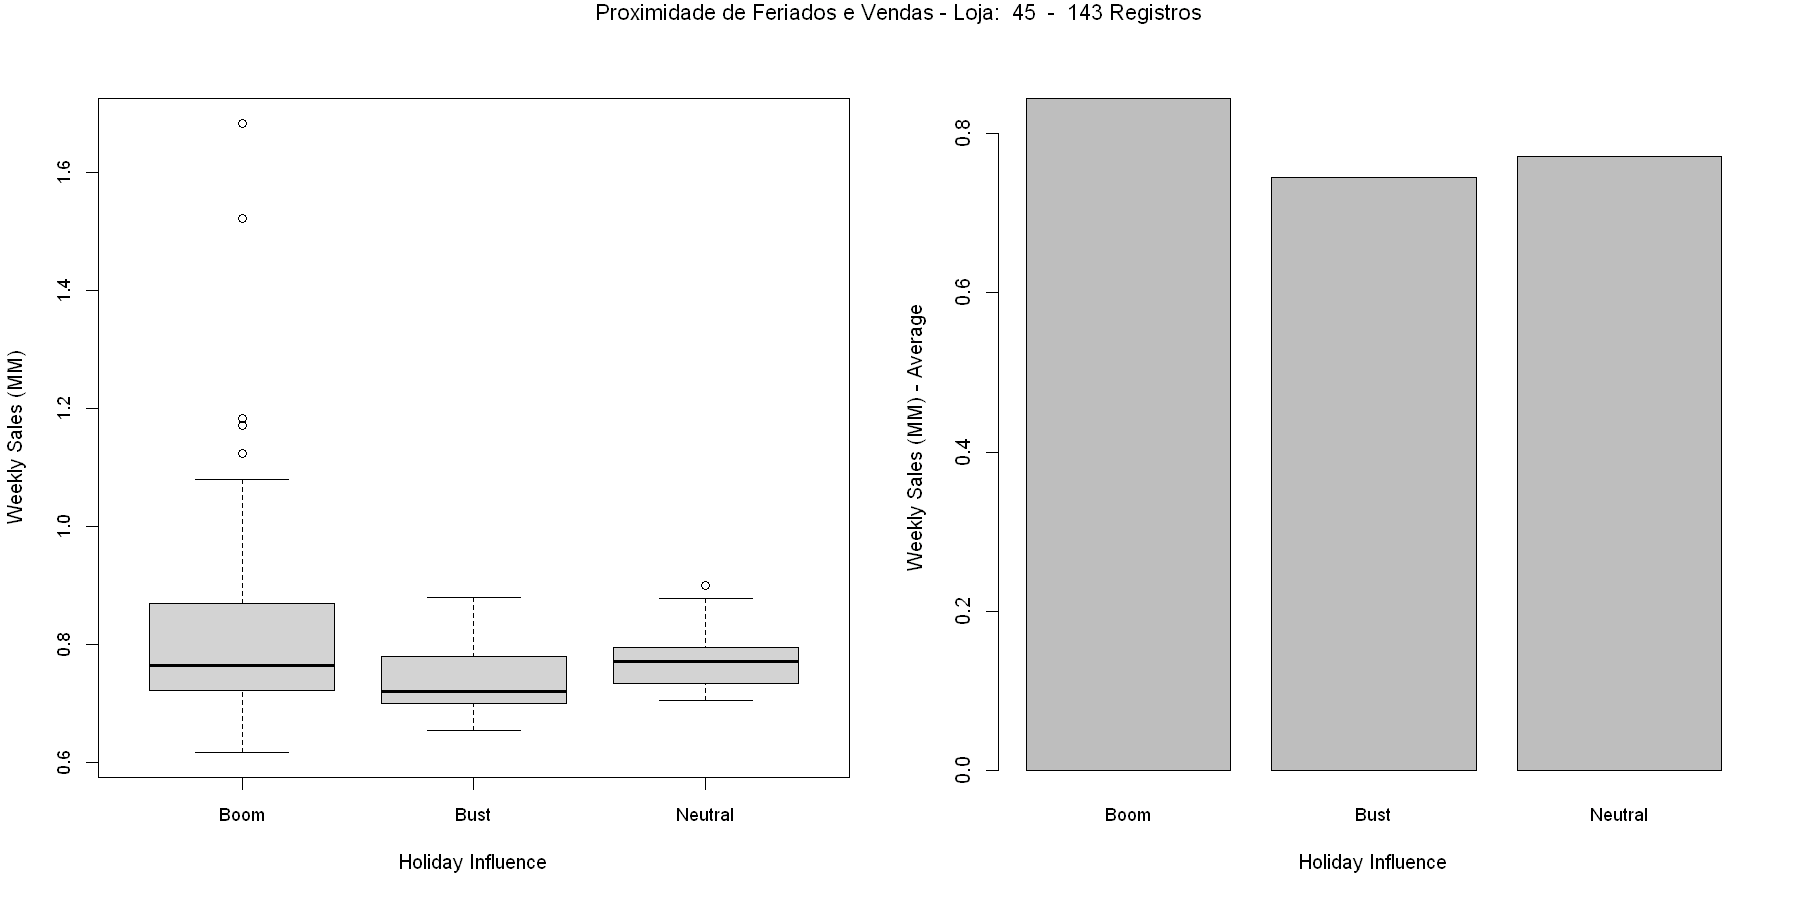

In [6]:
#Temperatura, Inflação, Combustível, Desemprego, Feriado 
#Só olharemos Temperatura, Desemprego e Feriado.
#ultima = 1
ultima = 45
for (nstore in 1:ultima){   
    
    dfplot = df[(df$Store == nstore),]

    weeks_pre = 3
    weeks_post = 3
    condition = dfplot$Holiday_Flag == 1
    holiday_dates = dfplot$Date[which(condition)]
    nholidays = length(holiday_dates)
    
    
    
    ##Pre Holiday
    dfplot$Pre_Holiday = 0
    for (i in 1:nholidays){
        
        match_date = dfplot$Date[which(condition)[i]]
    
        dfplot$Pre_Holiday = ifelse(dfplot$Date <= match_date & dfplot$Date >= (match_date - weeks_pre*7),1,dfplot$Pre_Holiday)
        
        }
    
    #Post Holiday
    dfplot$Post_Holiday = 0
    for (i in 1:nholidays){
        
        match_date = dfplot$Date[which(condition)[i]]
    
        dfplot$Post_Holiday = ifelse(dfplot$Date > match_date & dfplot$Date <= (match_date + weeks_post*7),1,dfplot$Post_Holiday)
        
        }

    dfplot$Holiday_Effect = 'Neutral'

    dfplot$Holiday_Effect = ifelse(dfplot$Post_Holiday == 1,'Bust', dfplot$Holiday_Effect)
    dfplot$Holiday_Effect = ifelse(dfplot$Pre_Holiday == 1,'Boom', dfplot$Holiday_Effect)
    means <- aggregate(Weekly_Sales ~ Holiday_Effect, dfplot, mean)





    options(repr.plot.width=15, repr.plot.height=7.5)  # width=10, height=6 in inches
    par(mfrow = c(1, 2))

    boxplot(Weekly_Sales/1000000 ~ Holiday_Effect, 
        data = dfplot,
        ylab = 'Weekly Sales (MM)',
        xlab = 'Holiday Influence',
        cex.axis=0.9
       )
    barplot(means$Weekly_Sales/1000000, 
        names.arg = means$Holiday_Effect,
        cex.names=0.9,
        xlab = "Holiday Influence",
        ylab = "Weekly Sales (MM) - Average"
        )
           

    mtext(paste ("Proximidade de Feriados e Vendas - Loja: ",nstore, " - " , nrow(dfplot), "Registros"), side = 3, line = -1, outer = TRUE, cex=1.1)
  


    
    }
